<a href="https://colab.research.google.com/github/dbmum/jberds-biking/blob/main/Spencer_Bikes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# Load some test data
import pandas as pd


# Import the libraries we need 
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Commonly used modules
import numpy as np

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# import cv2
# import IPython
# from six.moves import urllib

# print(tf.__version__)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [37]:
bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')
bikes_hm = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/biking_holdout_test_mini.csv')
#bikes['goal'] = bikes.casual + bikes.registered
def add_distance_from_average(df, column_name):
    """
    Adds a new column to a pandas DataFrame representing each value's distance from the average of everything in the
    10 rows before it.

    Args:
        df (pandas.DataFrame): The DataFrame to modify.
        column_name (str): The name of the column to calculate the distance from.

    Returns:
        pandas.DataFrame: The modified DataFrame with the new column added.
    """
    new_column_name = "warmer_or_colder"
    df[new_column_name] = 0  # Initialize the new column with None

    for i in range(10, len(df)):
        avg = df[column_name].iloc[i - 10:i].mean()  # Calculate the average of the 10 rows before the current row
        value = df[column_name].iloc[i]  # Get the value of the current row
        distance = value - avg  # Calculate the distance from the average
        df.at[i, new_column_name] = distance  # Assign the distance to the new column

    return df
bikes = add_distance_from_average(bikes,"feels_like_c")

In [38]:
X = bikes.drop(columns=["dteday","casual","registered"])
Y = bikes[['casual','registered']]
#yr = bikes.registered

<Axes: xlabel='feels_like_c', ylabel='goal'>

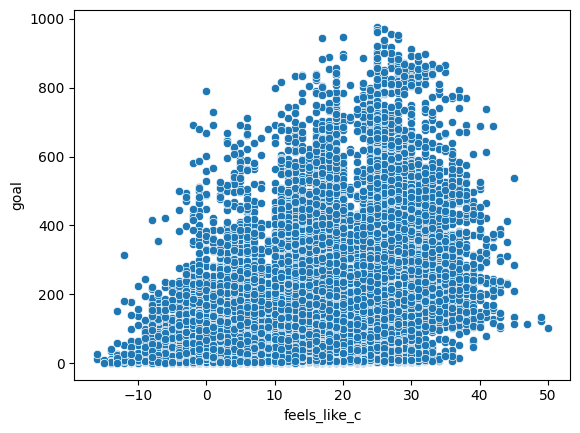

In [ ]:
# look at data, now it is all numeric
sns.scatterplot(data=bikes,x="feels_like_c",y="goal")
#bikes.columns

In [39]:
X_test, X_train, y_test, y_train = train_test_split(X, Y, test_size=0.7, random_state=42)

In [53]:
bikes.query('holiday==1').season.value_counts()

4    144
1    141
2     96
3     96
Name: season, dtype: int64

In [40]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing dataabs
X_test = norm.transform(X_test)

In [42]:
from tensorflow.keras import Input, Model
inputs = Input(shape=(len(X_train[0]),))
x = Dense(16, activation='relu')(inputs)
x = Dense(32, activation='relu')(x)
output1 = Dense(1,activation='relu')(x)
output2 = Dense(1, activation='relu')(x)

model = Model(inputs=inputs, outputs=[output1, output2])

early_stop = keras.callbacks.EarlyStopping(monitor='val_mse', patience=30) #if it doesn't go down after 30 more epochs, just stop
opt = keras.optimizers.Adam()
model.compile(loss="mean_squared_error", optimizer=opt, metrics=['mse'])

history = model.fit(X_train, y_train, epochs=500, batch_size=8,callbacks=[early_stop])

Epoch 1/500
1453/1456 [============================>.] - ETA: 0s - loss: 31586.9453 - dense_21_loss: 15734.1553 - dense_22_loss: 15852.7969 - dense_21_mse: 15734.1553 - dense_22_mse: 15852.7969

1456/1456 [==============================] - 8s 4ms/step - loss: 31606.4004 - dense_21_loss: 15744.0312 - dense_22_loss: 15862.3730 - dense_21_mse: 15744.0312 - dense_22_mse: 15862.3730
Epoch 2/500
1431/1456 [============================>.] - ETA: 0s - loss: 26335.0645 - dense_21_loss: 13175.5781 - dense_22_loss: 13159.4902 - dense_21_mse: 13175.5781 - dense_22_mse: 13159.4902

1456/1456 [==============================] - 3s 2ms/step - loss: 26269.2090 - dense_21_loss: 13142.6934 - dense_22_loss: 13126.5205 - dense_21_mse: 13142.6934 - dense_22_mse: 13126.5205
Epoch 3/500
1453/1456 [============================>.] - ETA: 0s - loss: 25435.5918 - dense_21_loss: 12723.3945 - dense_22_loss: 12712.1885 - dense_21_mse: 12723.3945 - dense_22_mse: 12712.1885

1456/1456 [==============================] - 3s 2ms/step - loss: 25460.9434 - dense_21_loss: 12736.0752 - dense_22_loss: 12724.8535 - dense_21_mse: 12736.0752 - dense_22_mse: 12724.8535
Epoch 4/500
1436/1456 [============================>.] - ETA: 0s - loss: 24819.2305 - dense_21_loss: 12414.6855 - dense_22_loss: 12404.5498 - dense_21_mse: 12414.6855 - dense_22_mse: 12404.5498

1456/1456 [==============================] - 3s 2ms/step - loss: 24922.0430 - dense_21_loss: 12466.0732 - dense_22_loss: 12455.9795 - dense_21_mse: 12466.0732 - dense_22_mse: 12455.9795
Epoch 5/500
1449/1456 [============================>.] - ETA: 0s - loss: 24436.6562 - dense_21_loss: 12222.3506 - dense_22_loss: 12214.3027 - dense_21_mse: 12222.3506 - dense_22_mse: 12214.3027

1456/1456 [==============================] - 3s 2ms/step - loss: 24451.1953 - dense_21_loss: 12229.5859 - dense_22_loss: 12221.6016 - dense_21_mse: 12229.5859 - dense_22_mse: 12221.6016
Epoch 6/500
1450/1456 [============================>.] - ETA: 0s - loss: 23991.1035 - dense_21_loss: 11998.3340 - dense_22_loss: 11992.7617 - dense_21_mse: 11998.3340 - dense_22_mse: 11992.7617

1456/1456 [==============================] - 4s 2ms/step - loss: 24044.4336 - dense_21_loss: 12024.9961 - dense_22_loss: 12019.4268 - dense_21_mse: 12024.9961 - dense_22_mse: 12019.4268
Epoch 7/500
1447/1456 [============================>.] - ETA: 0s - loss: 23871.3066 - dense_21_loss: 11937.3779 - dense_22_loss: 11933.9395 - dense_21_mse: 11937.3779 - dense_22_mse: 11933.9395

1456/1456 [==============================] - 3s 2ms/step - loss: 23827.0410 - dense_21_loss: 11915.2520 - dense_22_loss: 11911.8008 - dense_21_mse: 11915.2520 - dense_22_mse: 11911.8008
Epoch 8/500
1439/1456 [============================>.] - ETA: 0s - loss: 23594.5547 - dense_21_loss: 11798.2881 - dense_22_loss: 11796.2490 - dense_21_mse: 11798.2881 - dense_22_mse: 11796.2490

1456/1456 [==============================] - 3s 2ms/step - loss: 23647.4316 - dense_21_loss: 11824.7285 - dense_22_loss: 11822.6855 - dense_21_mse: 11824.7285 - dense_22_mse: 11822.6855
Epoch 9/500
1446/1456 [============================>.] - ETA: 0s - loss: 23550.0000 - dense_21_loss: 11775.7539 - dense_22_loss: 11774.2461 - dense_21_mse: 11775.7539 - dense_22_mse: 11774.2461

1456/1456 [==============================] - 3s 2ms/step - loss: 23543.8496 - dense_21_loss: 11772.7002 - dense_22_loss: 11771.1475 - dense_21_mse: 11772.7002 - dense_22_mse: 11771.1475
Epoch 10/500
1454/1456 [============================>.] - ETA: 0s - loss: 23464.5586 - dense_21_loss: 11732.7607 - dense_22_loss: 11731.8008 - dense_21_mse: 11732.7607 - dense_22_mse: 11731.8008

1456/1456 [==============================] - 3s 2ms/step - loss: 23447.1738 - dense_21_loss: 11724.0664 - dense_22_loss: 11723.1113 - dense_21_mse: 11724.0664 - dense_22_mse: 11723.1113
Epoch 11/500
1446/1456 [============================>.] - ETA: 0s - loss: 23433.1230 - dense_21_loss: 11716.9229 - dense_22_loss: 11716.1963 - dense_21_mse: 11716.9229 - dense_22_mse: 11716.1963

1456/1456 [==============================] - 3s 2ms/step - loss: 23371.0977 - dense_21_loss: 11685.9268 - dense_22_loss: 11685.1660 - dense_21_mse: 11685.9268 - dense_22_mse: 11685.1660
Epoch 12/500
1455/1456 [============================>.] - ETA: 0s - loss: 23325.0391 - dense_21_loss: 11662.7725 - dense_22_loss: 11662.2334 - dense_21_mse: 11662.7725 - dense_22_mse: 11662.2334

1456/1456 [==============================] - 3s 2ms/step - loss: 23314.7812 - dense_21_loss: 11657.6455 - dense_22_loss: 11657.1016 - dense_21_mse: 11657.6455 - dense_22_mse: 11657.1016
Epoch 13/500
1455/1456 [============================>.] - ETA: 0s - loss: 23261.0938 - dense_21_loss: 11630.7822 - dense_22_loss: 11630.3066 - dense_21_mse: 11630.7822 - dense_22_mse: 11630.3066

1456/1456 [==============================] - 3s 2ms/step - loss: 23264.3438 - dense_21_loss: 11632.4043 - dense_22_loss: 11631.9326 - dense_21_mse: 11632.4043 - dense_22_mse: 11631.9326
Epoch 14/500
1456/1456 [==============================] - ETA: 0s - loss: 23206.8066 - dense_21_loss: 11603.6279 - dense_22_loss: 11603.1904 - dense_21_mse: 11603.6279 - dense_22_mse: 11603.1904

1456/1456 [==============================] - 3s 2ms/step - loss: 23206.8066 - dense_21_loss: 11603.6279 - dense_22_loss: 11603.1904 - dense_21_mse: 11603.6279 - dense_22_mse: 11603.1904
Epoch 15/500
1428/1456 [============================>.] - ETA: 0s - loss: 23293.6191 - dense_21_loss: 11647.0098 - dense_22_loss: 11646.6055 - dense_21_mse: 11647.0098 - dense_22_mse: 11646.6055

1456/1456 [==============================] - 4s 2ms/step - loss: 23153.4180 - dense_21_loss: 11576.8916 - dense_22_loss: 11576.5195 - dense_21_mse: 11576.8916 - dense_22_mse: 11576.5195
Epoch 16/500
1435/1456 [============================>.] - ETA: 0s - loss: 23117.8750 - dense_21_loss: 11559.1338 - dense_22_loss: 11558.7529 - dense_21_mse: 11559.1338 - dense_22_mse: 11558.7529

1456/1456 [==============================] - 3s 2ms/step - loss: 23134.3242 - dense_21_loss: 11567.3594 - dense_22_loss: 11566.9736 - dense_21_mse: 11567.3594 - dense_22_mse: 11566.9736
Epoch 17/500
1436/1456 [============================>.] - ETA: 0s - loss: 23088.9570 - dense_21_loss: 11544.7305 - dense_22_loss: 11544.2412 - dense_21_mse: 11544.7305 - dense_22_mse: 11544.2412

1456/1456 [==============================] - 3s 2ms/step - loss: 23078.2148 - dense_21_loss: 11539.3623 - dense_22_loss: 11538.8701 - dense_21_mse: 11539.3623 - dense_22_mse: 11538.8701
Epoch 18/500
1454/1456 [============================>.] - ETA: 0s - loss: 23029.8730 - dense_21_loss: 11515.0898 - dense_22_loss: 11514.7695 - dense_21_mse: 11515.0898 - dense_22_mse: 11514.7695

1456/1456 [==============================] - 3s 2ms/step - loss: 23034.8125 - dense_21_loss: 11517.5596 - dense_22_loss: 11517.2393 - dense_21_mse: 11517.5596 - dense_22_mse: 11517.2393
Epoch 19/500
1437/1456 [============================>.] - ETA: 0s - loss: 23013.4805 - dense_21_loss: 11506.9434 - dense_22_loss: 11506.5303 - dense_21_mse: 11506.9434 - dense_22_mse: 11506.5303

1456/1456 [==============================] - 3s 2ms/step - loss: 23022.6953 - dense_21_loss: 11511.5518 - dense_22_loss: 11511.1338 - dense_21_mse: 11511.5518 - dense_22_mse: 11511.1338
Epoch 20/500
1434/1456 [============================>.] - ETA: 0s - loss: 22886.8906 - dense_21_loss: 11443.6807 - dense_22_loss: 11443.1992 - dense_21_mse: 11443.6807 - dense_22_mse: 11443.1992

1456/1456 [==============================] - 3s 2ms/step - loss: 22996.1973 - dense_21_loss: 11498.3086 - dense_22_loss: 11497.8770 - dense_21_mse: 11498.3086 - dense_22_mse: 11497.8770
Epoch 21/500
1436/1456 [============================>.] - ETA: 0s - loss: 22905.4336 - dense_21_loss: 11452.9502 - dense_22_loss: 11452.4688 - dense_21_mse: 11452.9502 - dense_22_mse: 11452.4688

1456/1456 [==============================] - 3s 2ms/step - loss: 22956.0742 - dense_21_loss: 11478.2607 - dense_22_loss: 11477.7988 - dense_21_mse: 11478.2607 - dense_22_mse: 11477.7988
Epoch 22/500
1446/1456 [============================>.] - ETA: 0s - loss: 22816.7930 - dense_21_loss: 11408.6650 - dense_22_loss: 11408.1436 - dense_21_mse: 11408.6650 - dense_22_mse: 11408.1436

1456/1456 [==============================] - 4s 3ms/step - loss: 22915.6992 - dense_21_loss: 11458.1123 - dense_22_loss: 11457.6016 - dense_21_mse: 11458.1123 - dense_22_mse: 11457.6016
Epoch 23/500
1456/1456 [==============================] - ETA: 0s - loss: 22912.5566 - dense_21_loss: 11456.5195 - dense_22_loss: 11456.0244 - dense_21_mse: 11456.5195 - dense_22_mse: 11456.0244

1456/1456 [==============================] - 4s 2ms/step - loss: 22912.5566 - dense_21_loss: 11456.5195 - dense_22_loss: 11456.0244 - dense_21_mse: 11456.5195 - dense_22_mse: 11456.0244
Epoch 24/500
1440/1456 [============================>.] - ETA: 0s - loss: 22825.6582 - dense_21_loss: 11413.0273 - dense_22_loss: 11412.6553 - dense_21_mse: 11413.0273 - dense_22_mse: 11412.6553

1456/1456 [==============================] - 3s 2ms/step - loss: 22876.1934 - dense_21_loss: 11438.2891 - dense_22_loss: 11437.9277 - dense_21_mse: 11438.2891 - dense_22_mse: 11437.9277
Epoch 25/500
1446/1456 [============================>.] - ETA: 0s - loss: 22837.0312 - dense_21_loss: 11418.7305 - dense_22_loss: 11418.3008 - dense_21_mse: 11418.7305 - dense_22_mse: 11418.3008

1456/1456 [==============================] - 3s 2ms/step - loss: 22866.1758 - dense_21_loss: 11433.2979 - dense_22_loss: 11432.8740 - dense_21_mse: 11433.2979 - dense_22_mse: 11432.8740
Epoch 26/500
1453/1456 [============================>.] - ETA: 0s - loss: 22860.8828 - dense_21_loss: 11430.6328 - dense_22_loss: 11430.2354 - dense_21_mse: 11430.6328 - dense_22_mse: 11430.2354

1456/1456 [==============================] - 3s 2ms/step - loss: 22838.1387 - dense_21_loss: 11419.2646 - dense_22_loss: 11418.8604 - dense_21_mse: 11419.2646 - dense_22_mse: 11418.8604
Epoch 27/500
1446/1456 [============================>.] - ETA: 0s - loss: 22836.9473 - dense_21_loss: 11418.7109 - dense_22_loss: 11418.2266 - dense_21_mse: 11418.7109 - dense_22_mse: 11418.2266

1456/1456 [==============================] - 3s 2ms/step - loss: 22851.9648 - dense_21_loss: 11426.2197 - dense_22_loss: 11425.7383 - dense_21_mse: 11426.2197 - dense_22_mse: 11425.7383
Epoch 28/500
1446/1456 [============================>.] - ETA: 0s - loss: 22812.9414 - dense_21_loss: 11406.6631 - dense_22_loss: 11406.2686 - dense_21_mse: 11406.6631 - dense_22_mse: 11406.2686

1456/1456 [==============================] - 3s 2ms/step - loss: 22821.0254 - dense_21_loss: 11410.7051 - dense_22_loss: 11410.3125 - dense_21_mse: 11410.7051 - dense_22_mse: 11410.3125
Epoch 29/500
1454/1456 [============================>.] - ETA: 0s - loss: 22813.1504 - dense_21_loss: 11406.8174 - dense_22_loss: 11406.3262 - dense_21_mse: 11406.8174 - dense_22_mse: 11406.3262

1456/1456 [==============================] - 3s 2ms/step - loss: 22805.1719 - dense_21_loss: 11402.8252 - dense_22_loss: 11402.3408 - dense_21_mse: 11402.8252 - dense_22_mse: 11402.3408
Epoch 30/500
1437/1456 [============================>.] - ETA: 0s - loss: 22760.7285 - dense_21_loss: 11380.6572 - dense_22_loss: 11380.0869 - dense_21_mse: 11380.6572 - dense_22_mse: 11380.0869

1456/1456 [==============================] - 3s 2ms/step - loss: 22775.5840 - dense_21_loss: 11388.0645 - dense_22_loss: 11387.5352 - dense_21_mse: 11388.0645 - dense_22_mse: 11387.5352
Epoch 31/500
1444/1456 [============================>.] - ETA: 0s - loss: 22785.4785 - dense_21_loss: 11393.0654 - dense_22_loss: 11392.4219 - dense_21_mse: 11393.0654 - dense_22_mse: 11392.4219

1456/1456 [==============================] - 3s 2ms/step - loss: 22773.7227 - dense_21_loss: 11387.1787 - dense_22_loss: 11386.5488 - dense_21_mse: 11387.1787 - dense_22_mse: 11386.5488
Epoch 32/500
1436/1456 [============================>.] - ETA: 0s - loss: 22746.3418 - dense_21_loss: 11373.4990 - dense_22_loss: 11372.8340 - dense_21_mse: 11373.4990 - dense_22_mse: 11372.8340

1456/1456 [==============================] - 3s 2ms/step - loss: 22745.7227 - dense_21_loss: 11373.1895 - dense_22_loss: 11372.5264 - dense_21_mse: 11373.1895 - dense_22_mse: 11372.5264
Epoch 33/500
1440/1456 [============================>.] - ETA: 0s - loss: 22666.0957 - dense_21_loss: 11333.3926 - dense_22_loss: 11332.7119 - dense_21_mse: 11333.3926 - dense_22_mse: 11332.7119

1456/1456 [==============================] - 3s 2ms/step - loss: 22741.3164 - dense_21_loss: 11371.0049 - dense_22_loss: 11370.3174 - dense_21_mse: 11371.0049 - dense_22_mse: 11370.3174
Epoch 34/500
1438/1456 [============================>.] - ETA: 0s - loss: 22730.7988 - dense_21_loss: 11365.7646 - dense_22_loss: 11365.0400 - dense_21_mse: 11365.7646 - dense_22_mse: 11365.0400

1456/1456 [==============================] - 3s 2ms/step - loss: 22724.9785 - dense_21_loss: 11362.8584 - dense_22_loss: 11362.1270 - dense_21_mse: 11362.8584 - dense_22_mse: 11362.1270
Epoch 35/500
1437/1456 [============================>.] - ETA: 0s - loss: 22766.0840 - dense_21_loss: 11383.4160 - dense_22_loss: 11382.6719 - dense_21_mse: 11383.4160 - dense_22_mse: 11382.6719

1456/1456 [==============================] - 3s 2ms/step - loss: 22712.0938 - dense_21_loss: 11356.4219 - dense_22_loss: 11355.6748 - dense_21_mse: 11356.4219 - dense_22_mse: 11355.6748
Epoch 36/500
1442/1456 [============================>.] - ETA: 0s - loss: 22712.4766 - dense_21_loss: 11356.6797 - dense_22_loss: 11355.7979 - dense_21_mse: 11356.6797 - dense_22_mse: 11355.7979

1456/1456 [==============================] - 3s 2ms/step - loss: 22680.6934 - dense_21_loss: 11340.7812 - dense_22_loss: 11339.9131 - dense_21_mse: 11340.7812 - dense_22_mse: 11339.9131
Epoch 37/500
1456/1456 [==============================] - ETA: 0s - loss: 22692.7500 - dense_21_loss: 11346.8125 - dense_22_loss: 11345.9600 - dense_21_mse: 11346.8125 - dense_22_mse: 11345.9600

1456/1456 [==============================] - 3s 2ms/step - loss: 22692.7500 - dense_21_loss: 11346.8125 - dense_22_loss: 11345.9600 - dense_21_mse: 11346.8125 - dense_22_mse: 11345.9600
Epoch 38/500
1450/1456 [============================>.] - ETA: 0s - loss: 22674.4004 - dense_21_loss: 11337.6904 - dense_22_loss: 11336.7041 - dense_21_mse: 11337.6904 - dense_22_mse: 11336.7041

1456/1456 [==============================] - 3s 2ms/step - loss: 22676.5430 - dense_21_loss: 11338.7627 - dense_22_loss: 11337.7734 - dense_21_mse: 11338.7627 - dense_22_mse: 11337.7734
Epoch 39/500
1435/1456 [============================>.] - ETA: 0s - loss: 22600.2266 - dense_21_loss: 11300.6445 - dense_22_loss: 11299.5752 - dense_21_mse: 11300.6445 - dense_22_mse: 11299.5752

1456/1456 [==============================] - 3s 2ms/step - loss: 22657.8789 - dense_21_loss: 11329.4971 - dense_22_loss: 11328.3789 - dense_21_mse: 11329.4971 - dense_22_mse: 11328.3789
Epoch 40/500
1449/1456 [============================>.] - ETA: 0s - loss: 22650.4863 - dense_21_loss: 11325.9160 - dense_22_loss: 11324.5352 - dense_21_mse: 11325.9160 - dense_22_mse: 11324.5352

1456/1456 [==============================] - 3s 2ms/step - loss: 22641.0312 - dense_21_loss: 11321.1816 - dense_22_loss: 11319.8135 - dense_21_mse: 11321.1816 - dense_22_mse: 11319.8135
Epoch 41/500
1441/1456 [============================>.] - ETA: 0s - loss: 22659.8125 - dense_21_loss: 11330.7402 - dense_22_loss: 11329.0664 - dense_21_mse: 11330.7402 - dense_22_mse: 11329.0664

1456/1456 [==============================] - 3s 2ms/step - loss: 22615.3555 - dense_21_loss: 11308.5244 - dense_22_loss: 11306.8242 - dense_21_mse: 11308.5244 - dense_22_mse: 11306.8242
Epoch 42/500
1437/1456 [============================>.] - ETA: 0s - loss: 22623.0293 - dense_21_loss: 11312.3711 - dense_22_loss: 11310.6455 - dense_21_mse: 11312.3711 - dense_22_mse: 11310.6455

1456/1456 [==============================] - 3s 2ms/step - loss: 22582.5078 - dense_21_loss: 11292.1240 - dense_22_loss: 11290.3750 - dense_21_mse: 11292.1240 - dense_22_mse: 11290.3750
Epoch 43/500
1439/1456 [============================>.] - ETA: 0s - loss: 22614.4766 - dense_21_loss: 11308.1895 - dense_22_loss: 11306.2900 - dense_21_mse: 11308.1895 - dense_22_mse: 11306.2900

1456/1456 [==============================] - 3s 2ms/step - loss: 22597.9941 - dense_21_loss: 11299.9707 - dense_22_loss: 11298.0234 - dense_21_mse: 11299.9707 - dense_22_mse: 11298.0234
Epoch 44/500
1449/1456 [============================>.] - ETA: 0s - loss: 22603.6406 - dense_21_loss: 11302.9102 - dense_22_loss: 11300.7363 - dense_21_mse: 11302.9102 - dense_22_mse: 11300.7363

1456/1456 [==============================] - 3s 2ms/step - loss: 22575.0664 - dense_21_loss: 11288.6338 - dense_22_loss: 11286.4355 - dense_21_mse: 11288.6338 - dense_22_mse: 11286.4355
Epoch 45/500
1440/1456 [============================>.] - ETA: 0s - loss: 22572.7090 - dense_21_loss: 11287.4932 - dense_22_loss: 11285.2344 - dense_21_mse: 11287.4932 - dense_22_mse: 11285.2344

1456/1456 [==============================] - 3s 2ms/step - loss: 22536.3691 - dense_21_loss: 11269.3232 - dense_22_loss: 11267.0674 - dense_21_mse: 11269.3232 - dense_22_mse: 11267.0674
Epoch 46/500
1443/1456 [============================>.] - ETA: 0s - loss: 22593.4629 - dense_21_loss: 11297.9248 - dense_22_loss: 11295.5352 - dense_21_mse: 11297.9248 - dense_22_mse: 11295.5352

1456/1456 [==============================] - 3s 2ms/step - loss: 22536.1797 - dense_21_loss: 11269.2754 - dense_22_loss: 11266.9023 - dense_21_mse: 11269.2754 - dense_22_mse: 11266.9023
Epoch 47/500
1450/1456 [============================>.] - ETA: 0s - loss: 22537.5684 - dense_21_loss: 11269.8672 - dense_22_loss: 11267.7168 - dense_21_mse: 11269.8672 - dense_22_mse: 11267.7168

1456/1456 [==============================] - 3s 2ms/step - loss: 22519.4746 - dense_21_loss: 11260.8232 - dense_22_loss: 11258.6699 - dense_21_mse: 11260.8232 - dense_22_mse: 11258.6699
Epoch 48/500
1448/1456 [============================>.] - ETA: 0s - loss: 22542.8262 - dense_21_loss: 11272.6250 - dense_22_loss: 11270.2061 - dense_21_mse: 11272.6250 - dense_22_mse: 11270.2061

1456/1456 [==============================] - 3s 2ms/step - loss: 22510.7754 - dense_21_loss: 11256.6094 - dense_22_loss: 11254.1719 - dense_21_mse: 11256.6094 - dense_22_mse: 11254.1719
Epoch 49/500
1449/1456 [============================>.] - ETA: 0s - loss: 22464.1992 - dense_21_loss: 11233.2891 - dense_22_loss: 11230.9043 - dense_21_mse: 11233.2891 - dense_22_mse: 11230.9043

1456/1456 [==============================] - 3s 2ms/step - loss: 22497.2598 - dense_21_loss: 11249.8125 - dense_22_loss: 11247.4414 - dense_21_mse: 11249.8125 - dense_22_mse: 11247.4414
Epoch 50/500
1439/1456 [============================>.] - ETA: 0s - loss: 22480.4492 - dense_21_loss: 11241.4668 - dense_22_loss: 11238.9746 - dense_21_mse: 11241.4668 - dense_22_mse: 11238.9746

1456/1456 [==============================] - 4s 2ms/step - loss: 22485.3418 - dense_21_loss: 11243.9209 - dense_22_loss: 11241.4131 - dense_21_mse: 11243.9209 - dense_22_mse: 11241.4131
Epoch 51/500
1443/1456 [============================>.] - ETA: 0s - loss: 22467.7129 - dense_21_loss: 11235.0723 - dense_22_loss: 11232.6240 - dense_21_mse: 11235.0723 - dense_22_mse: 11232.6240

1456/1456 [==============================] - 3s 2ms/step - loss: 22456.0430 - dense_21_loss: 11229.2197 - dense_22_loss: 11226.8037 - dense_21_mse: 11229.2197 - dense_22_mse: 11226.8037
Epoch 52/500
1429/1456 [============================>.] - ETA: 0s - loss: 22422.8516 - dense_21_loss: 11212.6191 - dense_22_loss: 11210.2188 - dense_21_mse: 11212.6191 - dense_22_mse: 11210.2188

1456/1456 [==============================] - 3s 2ms/step - loss: 22462.4043 - dense_21_loss: 11232.4199 - dense_22_loss: 11229.9736 - dense_21_mse: 11232.4199 - dense_22_mse: 11229.9736
Epoch 53/500
1437/1456 [============================>.] - ETA: 0s - loss: 22417.5176 - dense_21_loss: 11210.1445 - dense_22_loss: 11207.3867 - dense_21_mse: 11210.1445 - dense_22_mse: 11207.3867

1456/1456 [==============================] - 3s 2ms/step - loss: 22430.1426 - dense_21_loss: 11216.4541 - dense_22_loss: 11213.7031 - dense_21_mse: 11216.4541 - dense_22_mse: 11213.7031
Epoch 54/500
1442/1456 [============================>.] - ETA: 0s - loss: 22413.1074 - dense_21_loss: 11207.8867 - dense_22_loss: 11205.2402 - dense_21_mse: 11207.8867 - dense_22_mse: 11205.2402

1456/1456 [==============================] - 3s 2ms/step - loss: 22416.8379 - dense_21_loss: 11209.7520 - dense_22_loss: 11207.1055 - dense_21_mse: 11209.7520 - dense_22_mse: 11207.1055
Epoch 55/500
1455/1456 [============================>.] - ETA: 0s - loss: 22414.6348 - dense_21_loss: 11208.6006 - dense_22_loss: 11206.0332 - dense_21_mse: 11208.6006 - dense_22_mse: 11206.0332

1456/1456 [==============================] - 3s 2ms/step - loss: 22407.3809 - dense_21_loss: 11204.9717 - dense_22_loss: 11202.4072 - dense_21_mse: 11204.9717 - dense_22_mse: 11202.4072
Epoch 56/500
1433/1456 [============================>.] - ETA: 0s - loss: 22446.1738 - dense_21_loss: 11224.4482 - dense_22_loss: 11221.7344 - dense_21_mse: 11224.4482 - dense_22_mse: 11221.7344

1456/1456 [==============================] - 3s 2ms/step - loss: 22399.0840 - dense_21_loss: 11200.9199 - dense_22_loss: 11198.1738 - dense_21_mse: 11200.9199 - dense_22_mse: 11198.1738
Epoch 57/500
1449/1456 [============================>.] - ETA: 0s - loss: 22376.3945 - dense_21_loss: 11189.4883 - dense_22_loss: 11186.9209 - dense_21_mse: 11189.4883 - dense_22_mse: 11186.9209

1456/1456 [==============================] - 4s 3ms/step - loss: 22380.0332 - dense_21_loss: 11191.3066 - dense_22_loss: 11188.7422 - dense_21_mse: 11191.3066 - dense_22_mse: 11188.7422
Epoch 58/500
1455/1456 [============================>.] - ETA: 0s - loss: 22383.8672 - dense_21_loss: 11193.2080 - dense_22_loss: 11190.6748 - dense_21_mse: 11193.2080 - dense_22_mse: 11190.6748

1456/1456 [==============================] - 4s 2ms/step - loss: 22377.5742 - dense_21_loss: 11190.0625 - dense_22_loss: 11187.5273 - dense_21_mse: 11190.0625 - dense_22_mse: 11187.5273
Epoch 59/500
1434/1456 [============================>.] - ETA: 0s - loss: 22367.3457 - dense_21_loss: 11184.8643 - dense_22_loss: 11182.4736 - dense_21_mse: 11184.8643 - dense_22_mse: 11182.4736

1456/1456 [==============================] - 3s 2ms/step - loss: 22355.5566 - dense_21_loss: 11178.9980 - dense_22_loss: 11176.5537 - dense_21_mse: 11178.9980 - dense_22_mse: 11176.5537
Epoch 60/500
1431/1456 [============================>.] - ETA: 0s - loss: 22369.1426 - dense_21_loss: 11185.9268 - dense_22_loss: 11183.2363 - dense_21_mse: 11185.9268 - dense_22_mse: 11183.2363

1456/1456 [==============================] - 3s 2ms/step - loss: 22348.1484 - dense_21_loss: 11175.4180 - dense_22_loss: 11172.7461 - dense_21_mse: 11175.4180 - dense_22_mse: 11172.7461
Epoch 61/500
1437/1456 [============================>.] - ETA: 0s - loss: 22399.2910 - dense_21_loss: 11201.0791 - dense_22_loss: 11198.2207 - dense_21_mse: 11201.0791 - dense_22_mse: 11198.2207

1456/1456 [==============================] - 3s 2ms/step - loss: 22341.0234 - dense_21_loss: 11171.9414 - dense_22_loss: 11169.0908 - dense_21_mse: 11171.9414 - dense_22_mse: 11169.0908
Epoch 62/500
1445/1456 [============================>.] - ETA: 0s - loss: 22385.7656 - dense_21_loss: 11194.1143 - dense_22_loss: 11191.6523 - dense_21_mse: 11194.1143 - dense_22_mse: 11191.6523

1456/1456 [==============================] - 3s 2ms/step - loss: 22352.9609 - dense_21_loss: 11177.7334 - dense_22_loss: 11175.2295 - dense_21_mse: 11177.7334 - dense_22_mse: 11175.2295
Epoch 63/500
1454/1456 [============================>.] - ETA: 0s - loss: 22315.5234 - dense_21_loss: 11159.0244 - dense_22_loss: 11156.4785 - dense_21_mse: 11159.0244 - dense_22_mse: 11156.4785

1456/1456 [==============================] - 3s 2ms/step - loss: 22320.2285 - dense_21_loss: 11161.3809 - dense_22_loss: 11158.8291 - dense_21_mse: 11161.3809 - dense_22_mse: 11158.8291
Epoch 64/500
1453/1456 [============================>.] - ETA: 0s - loss: 22317.5547 - dense_21_loss: 11159.9033 - dense_22_loss: 11157.6611 - dense_21_mse: 11159.9033 - dense_22_mse: 11157.6611

1456/1456 [==============================] - 3s 2ms/step - loss: 22317.7461 - dense_21_loss: 11160.0127 - dense_22_loss: 11157.7432 - dense_21_mse: 11160.0127 - dense_22_mse: 11157.7432
Epoch 65/500
1438/1456 [============================>.] - ETA: 0s - loss: 22296.1426 - dense_21_loss: 11149.2266 - dense_22_loss: 11146.9336 - dense_21_mse: 11149.2266 - dense_22_mse: 11146.9336

1456/1456 [==============================] - 3s 2ms/step - loss: 22307.7188 - dense_21_loss: 11155.0059 - dense_22_loss: 11152.7305 - dense_21_mse: 11155.0059 - dense_22_mse: 11152.7305
Epoch 66/500
1454/1456 [============================>.] - ETA: 0s - loss: 22296.3184 - dense_21_loss: 11149.3525 - dense_22_loss: 11146.9609 - dense_21_mse: 11149.3525 - dense_22_mse: 11146.9609

1456/1456 [==============================] - 3s 2ms/step - loss: 22302.4434 - dense_21_loss: 11152.4150 - dense_22_loss: 11150.0225 - dense_21_mse: 11152.4150 - dense_22_mse: 11150.0225
Epoch 67/500
1450/1456 [============================>.] - ETA: 0s - loss: 22327.8906 - dense_21_loss: 11164.9893 - dense_22_loss: 11162.8838 - dense_21_mse: 11164.9893 - dense_22_mse: 11162.8838

1456/1456 [==============================] - 4s 2ms/step - loss: 22289.8516 - dense_21_loss: 11145.9775 - dense_22_loss: 11143.8564 - dense_21_mse: 11145.9775 - dense_22_mse: 11143.8564
Epoch 68/500
1443/1456 [============================>.] - ETA: 0s - loss: 22242.8086 - dense_21_loss: 11122.4912 - dense_22_loss: 11120.2969 - dense_21_mse: 11122.4912 - dense_22_mse: 11120.2969

1456/1456 [==============================] - 3s 2ms/step - loss: 22266.8242 - dense_21_loss: 11134.5039 - dense_22_loss: 11132.2988 - dense_21_mse: 11134.5039 - dense_22_mse: 11132.2988
Epoch 69/500
1455/1456 [============================>.] - ETA: 0s - loss: 22223.9277 - dense_21_loss: 11113.0137 - dense_22_loss: 11110.9521 - dense_21_mse: 11113.0137 - dense_22_mse: 11110.9521

1456/1456 [==============================] - 3s 2ms/step - loss: 22264.4746 - dense_21_loss: 11133.2871 - dense_22_loss: 11131.2266 - dense_21_mse: 11133.2871 - dense_22_mse: 11131.2266
Epoch 70/500
1448/1456 [============================>.] - ETA: 0s - loss: 22270.4902 - dense_21_loss: 11136.3037 - dense_22_loss: 11134.1973 - dense_21_mse: 11136.3037 - dense_22_mse: 11134.1973

1456/1456 [==============================] - 3s 2ms/step - loss: 22245.1035 - dense_21_loss: 11123.6348 - dense_22_loss: 11121.4814 - dense_21_mse: 11123.6348 - dense_22_mse: 11121.4814
Epoch 71/500
1449/1456 [============================>.] - ETA: 0s - loss: 22270.9102 - dense_21_loss: 11136.3916 - dense_22_loss: 11134.5312 - dense_21_mse: 11136.3916 - dense_22_mse: 11134.5312

1456/1456 [==============================] - 3s 2ms/step - loss: 22247.9141 - dense_21_loss: 11124.8838 - dense_22_loss: 11123.0449 - dense_21_mse: 11124.8838 - dense_22_mse: 11123.0449
Epoch 72/500
1439/1456 [============================>.] - ETA: 0s - loss: 22240.2363 - dense_21_loss: 11121.1631 - dense_22_loss: 11119.0996 - dense_21_mse: 11121.1631 - dense_22_mse: 11119.0996

1456/1456 [==============================] - 3s 2ms/step - loss: 22272.4707 - dense_21_loss: 11137.2979 - dense_22_loss: 11135.2002 - dense_21_mse: 11137.2979 - dense_22_mse: 11135.2002
Epoch 73/500
1443/1456 [============================>.] - ETA: 0s - loss: 22209.1152 - dense_21_loss: 11105.4541 - dense_22_loss: 11103.6807 - dense_21_mse: 11105.4541 - dense_22_mse: 11103.6807

1456/1456 [==============================] - 3s 2ms/step - loss: 22230.7852 - dense_21_loss: 11116.2969 - dense_22_loss: 11114.5098 - dense_21_mse: 11116.2969 - dense_22_mse: 11114.5098
Epoch 74/500
1439/1456 [============================>.] - ETA: 0s - loss: 22117.6758 - dense_21_loss: 11059.9443 - dense_22_loss: 11057.7510 - dense_21_mse: 11059.9443 - dense_22_mse: 11057.7510

1456/1456 [==============================] - 3s 2ms/step - loss: 22235.8105 - dense_21_loss: 11118.9590 - dense_22_loss: 11116.8682 - dense_21_mse: 11118.9590 - dense_22_mse: 11116.8682
Epoch 75/500
1443/1456 [============================>.] - ETA: 0s - loss: 22217.2188 - dense_21_loss: 11109.5176 - dense_22_loss: 11107.7109 - dense_21_mse: 11109.5176 - dense_22_mse: 11107.7109

1456/1456 [==============================] - 3s 2ms/step - loss: 22227.6758 - dense_21_loss: 11114.7549 - dense_22_loss: 11112.9326 - dense_21_mse: 11114.7549 - dense_22_mse: 11112.9326
Epoch 76/500
1437/1456 [============================>.] - ETA: 0s - loss: 22251.8906 - dense_21_loss: 11127.0273 - dense_22_loss: 11124.9004 - dense_21_mse: 11127.0273 - dense_22_mse: 11124.9004

1456/1456 [==============================] - 4s 2ms/step - loss: 22217.0664 - dense_21_loss: 11109.5908 - dense_22_loss: 11107.5127 - dense_21_mse: 11109.5908 - dense_22_mse: 11107.5127
Epoch 77/500
1445/1456 [============================>.] - ETA: 0s - loss: 22258.7129 - dense_21_loss: 11130.1816 - dense_22_loss: 11128.5391 - dense_21_mse: 11130.1816 - dense_22_mse: 11128.5391

1456/1456 [==============================] - 3s 2ms/step - loss: 22223.3438 - dense_21_loss: 11112.4922 - dense_22_loss: 11110.8604 - dense_21_mse: 11112.4922 - dense_22_mse: 11110.8604
Epoch 78/500
1448/1456 [============================>.] - ETA: 0s - loss: 22237.5957 - dense_21_loss: 11119.8086 - dense_22_loss: 11117.8008 - dense_21_mse: 11119.8086 - dense_22_mse: 11117.8008

1456/1456 [==============================] - 3s 2ms/step - loss: 22218.5352 - dense_21_loss: 11110.2871 - dense_22_loss: 11108.2627 - dense_21_mse: 11110.2871 - dense_22_mse: 11108.2627
Epoch 79/500
1439/1456 [============================>.] - ETA: 0s - loss: 22140.1191 - dense_21_loss: 11070.8564 - dense_22_loss: 11069.2793 - dense_21_mse: 11070.8564 - dense_22_mse: 11069.2793

1456/1456 [==============================] - 3s 2ms/step - loss: 22194.1387 - dense_21_loss: 11097.8652 - dense_22_loss: 11096.2861 - dense_21_mse: 11097.8652 - dense_22_mse: 11096.2861
Epoch 80/500
1455/1456 [============================>.] - ETA: 0s - loss: 22205.0156 - dense_21_loss: 11103.3789 - dense_22_loss: 11101.6191 - dense_21_mse: 11103.3789 - dense_22_mse: 11101.6191

1456/1456 [==============================] - 3s 2ms/step - loss: 22197.0234 - dense_21_loss: 11099.3828 - dense_22_loss: 11097.6221 - dense_21_mse: 11099.3828 - dense_22_mse: 11097.6221
Epoch 81/500
1451/1456 [============================>.] - ETA: 0s - loss: 22125.0645 - dense_21_loss: 11063.3652 - dense_22_loss: 11061.6855 - dense_21_mse: 11063.3652 - dense_22_mse: 11061.6855

1456/1456 [==============================] - 3s 2ms/step - loss: 22201.5215 - dense_21_loss: 11101.5869 - dense_22_loss: 11099.9229 - dense_21_mse: 11101.5869 - dense_22_mse: 11099.9229
Epoch 82/500
1443/1456 [============================>.] - ETA: 0s - loss: 22211.5215 - dense_21_loss: 11106.5820 - dense_22_loss: 11104.9365 - dense_21_mse: 11106.5820 - dense_22_mse: 11104.9365

1456/1456 [==============================] - 3s 2ms/step - loss: 22195.1855 - dense_21_loss: 11098.4160 - dense_22_loss: 11096.7656 - dense_21_mse: 11098.4160 - dense_22_mse: 11096.7656
Epoch 83/500
1443/1456 [============================>.] - ETA: 0s - loss: 22146.2129 - dense_21_loss: 11073.9727 - dense_22_loss: 11072.2402 - dense_21_mse: 11073.9727 - dense_22_mse: 11072.2402

1456/1456 [==============================] - 3s 2ms/step - loss: 22170.4277 - dense_21_loss: 11086.0791 - dense_22_loss: 11084.3486 - dense_21_mse: 11086.0791 - dense_22_mse: 11084.3486
Epoch 84/500
1449/1456 [============================>.] - ETA: 0s - loss: 22203.9062 - dense_21_loss: 11102.7852 - dense_22_loss: 11101.1182 - dense_21_mse: 11102.7852 - dense_22_mse: 11101.1182

1456/1456 [==============================] - 3s 2ms/step - loss: 22188.6211 - dense_21_loss: 11095.1475 - dense_22_loss: 11093.4707 - dense_21_mse: 11095.1475 - dense_22_mse: 11093.4707
Epoch 85/500
1428/1456 [============================>.] - ETA: 0s - loss: 22202.1523 - dense_21_loss: 11101.9619 - dense_22_loss: 11100.2031 - dense_21_mse: 11101.9619 - dense_22_mse: 11100.2031

1456/1456 [==============================] - 3s 2ms/step - loss: 22188.9180 - dense_21_loss: 11095.3271 - dense_22_loss: 11093.6016 - dense_21_mse: 11095.3271 - dense_22_mse: 11093.6016
Epoch 86/500
1444/1456 [============================>.] - ETA: 0s - loss: 22162.8555 - dense_21_loss: 11082.2061 - dense_22_loss: 11080.6504 - dense_21_mse: 11082.2061 - dense_22_mse: 11080.6504

1456/1456 [==============================] - 3s 2ms/step - loss: 22175.7578 - dense_21_loss: 11088.6562 - dense_22_loss: 11087.1055 - dense_21_mse: 11088.6562 - dense_22_mse: 11087.1055
Epoch 87/500
1430/1456 [============================>.] - ETA: 0s - loss: 22151.4082 - dense_21_loss: 11076.5215 - dense_22_loss: 11074.9023 - dense_21_mse: 11076.5215 - dense_22_mse: 11074.9023

1456/1456 [==============================] - 3s 2ms/step - loss: 22161.4062 - dense_21_loss: 11081.4873 - dense_22_loss: 11079.9316 - dense_21_mse: 11081.4873 - dense_22_mse: 11079.9316
Epoch 88/500
1449/1456 [============================>.] - ETA: 0s - loss: 22211.9199 - dense_21_loss: 11106.7969 - dense_22_loss: 11105.1299 - dense_21_mse: 11106.7969 - dense_22_mse: 11105.1299

1456/1456 [==============================] - 3s 2ms/step - loss: 22164.7031 - dense_21_loss: 11083.2021 - dense_22_loss: 11081.5068 - dense_21_mse: 11083.2021 - dense_22_mse: 11081.5068
Epoch 89/500
1452/1456 [============================>.] - ETA: 0s - loss: 22171.7969 - dense_21_loss: 11086.6650 - dense_22_loss: 11085.1553 - dense_21_mse: 11086.6650 - dense_22_mse: 11085.1553

1456/1456 [==============================] - 4s 2ms/step - loss: 22153.2051 - dense_21_loss: 11077.3672 - dense_22_loss: 11075.8613 - dense_21_mse: 11077.3672 - dense_22_mse: 11075.8613
Epoch 90/500
1442/1456 [============================>.] - ETA: 0s - loss: 22127.4004 - dense_21_loss: 11064.4834 - dense_22_loss: 11062.9150 - dense_21_mse: 11064.4834 - dense_22_mse: 11062.9150

1456/1456 [==============================] - 3s 2ms/step - loss: 22151.1250 - dense_21_loss: 11076.3438 - dense_22_loss: 11074.7793 - dense_21_mse: 11076.3438 - dense_22_mse: 11074.7793
Epoch 91/500
1446/1456 [============================>.] - ETA: 0s - loss: 22118.1582 - dense_21_loss: 11059.8779 - dense_22_loss: 11058.2988 - dense_21_mse: 11059.8779 - dense_22_mse: 11058.2988

1456/1456 [==============================] - 3s 2ms/step - loss: 22133.7559 - dense_21_loss: 11067.6611 - dense_22_loss: 11066.1094 - dense_21_mse: 11067.6611 - dense_22_mse: 11066.1094
Epoch 92/500
1450/1456 [============================>.] - ETA: 0s - loss: 21988.2598 - dense_21_loss: 10994.9658 - dense_22_loss: 10993.2920 - dense_21_mse: 10994.9658 - dense_22_mse: 10993.2920

1456/1456 [==============================] - 3s 2ms/step - loss: 22113.8574 - dense_21_loss: 11057.7500 - dense_22_loss: 11056.1055 - dense_21_mse: 11057.7500 - dense_22_mse: 11056.1055
Epoch 93/500
1444/1456 [============================>.] - ETA: 0s - loss: 22223.2832 - dense_21_loss: 11112.3350 - dense_22_loss: 11110.9531 - dense_21_mse: 11112.3350 - dense_22_mse: 11110.9531

1456/1456 [==============================] - 3s 2ms/step - loss: 22168.9512 - dense_21_loss: 11085.1621 - dense_22_loss: 11083.7949 - dense_21_mse: 11085.1621 - dense_22_mse: 11083.7949
Epoch 94/500
1443/1456 [============================>.] - ETA: 0s - loss: 22154.3164 - dense_21_loss: 11078.0645 - dense_22_loss: 11076.2451 - dense_21_mse: 11078.0645 - dense_22_mse: 11076.2451

1456/1456 [==============================] - 3s 2ms/step - loss: 22133.4531 - dense_21_loss: 11067.6436 - dense_22_loss: 11065.8018 - dense_21_mse: 11067.6436 - dense_22_mse: 11065.8018
Epoch 95/500
1430/1456 [============================>.] - ETA: 0s - loss: 22199.8477 - dense_21_loss: 11100.7549 - dense_22_loss: 11099.0693 - dense_21_mse: 11100.7549 - dense_22_mse: 11099.0693

1456/1456 [==============================] - 3s 2ms/step - loss: 22148.0020 - dense_21_loss: 11074.8154 - dense_22_loss: 11073.1670 - dense_21_mse: 11074.8154 - dense_22_mse: 11073.1670
Epoch 96/500
1446/1456 [============================>.] - ETA: 0s - loss: 22119.0254 - dense_21_loss: 11060.3115 - dense_22_loss: 11058.7012 - dense_21_mse: 11060.3115 - dense_22_mse: 11058.7012

1456/1456 [==============================] - 3s 2ms/step - loss: 22124.8008 - dense_21_loss: 11063.2109 - dense_22_loss: 11061.5791 - dense_21_mse: 11063.2109 - dense_22_mse: 11061.5791
Epoch 97/500
1455/1456 [============================>.] - ETA: 0s - loss: 22110.6562 - dense_21_loss: 11055.9932 - dense_22_loss: 11054.6436 - dense_21_mse: 11055.9932 - dense_22_mse: 11054.6436

1456/1456 [==============================] - 3s 2ms/step - loss: 22112.9512 - dense_21_loss: 11057.1426 - dense_22_loss: 11055.7900 - dense_21_mse: 11057.1426 - dense_22_mse: 11055.7900
Epoch 98/500
1456/1456 [==============================] - ETA: 0s - loss: 22123.5449 - dense_21_loss: 11062.4053 - dense_22_loss: 11061.1338 - dense_21_mse: 11062.4053 - dense_22_mse: 11061.1338

1456/1456 [==============================] - 4s 3ms/step - loss: 22123.5449 - dense_21_loss: 11062.4053 - dense_22_loss: 11061.1338 - dense_21_mse: 11062.4053 - dense_22_mse: 11061.1338
Epoch 99/500
1450/1456 [============================>.] - ETA: 0s - loss: 22116.6270 - dense_21_loss: 11058.9746 - dense_22_loss: 11057.6641 - dense_21_mse: 11058.9746 - dense_22_mse: 11057.6641

1456/1456 [==============================] - 3s 2ms/step - loss: 22100.6113 - dense_21_loss: 11050.9756 - dense_22_loss: 11049.6475 - dense_21_mse: 11050.9756 - dense_22_mse: 11049.6475
Epoch 100/500
1448/1456 [============================>.] - ETA: 0s - loss: 22100.8223 - dense_21_loss: 11051.0488 - dense_22_loss: 11049.7725 - dense_21_mse: 11051.0488 - dense_22_mse: 11049.7725

1456/1456 [==============================] - 3s 2ms/step - loss: 22096.6074 - dense_21_loss: 11048.9600 - dense_22_loss: 11047.6445 - dense_21_mse: 11048.9600 - dense_22_mse: 11047.6445
Epoch 101/500
1436/1456 [============================>.] - ETA: 0s - loss: 22171.2188 - dense_21_loss: 11086.2256 - dense_22_loss: 11084.9893 - dense_21_mse: 11086.2256 - dense_22_mse: 11084.9893

1456/1456 [==============================] - 3s 2ms/step - loss: 22095.5879 - dense_21_loss: 11048.4014 - dense_22_loss: 11047.1768 - dense_21_mse: 11048.4014 - dense_22_mse: 11047.1768
Epoch 102/500
1445/1456 [============================>.] - ETA: 0s - loss: 22142.1758 - dense_21_loss: 11071.6592 - dense_22_loss: 11070.5156 - dense_21_mse: 11071.6592 - dense_22_mse: 11070.5156

1456/1456 [==============================] - 3s 2ms/step - loss: 22117.5898 - dense_21_loss: 11059.3750 - dense_22_loss: 11058.2158 - dense_21_mse: 11059.3750 - dense_22_mse: 11058.2158
Epoch 103/500
1454/1456 [============================>.] - ETA: 0s - loss: 22105.4277 - dense_21_loss: 11053.2334 - dense_22_loss: 11052.2002 - dense_21_mse: 11053.2334 - dense_22_mse: 11052.2002

1456/1456 [==============================] - 3s 2ms/step - loss: 22100.9922 - dense_21_loss: 11051.0205 - dense_22_loss: 11049.9785 - dense_21_mse: 11051.0205 - dense_22_mse: 11049.9785
Epoch 104/500
1435/1456 [============================>.] - ETA: 0s - loss: 22079.7324 - dense_21_loss: 11040.4258 - dense_22_loss: 11039.2959 - dense_21_mse: 11040.4258 - dense_22_mse: 11039.2959

1456/1456 [==============================] - 3s 2ms/step - loss: 22087.0684 - dense_21_loss: 11044.0938 - dense_22_loss: 11042.9639 - dense_21_mse: 11044.0938 - dense_22_mse: 11042.9639
Epoch 105/500
1455/1456 [============================>.] - ETA: 0s - loss: 22102.4102 - dense_21_loss: 11051.7734 - dense_22_loss: 11050.6338 - dense_21_mse: 11051.7734 - dense_22_mse: 11050.6338

1456/1456 [==============================] - 3s 2ms/step - loss: 22101.1406 - dense_21_loss: 11051.1387 - dense_22_loss: 11049.9990 - dense_21_mse: 11051.1387 - dense_22_mse: 11049.9990
Epoch 106/500
1438/1456 [============================>.] - ETA: 0s - loss: 21973.5508 - dense_21_loss: 10987.2490 - dense_22_loss: 10986.3154 - dense_21_mse: 10987.2490 - dense_22_mse: 10986.3154

1456/1456 [==============================] - 3s 2ms/step - loss: 22072.3320 - dense_21_loss: 11036.6191 - dense_22_loss: 11035.7236 - dense_21_mse: 11036.6191 - dense_22_mse: 11035.7236
Epoch 107/500
1434/1456 [============================>.] - ETA: 0s - loss: 22176.3398 - dense_21_loss: 11088.6650 - dense_22_loss: 11087.6738 - dense_21_mse: 11088.6650 - dense_22_mse: 11087.6738

1456/1456 [==============================] - 3s 2ms/step - loss: 22075.9531 - dense_21_loss: 11038.4727 - dense_22_loss: 11037.4785 - dense_21_mse: 11038.4727 - dense_22_mse: 11037.4785
Epoch 108/500
1454/1456 [============================>.] - ETA: 0s - loss: 22097.2910 - dense_21_loss: 11049.1416 - dense_22_loss: 11048.1611 - dense_21_mse: 11049.1416 - dense_22_mse: 11048.1611

1456/1456 [==============================] - 3s 2ms/step - loss: 22083.3418 - dense_21_loss: 11042.1670 - dense_22_loss: 11041.1875 - dense_21_mse: 11042.1670 - dense_22_mse: 11041.1875
Epoch 109/500
1436/1456 [============================>.] - ETA: 0s - loss: 22059.2266 - dense_21_loss: 11030.0742 - dense_22_loss: 11029.1504 - dense_21_mse: 11030.0742 - dense_22_mse: 11029.1504

1456/1456 [==============================] - 3s 2ms/step - loss: 22076.0293 - dense_21_loss: 11038.5098 - dense_22_loss: 11037.5195 - dense_21_mse: 11038.5098 - dense_22_mse: 11037.5195
Epoch 110/500
1454/1456 [============================>.] - ETA: 0s - loss: 22039.0352 - dense_21_loss: 11019.9102 - dense_22_loss: 11019.1152 - dense_21_mse: 11019.9102 - dense_22_mse: 11019.1152

1456/1456 [==============================] - 3s 2ms/step - loss: 22047.9922 - dense_21_loss: 11024.3926 - dense_22_loss: 11023.5908 - dense_21_mse: 11024.3926 - dense_22_mse: 11023.5908
Epoch 111/500
1455/1456 [============================>.] - ETA: 0s - loss: 22060.4805 - dense_21_loss: 11030.6885 - dense_22_loss: 11029.8066 - dense_21_mse: 11030.6885 - dense_22_mse: 11029.8066

1456/1456 [==============================] - 4s 3ms/step - loss: 22068.0527 - dense_21_loss: 11034.4756 - dense_22_loss: 11033.5928 - dense_21_mse: 11034.4756 - dense_22_mse: 11033.5928
Epoch 112/500
1451/1456 [============================>.] - ETA: 0s - loss: 22045.2305 - dense_21_loss: 11023.0342 - dense_22_loss: 11022.1895 - dense_21_mse: 11023.0342 - dense_22_mse: 11022.1895

1456/1456 [==============================] - 3s 2ms/step - loss: 22056.3926 - dense_21_loss: 11028.6182 - dense_22_loss: 11027.7686 - dense_21_mse: 11028.6182 - dense_22_mse: 11027.7686
Epoch 113/500
1439/1456 [============================>.] - ETA: 0s - loss: 22041.5449 - dense_21_loss: 11021.1865 - dense_22_loss: 11020.3574 - dense_21_mse: 11021.1865 - dense_22_mse: 11020.3574

1456/1456 [==============================] - 3s 2ms/step - loss: 22056.8027 - dense_21_loss: 11028.8311 - dense_22_loss: 11027.9736 - dense_21_mse: 11028.8311 - dense_22_mse: 11027.9736
Epoch 114/500
1450/1456 [============================>.] - ETA: 0s - loss: 22101.8359 - dense_21_loss: 11051.2227 - dense_22_loss: 11050.5996 - dense_21_mse: 11051.2227 - dense_22_mse: 11050.5996

1456/1456 [==============================] - 3s 2ms/step - loss: 22063.8398 - dense_21_loss: 11032.2246 - dense_22_loss: 11031.5986 - dense_21_mse: 11032.2246 - dense_22_mse: 11031.5986
Epoch 115/500
1444/1456 [============================>.] - ETA: 0s - loss: 22094.4746 - dense_21_loss: 11047.7197 - dense_22_loss: 11046.7529 - dense_21_mse: 11047.7197 - dense_22_mse: 11046.7529

1456/1456 [==============================] - 3s 2ms/step - loss: 22028.1797 - dense_21_loss: 11014.5693 - dense_22_loss: 11013.6074 - dense_21_mse: 11014.5693 - dense_22_mse: 11013.6074
Epoch 116/500
1442/1456 [============================>.] - ETA: 0s - loss: 22051.8223 - dense_21_loss: 11026.2832 - dense_22_loss: 11025.5322 - dense_21_mse: 11026.2832 - dense_22_mse: 11025.5322

1456/1456 [==============================] - 3s 2ms/step - loss: 22052.2988 - dense_21_loss: 11026.5371 - dense_22_loss: 11025.7578 - dense_21_mse: 11026.5371 - dense_22_mse: 11025.7578
Epoch 117/500
1450/1456 [============================>.] - ETA: 0s - loss: 22041.2891 - dense_21_loss: 11020.9775 - dense_22_loss: 11020.3154 - dense_21_mse: 11020.9775 - dense_22_mse: 11020.3154

1456/1456 [==============================] - 3s 2ms/step - loss: 22054.1270 - dense_21_loss: 11027.4033 - dense_22_loss: 11026.7295 - dense_21_mse: 11027.4033 - dense_22_mse: 11026.7295
Epoch 118/500
1446/1456 [============================>.] - ETA: 0s - loss: 22005.0938 - dense_21_loss: 11002.9941 - dense_22_loss: 11002.0938 - dense_21_mse: 11002.9941 - dense_22_mse: 11002.0938

1456/1456 [==============================] - 3s 2ms/step - loss: 22027.5918 - dense_21_loss: 11014.2266 - dense_22_loss: 11013.3584 - dense_21_mse: 11014.2266 - dense_22_mse: 11013.3584
Epoch 119/500
1454/1456 [============================>.] - ETA: 0s - loss: 22007.7773 - dense_21_loss: 11004.2295 - dense_22_loss: 11003.5293 - dense_21_mse: 11004.2295 - dense_22_mse: 11003.5293

1456/1456 [==============================] - 3s 2ms/step - loss: 22024.7285 - dense_21_loss: 11012.7109 - dense_22_loss: 11011.9990 - dense_21_mse: 11012.7109 - dense_22_mse: 11011.9990
Epoch 120/500
1440/1456 [============================>.] - ETA: 0s - loss: 21994.3984 - dense_21_loss: 10997.5938 - dense_22_loss: 10996.8086 - dense_21_mse: 10997.5938 - dense_22_mse: 10996.8086

1456/1456 [==============================] - 4s 2ms/step - loss: 22027.1191 - dense_21_loss: 11013.9658 - dense_22_loss: 11013.1553 - dense_21_mse: 11013.9658 - dense_22_mse: 11013.1553
Epoch 121/500
1452/1456 [============================>.] - ETA: 0s - loss: 21998.6074 - dense_21_loss: 10999.7168 - dense_22_loss: 10998.9053 - dense_21_mse: 10999.7168 - dense_22_mse: 10998.9053

1456/1456 [==============================] - 3s 2ms/step - loss: 22011.2539 - dense_21_loss: 11006.0439 - dense_22_loss: 11005.2236 - dense_21_mse: 11006.0439 - dense_22_mse: 11005.2236
Epoch 122/500
1439/1456 [============================>.] - ETA: 0s - loss: 22046.0469 - dense_21_loss: 11023.4141 - dense_22_loss: 11022.6279 - dense_21_mse: 11023.4141 - dense_22_mse: 11022.6279

1456/1456 [==============================] - 3s 2ms/step - loss: 22007.4199 - dense_21_loss: 11004.0957 - dense_22_loss: 11003.3184 - dense_21_mse: 11004.0957 - dense_22_mse: 11003.3184
Epoch 123/500
1434/1456 [============================>.] - ETA: 0s - loss: 22082.2656 - dense_21_loss: 11041.4766 - dense_22_loss: 11040.8125 - dense_21_mse: 11041.4766 - dense_22_mse: 11040.8125

1456/1456 [==============================] - 3s 2ms/step - loss: 21997.5234 - dense_21_loss: 10999.1240 - dense_22_loss: 10998.4248 - dense_21_mse: 10999.1240 - dense_22_mse: 10998.4248
Epoch 124/500
1441/1456 [============================>.] - ETA: 0s - loss: 22022.8848 - dense_21_loss: 11011.7939 - dense_22_loss: 11011.1035 - dense_21_mse: 11011.7939 - dense_22_mse: 11011.1035

1456/1456 [==============================] - 4s 3ms/step - loss: 22005.3574 - dense_21_loss: 11003.0361 - dense_22_loss: 11002.3359 - dense_21_mse: 11003.0361 - dense_22_mse: 11002.3359
Epoch 125/500
1432/1456 [============================>.] - ETA: 0s - loss: 22016.5957 - dense_21_loss: 11008.6826 - dense_22_loss: 11007.9189 - dense_21_mse: 11008.6826 - dense_22_mse: 11007.9189

1456/1456 [==============================] - 4s 2ms/step - loss: 22004.9395 - dense_21_loss: 11002.8711 - dense_22_loss: 11002.0762 - dense_21_mse: 11002.8711 - dense_22_mse: 11002.0762
Epoch 126/500
1440/1456 [============================>.] - ETA: 0s - loss: 21990.2852 - dense_21_loss: 10995.4824 - dense_22_loss: 10994.7969 - dense_21_mse: 10995.4824 - dense_22_mse: 10994.7969

1456/1456 [==============================] - 3s 2ms/step - loss: 22008.8281 - dense_21_loss: 11004.7822 - dense_22_loss: 11004.0361 - dense_21_mse: 11004.7822 - dense_22_mse: 11004.0361
Epoch 127/500
1448/1456 [============================>.] - ETA: 0s - loss: 21964.9082 - dense_21_loss: 10982.8594 - dense_22_loss: 10982.0439 - dense_21_mse: 10982.8594 - dense_22_mse: 10982.0439

1456/1456 [==============================] - 3s 2ms/step - loss: 21984.1699 - dense_21_loss: 10992.4893 - dense_22_loss: 10991.6777 - dense_21_mse: 10992.4893 - dense_22_mse: 10991.6777
Epoch 128/500
1444/1456 [============================>.] - ETA: 0s - loss: 22018.2344 - dense_21_loss: 11009.5068 - dense_22_loss: 11008.7461 - dense_21_mse: 11009.5068 - dense_22_mse: 11008.7461

1456/1456 [==============================] - 3s 2ms/step - loss: 21990.5664 - dense_21_loss: 10995.6719 - dense_22_loss: 10994.9121 - dense_21_mse: 10995.6719 - dense_22_mse: 10994.9121
Epoch 129/500
1431/1456 [============================>.] - ETA: 0s - loss: 21994.4043 - dense_21_loss: 10997.5889 - dense_22_loss: 10996.8174 - dense_21_mse: 10997.5889 - dense_22_mse: 10996.8174

1456/1456 [==============================] - 4s 2ms/step - loss: 21973.3711 - dense_21_loss: 10987.0889 - dense_22_loss: 10986.2842 - dense_21_mse: 10987.0889 - dense_22_mse: 10986.2842
Epoch 130/500
1432/1456 [============================>.] - ETA: 0s - loss: 22024.8613 - dense_21_loss: 11012.8262 - dense_22_loss: 11012.0137 - dense_21_mse: 11012.8262 - dense_22_mse: 11012.0137

1456/1456 [==============================] - 3s 2ms/step - loss: 21954.4395 - dense_21_loss: 10977.6279 - dense_22_loss: 10976.7891 - dense_21_mse: 10977.6279 - dense_22_mse: 10976.7891
Epoch 131/500
1450/1456 [============================>.] - ETA: 0s - loss: 21994.1113 - dense_21_loss: 10997.4893 - dense_22_loss: 10996.6494 - dense_21_mse: 10997.4893 - dense_22_mse: 10996.6494

1456/1456 [==============================] - 3s 2ms/step - loss: 21961.5215 - dense_21_loss: 10981.2100 - dense_22_loss: 10980.3359 - dense_21_mse: 10981.2100 - dense_22_mse: 10980.3359
Epoch 132/500
1452/1456 [============================>.] - ETA: 0s - loss: 21980.9570 - dense_21_loss: 10990.9229 - dense_22_loss: 10990.0547 - dense_21_mse: 10990.9229 - dense_22_mse: 10990.0547

1456/1456 [==============================] - 3s 2ms/step - loss: 21957.1250 - dense_21_loss: 10979.0078 - dense_22_loss: 10978.1367 - dense_21_mse: 10979.0078 - dense_22_mse: 10978.1367
Epoch 133/500
1451/1456 [============================>.] - ETA: 0s - loss: 21934.1895 - dense_21_loss: 10967.5684 - dense_22_loss: 10966.6143 - dense_21_mse: 10967.5684 - dense_22_mse: 10966.6143

1456/1456 [==============================] - 4s 2ms/step - loss: 21942.9863 - dense_21_loss: 10971.9707 - dense_22_loss: 10971.0088 - dense_21_mse: 10971.9707 - dense_22_mse: 10971.0088
Epoch 134/500
1434/1456 [============================>.] - ETA: 0s - loss: 21783.2402 - dense_21_loss: 10892.0703 - dense_22_loss: 10891.1807 - dense_21_mse: 10892.0703 - dense_22_mse: 10891.1807

1456/1456 [==============================] - 3s 2ms/step - loss: 21910.8184 - dense_21_loss: 10955.8369 - dense_22_loss: 10954.9961 - dense_21_mse: 10955.8369 - dense_22_mse: 10954.9961
Epoch 135/500
1429/1456 [============================>.] - ETA: 0s - loss: 21930.5449 - dense_21_loss: 10965.7666 - dense_22_loss: 10964.7734 - dense_21_mse: 10965.7666 - dense_22_mse: 10964.7734

1456/1456 [==============================] - 3s 2ms/step - loss: 21915.6738 - dense_21_loss: 10958.3164 - dense_22_loss: 10957.3516 - dense_21_mse: 10958.3164 - dense_22_mse: 10957.3516
Epoch 136/500
1444/1456 [============================>.] - ETA: 0s - loss: 21943.1641 - dense_21_loss: 10972.0332 - dense_22_loss: 10971.1201 - dense_21_mse: 10972.0332 - dense_22_mse: 10971.1201

1456/1456 [==============================] - 3s 2ms/step - loss: 21921.2617 - dense_21_loss: 10961.0908 - dense_22_loss: 10960.1621 - dense_21_mse: 10961.0908 - dense_22_mse: 10960.1621
Epoch 137/500
1441/1456 [============================>.] - ETA: 0s - loss: 21808.9395 - dense_21_loss: 10904.9746 - dense_22_loss: 10903.9697 - dense_21_mse: 10904.9746 - dense_22_mse: 10903.9697

1456/1456 [==============================] - 3s 2ms/step - loss: 21918.9434 - dense_21_loss: 10959.9717 - dense_22_loss: 10958.9775 - dense_21_mse: 10959.9717 - dense_22_mse: 10958.9775
Epoch 138/500
1455/1456 [============================>.] - ETA: 0s - loss: 21910.8242 - dense_21_loss: 10955.9014 - dense_22_loss: 10954.9336 - dense_21_mse: 10955.9014 - dense_22_mse: 10954.9336

1456/1456 [==============================] - 3s 2ms/step - loss: 21902.7031 - dense_21_loss: 10951.8408 - dense_22_loss: 10950.8760 - dense_21_mse: 10951.8408 - dense_22_mse: 10950.8760
Epoch 139/500
1452/1456 [============================>.] - ETA: 0s - loss: 21879.7891 - dense_21_loss: 10940.3789 - dense_22_loss: 10939.3936 - dense_21_mse: 10940.3789 - dense_22_mse: 10939.3936

1456/1456 [==============================] - 3s 2ms/step - loss: 21890.4707 - dense_21_loss: 10945.7119 - dense_22_loss: 10944.7412 - dense_21_mse: 10945.7119 - dense_22_mse: 10944.7412
Epoch 140/500
1451/1456 [============================>.] - ETA: 0s - loss: 21908.1504 - dense_21_loss: 10954.5967 - dense_22_loss: 10953.5684 - dense_21_mse: 10954.5967 - dense_22_mse: 10953.5684

1456/1456 [==============================] - 3s 2ms/step - loss: 21892.8145 - dense_21_loss: 10946.9316 - dense_22_loss: 10945.8975 - dense_21_mse: 10946.9316 - dense_22_mse: 10945.8975
Epoch 141/500
1444/1456 [============================>.] - ETA: 0s - loss: 21914.5605 - dense_21_loss: 10957.7988 - dense_22_loss: 10956.7588 - dense_21_mse: 10957.7988 - dense_22_mse: 10956.7588

1456/1456 [==============================] - 3s 2ms/step - loss: 21866.9941 - dense_21_loss: 10934.0254 - dense_22_loss: 10932.9658 - dense_21_mse: 10934.0254 - dense_22_mse: 10932.9658
Epoch 142/500
1445/1456 [============================>.] - ETA: 0s - loss: 21882.7539 - dense_21_loss: 10941.8965 - dense_22_loss: 10940.8477 - dense_21_mse: 10941.8965 - dense_22_mse: 10940.8477

1456/1456 [==============================] - 4s 3ms/step - loss: 21829.9062 - dense_21_loss: 10915.4805 - dense_22_loss: 10914.4170 - dense_21_mse: 10915.4805 - dense_22_mse: 10914.4170
Epoch 143/500
1454/1456 [============================>.] - ETA: 0s - loss: 21800.1992 - dense_21_loss: 10900.6309 - dense_22_loss: 10899.5762 - dense_21_mse: 10900.6309 - dense_22_mse: 10899.5762

1456/1456 [==============================] - 3s 2ms/step - loss: 21825.4570 - dense_21_loss: 10913.2598 - dense_22_loss: 10912.2061 - dense_21_mse: 10913.2598 - dense_22_mse: 10912.2061
Epoch 144/500
1451/1456 [============================>.] - ETA: 0s - loss: 21827.7441 - dense_21_loss: 10914.4453 - dense_22_loss: 10913.3418 - dense_21_mse: 10914.4453 - dense_22_mse: 10913.3418

1456/1456 [==============================] - 3s 2ms/step - loss: 21826.6875 - dense_21_loss: 10913.9170 - dense_22_loss: 10912.8115 - dense_21_mse: 10913.9170 - dense_22_mse: 10912.8115
Epoch 145/500
1456/1456 [==============================] - ETA: 0s - loss: 21789.0723 - dense_21_loss: 10895.1162 - dense_22_loss: 10893.9775 - dense_21_mse: 10895.1162 - dense_22_mse: 10893.9775

1456/1456 [==============================] - 3s 2ms/step - loss: 21789.0723 - dense_21_loss: 10895.1162 - dense_22_loss: 10893.9775 - dense_21_mse: 10895.1162 - dense_22_mse: 10893.9775
Epoch 146/500
1440/1456 [============================>.] - ETA: 0s - loss: 21759.9492 - dense_21_loss: 10880.4287 - dense_22_loss: 10879.5127 - dense_21_mse: 10880.4287 - dense_22_mse: 10879.5127

1456/1456 [==============================] - 3s 2ms/step - loss: 21755.1797 - dense_21_loss: 10878.0391 - dense_22_loss: 10877.1367 - dense_21_mse: 10878.0391 - dense_22_mse: 10877.1367
Epoch 147/500
1448/1456 [============================>.] - ETA: 0s - loss: 21781.2148 - dense_21_loss: 10891.1484 - dense_22_loss: 10890.0625 - dense_21_mse: 10891.1484 - dense_22_mse: 10890.0625

1456/1456 [==============================] - 3s 2ms/step - loss: 21732.6934 - dense_21_loss: 10866.8877 - dense_22_loss: 10865.7988 - dense_21_mse: 10866.8877 - dense_22_mse: 10865.7988
Epoch 148/500
1432/1456 [============================>.] - ETA: 0s - loss: 21620.7480 - dense_21_loss: 10810.8828 - dense_22_loss: 10809.8623 - dense_21_mse: 10810.8828 - dense_22_mse: 10809.8623

1456/1456 [==============================] - 3s 2ms/step - loss: 21705.0391 - dense_21_loss: 10853.0078 - dense_22_loss: 10852.0293 - dense_21_mse: 10853.0078 - dense_22_mse: 10852.0293
Epoch 149/500
1433/1456 [============================>.] - ETA: 0s - loss: 21650.8887 - dense_21_loss: 10825.9434 - dense_22_loss: 10824.9443 - dense_21_mse: 10825.9434 - dense_22_mse: 10824.9443

1456/1456 [==============================] - 3s 2ms/step - loss: 21687.1660 - dense_21_loss: 10844.0869 - dense_22_loss: 10843.0771 - dense_21_mse: 10844.0869 - dense_22_mse: 10843.0771
Epoch 150/500
1454/1456 [============================>.] - ETA: 0s - loss: 21632.7930 - dense_21_loss: 10816.8799 - dense_22_loss: 10815.9219 - dense_21_mse: 10816.8799 - dense_22_mse: 10815.9219

1456/1456 [==============================] - 3s 2ms/step - loss: 21649.3809 - dense_21_loss: 10825.1777 - dense_22_loss: 10824.2129 - dense_21_mse: 10825.1777 - dense_22_mse: 10824.2129
Epoch 151/500
1434/1456 [============================>.] - ETA: 0s - loss: 21571.7480 - dense_21_loss: 10786.3789 - dense_22_loss: 10785.3740 - dense_21_mse: 10786.3789 - dense_22_mse: 10785.3740

1456/1456 [==============================] - 4s 2ms/step - loss: 21620.2285 - dense_21_loss: 10810.5918 - dense_22_loss: 10809.6387 - dense_21_mse: 10810.5918 - dense_22_mse: 10809.6387
Epoch 152/500
1434/1456 [============================>.] - ETA: 0s - loss: 21643.2656 - dense_21_loss: 10822.0781 - dense_22_loss: 10821.2012 - dense_21_mse: 10822.0781 - dense_22_mse: 10821.2012

1456/1456 [==============================] - 3s 2ms/step - loss: 21603.7266 - dense_21_loss: 10802.2803 - dense_22_loss: 10801.4561 - dense_21_mse: 10802.2803 - dense_22_mse: 10801.4561
Epoch 153/500
1436/1456 [============================>.] - ETA: 0s - loss: 21611.2891 - dense_21_loss: 10806.0762 - dense_22_loss: 10805.2119 - dense_21_mse: 10806.0762 - dense_22_mse: 10805.2119

1456/1456 [==============================] - 3s 2ms/step - loss: 21580.6621 - dense_21_loss: 10790.7510 - dense_22_loss: 10789.9082 - dense_21_mse: 10790.7510 - dense_22_mse: 10789.9082
Epoch 154/500
1435/1456 [============================>.] - ETA: 0s - loss: 21598.4121 - dense_21_loss: 10799.6826 - dense_22_loss: 10798.7285 - dense_21_mse: 10799.6826 - dense_22_mse: 10798.7285

1456/1456 [==============================] - 3s 2ms/step - loss: 21545.7617 - dense_21_loss: 10773.3535 - dense_22_loss: 10772.4102 - dense_21_mse: 10773.3535 - dense_22_mse: 10772.4102
Epoch 155/500
1448/1456 [============================>.] - ETA: 0s - loss: 21466.9023 - dense_21_loss: 10733.8184 - dense_22_loss: 10733.0527 - dense_21_mse: 10733.8184 - dense_22_mse: 10733.0527

1456/1456 [==============================] - 3s 2ms/step - loss: 21522.6055 - dense_21_loss: 10761.6758 - dense_22_loss: 10760.9004 - dense_21_mse: 10761.6758 - dense_22_mse: 10760.9004
Epoch 156/500
1449/1456 [============================>.] - ETA: 0s - loss: 21501.7246 - dense_21_loss: 10751.2402 - dense_22_loss: 10750.4893 - dense_21_mse: 10751.2402 - dense_22_mse: 10750.4893

1456/1456 [==============================] - 3s 2ms/step - loss: 21506.7402 - dense_21_loss: 10753.7637 - dense_22_loss: 10752.9824 - dense_21_mse: 10753.7637 - dense_22_mse: 10752.9824
Epoch 157/500
1444/1456 [============================>.] - ETA: 0s - loss: 21452.8379 - dense_21_loss: 10726.7324 - dense_22_loss: 10726.1064 - dense_21_mse: 10726.7324 - dense_22_mse: 10726.1064

1456/1456 [==============================] - 3s 2ms/step - loss: 21473.7188 - dense_21_loss: 10737.1641 - dense_22_loss: 10736.5518 - dense_21_mse: 10737.1641 - dense_22_mse: 10736.5518
Epoch 158/500
1435/1456 [============================>.] - ETA: 0s - loss: 21523.4023 - dense_21_loss: 10761.9990 - dense_22_loss: 10761.4102 - dense_21_mse: 10761.9990 - dense_22_mse: 10761.4102

1456/1456 [==============================] - 3s 2ms/step - loss: 21480.1367 - dense_21_loss: 10740.3721 - dense_22_loss: 10739.7686 - dense_21_mse: 10740.3721 - dense_22_mse: 10739.7686
Epoch 159/500
1442/1456 [============================>.] - ETA: 0s - loss: 21406.5430 - dense_21_loss: 10703.5557 - dense_22_loss: 10702.9609 - dense_21_mse: 10703.5557 - dense_22_mse: 10702.9609

1456/1456 [==============================] - 3s 2ms/step - loss: 21433.1367 - dense_21_loss: 10716.8496 - dense_22_loss: 10716.2607 - dense_21_mse: 10716.8496 - dense_22_mse: 10716.2607
Epoch 160/500
1448/1456 [============================>.] - ETA: 0s - loss: 21358.6641 - dense_21_loss: 10679.5977 - dense_22_loss: 10679.0635 - dense_21_mse: 10679.5977 - dense_22_mse: 10679.0635

1456/1456 [==============================] - 3s 2ms/step - loss: 21405.7285 - dense_21_loss: 10703.1279 - dense_22_loss: 10702.5977 - dense_21_mse: 10703.1279 - dense_22_mse: 10702.5977
Epoch 161/500
1447/1456 [============================>.] - ETA: 0s - loss: 21404.5254 - dense_21_loss: 10702.4883 - dense_22_loss: 10702.0322 - dense_21_mse: 10702.4883 - dense_22_mse: 10702.0322

1456/1456 [==============================] - 3s 2ms/step - loss: 21380.3906 - dense_21_loss: 10690.4355 - dense_22_loss: 10689.9541 - dense_21_mse: 10690.4355 - dense_22_mse: 10689.9541
Epoch 162/500
1444/1456 [============================>.] - ETA: 0s - loss: 21357.0000 - dense_21_loss: 10678.6514 - dense_22_loss: 10678.3584 - dense_21_mse: 10678.6514 - dense_22_mse: 10678.3584

1456/1456 [==============================] - 3s 2ms/step - loss: 21384.4785 - dense_21_loss: 10692.4043 - dense_22_loss: 10692.0850 - dense_21_mse: 10692.4043 - dense_22_mse: 10692.0850
Epoch 163/500
1435/1456 [============================>.] - ETA: 0s - loss: 21356.9316 - dense_21_loss: 10678.7031 - dense_22_loss: 10678.2197 - dense_21_mse: 10678.7031 - dense_22_mse: 10678.2197

1456/1456 [==============================] - 3s 2ms/step - loss: 21354.6621 - dense_21_loss: 10677.5508 - dense_22_loss: 10677.1016 - dense_21_mse: 10677.5508 - dense_22_mse: 10677.1016
Epoch 164/500
1444/1456 [============================>.] - ETA: 0s - loss: 21284.5918 - dense_21_loss: 10642.5039 - dense_22_loss: 10642.0674 - dense_21_mse: 10642.5039 - dense_22_mse: 10642.0674

1456/1456 [==============================] - 4s 3ms/step - loss: 21342.4941 - dense_21_loss: 10671.4287 - dense_22_loss: 10671.0479 - dense_21_mse: 10671.4287 - dense_22_mse: 10671.0479
Epoch 165/500
1445/1456 [============================>.] - ETA: 0s - loss: 21267.5371 - dense_21_loss: 10633.9902 - dense_22_loss: 10633.5527 - dense_21_mse: 10633.9902 - dense_22_mse: 10633.5527

1456/1456 [==============================] - 3s 2ms/step - loss: 21336.7207 - dense_21_loss: 10668.5645 - dense_22_loss: 10668.1631 - dense_21_mse: 10668.5645 - dense_22_mse: 10668.1631
Epoch 166/500
1451/1456 [============================>.] - ETA: 0s - loss: 21306.1582 - dense_21_loss: 10653.2539 - dense_22_loss: 10652.9121 - dense_21_mse: 10653.2539 - dense_22_mse: 10652.9121

1456/1456 [==============================] - 3s 2ms/step - loss: 21292.3418 - dense_21_loss: 10646.3516 - dense_22_loss: 10645.9980 - dense_21_mse: 10646.3516 - dense_22_mse: 10645.9980
Epoch 167/500
1453/1456 [============================>.] - ETA: 0s - loss: 21336.2891 - dense_21_loss: 10668.2725 - dense_22_loss: 10668.0215 - dense_21_mse: 10668.2725 - dense_22_mse: 10668.0215

1456/1456 [==============================] - 3s 2ms/step - loss: 21307.5137 - dense_21_loss: 10653.8809 - dense_22_loss: 10653.6367 - dense_21_mse: 10653.8809 - dense_22_mse: 10653.6367
Epoch 168/500
1455/1456 [============================>.] - ETA: 0s - loss: 21286.3672 - dense_21_loss: 10643.3125 - dense_22_loss: 10643.0781 - dense_21_mse: 10643.3125 - dense_22_mse: 10643.0781

1456/1456 [==============================] - 3s 2ms/step - loss: 21280.4141 - dense_21_loss: 10640.3350 - dense_22_loss: 10640.1025 - dense_21_mse: 10640.3350 - dense_22_mse: 10640.1025
Epoch 169/500
1455/1456 [============================>.] - ETA: 0s - loss: 21257.0762 - dense_21_loss: 10628.6504 - dense_22_loss: 10628.4473 - dense_21_mse: 10628.6504 - dense_22_mse: 10628.4473

1456/1456 [==============================] - 3s 2ms/step - loss: 21250.5254 - dense_21_loss: 10625.3760 - dense_22_loss: 10625.1709 - dense_21_mse: 10625.3760 - dense_22_mse: 10625.1709
Epoch 170/500
1440/1456 [============================>.] - ETA: 0s - loss: 21237.4121 - dense_21_loss: 10618.8398 - dense_22_loss: 10618.5713 - dense_21_mse: 10618.8398 - dense_22_mse: 10618.5713

1456/1456 [==============================] - 3s 2ms/step - loss: 21286.5332 - dense_21_loss: 10643.4121 - dense_22_loss: 10643.1211 - dense_21_mse: 10643.4121 - dense_22_mse: 10643.1211
Epoch 171/500
1436/1456 [============================>.] - ETA: 0s - loss: 21230.9473 - dense_21_loss: 10615.5254 - dense_22_loss: 10615.4014 - dense_21_mse: 10615.5254 - dense_22_mse: 10615.4014

1456/1456 [==============================] - 3s 2ms/step - loss: 21245.2168 - dense_21_loss: 10622.6602 - dense_22_loss: 10622.5391 - dense_21_mse: 10622.6602 - dense_22_mse: 10622.5391
Epoch 172/500
1440/1456 [============================>.] - ETA: 0s - loss: 21178.9648 - dense_21_loss: 10589.6006 - dense_22_loss: 10589.3643 - dense_21_mse: 10589.6006 - dense_22_mse: 10589.3643

1456/1456 [==============================] - 3s 2ms/step - loss: 21228.0977 - dense_21_loss: 10614.1592 - dense_22_loss: 10613.9355 - dense_21_mse: 10614.1592 - dense_22_mse: 10613.9355
Epoch 173/500
1437/1456 [============================>.] - ETA: 0s - loss: 21196.2031 - dense_21_loss: 10598.1465 - dense_22_loss: 10598.0420 - dense_21_mse: 10598.1465 - dense_22_mse: 10598.0420

1456/1456 [==============================] - 4s 2ms/step - loss: 21202.3691 - dense_21_loss: 10601.2266 - dense_22_loss: 10601.1289 - dense_21_mse: 10601.2266 - dense_22_mse: 10601.1289
Epoch 174/500
1441/1456 [============================>.] - ETA: 0s - loss: 21265.5488 - dense_21_loss: 10632.8809 - dense_22_loss: 10632.6699 - dense_21_mse: 10632.8809 - dense_22_mse: 10632.6699

1456/1456 [==============================] - 3s 2ms/step - loss: 21219.2070 - dense_21_loss: 10609.7217 - dense_22_loss: 10609.4854 - dense_21_mse: 10609.7217 - dense_22_mse: 10609.4854
Epoch 175/500
1456/1456 [==============================] - ETA: 0s - loss: 21205.7520 - dense_21_loss: 10602.9492 - dense_22_loss: 10602.8105 - dense_21_mse: 10602.9492 - dense_22_mse: 10602.8105

1456/1456 [==============================] - 3s 2ms/step - loss: 21205.7520 - dense_21_loss: 10602.9492 - dense_22_loss: 10602.8105 - dense_21_mse: 10602.9492 - dense_22_mse: 10602.8105
Epoch 176/500
1436/1456 [============================>.] - ETA: 0s - loss: 21208.6387 - dense_21_loss: 10604.3066 - dense_22_loss: 10604.3398 - dense_21_mse: 10604.3066 - dense_22_mse: 10604.3398

1456/1456 [==============================] - 3s 2ms/step - loss: 21196.7637 - dense_21_loss: 10598.3770 - dense_22_loss: 10598.3945 - dense_21_mse: 10598.3770 - dense_22_mse: 10598.3945
Epoch 177/500
1456/1456 [==============================] - ETA: 0s - loss: 21166.6680 - dense_21_loss: 10583.3516 - dense_22_loss: 10583.3154 - dense_21_mse: 10583.3516 - dense_22_mse: 10583.3154

1456/1456 [==============================] - 4s 2ms/step - loss: 21166.6680 - dense_21_loss: 10583.3516 - dense_22_loss: 10583.3154 - dense_21_mse: 10583.3516 - dense_22_mse: 10583.3154
Epoch 178/500
1431/1456 [============================>.] - ETA: 0s - loss: 21053.9785 - dense_21_loss: 10526.9541 - dense_22_loss: 10527.0176 - dense_21_mse: 10526.9541 - dense_22_mse: 10527.0176

1456/1456 [==============================] - 3s 2ms/step - loss: 21169.6172 - dense_21_loss: 10584.7627 - dense_22_loss: 10584.8516 - dense_21_mse: 10584.7627 - dense_22_mse: 10584.8516
Epoch 179/500
1454/1456 [============================>.] - ETA: 0s - loss: 20980.3262 - dense_21_loss: 10490.1240 - dense_22_loss: 10490.2002 - dense_21_mse: 10490.1240 - dense_22_mse: 10490.2002

1456/1456 [==============================] - 3s 2ms/step - loss: 21010.8516 - dense_21_loss: 10505.3887 - dense_22_loss: 10505.4600 - dense_21_mse: 10505.3887 - dense_22_mse: 10505.4600
Epoch 180/500
1450/1456 [============================>.] - ETA: 0s - loss: 20888.5605 - dense_21_loss: 10444.2910 - dense_22_loss: 10444.2852 - dense_21_mse: 10444.2910 - dense_22_mse: 10444.2852

1456/1456 [==============================] - 3s 2ms/step - loss: 20936.5449 - dense_21_loss: 10468.2939 - dense_22_loss: 10468.2646 - dense_21_mse: 10468.2939 - dense_22_mse: 10468.2646
Epoch 181/500
1440/1456 [============================>.] - ETA: 0s - loss: 20796.1758 - dense_21_loss: 10398.1680 - dense_22_loss: 10398.0107 - dense_21_mse: 10398.1680 - dense_22_mse: 10398.0107

1456/1456 [==============================] - 3s 2ms/step - loss: 20855.7871 - dense_21_loss: 10427.9648 - dense_22_loss: 10427.8271 - dense_21_mse: 10427.9648 - dense_22_mse: 10427.8271
Epoch 182/500
1438/1456 [============================>.] - ETA: 0s - loss: 20755.1621 - dense_21_loss: 10377.5742 - dense_22_loss: 10377.6025 - dense_21_mse: 10377.5742 - dense_22_mse: 10377.6025

1456/1456 [==============================] - 3s 2ms/step - loss: 20780.0508 - dense_21_loss: 10390.0176 - dense_22_loss: 10390.0479 - dense_21_mse: 10390.0176 - dense_22_mse: 10390.0479
Epoch 183/500
1448/1456 [============================>.] - ETA: 0s - loss: 20781.5352 - dense_21_loss: 10390.8027 - dense_22_loss: 10390.7275 - dense_21_mse: 10390.8027 - dense_22_mse: 10390.7275

1456/1456 [==============================] - 3s 2ms/step - loss: 20767.5840 - dense_21_loss: 10383.8301 - dense_22_loss: 10383.7500 - dense_21_mse: 10383.8301 - dense_22_mse: 10383.7500
Epoch 184/500
1437/1456 [============================>.] - ETA: 0s - loss: 20682.5293 - dense_21_loss: 10341.2744 - dense_22_loss: 10341.2578 - dense_21_mse: 10341.2744 - dense_22_mse: 10341.2578

1456/1456 [==============================] - 3s 2ms/step - loss: 20756.7500 - dense_21_loss: 10378.3887 - dense_22_loss: 10378.3652 - dense_21_mse: 10378.3887 - dense_22_mse: 10378.3652
Epoch 185/500
1439/1456 [============================>.] - ETA: 0s - loss: 20706.6230 - dense_21_loss: 10353.3408 - dense_22_loss: 10353.2832 - dense_21_mse: 10353.3408 - dense_22_mse: 10353.2832

1456/1456 [==============================] - 3s 2ms/step - loss: 20704.2656 - dense_21_loss: 10352.1367 - dense_22_loss: 10352.1289 - dense_21_mse: 10352.1367 - dense_22_mse: 10352.1289
Epoch 186/500
1445/1456 [============================>.] - ETA: 0s - loss: 20670.3438 - dense_21_loss: 10335.1455 - dense_22_loss: 10335.2002 - dense_21_mse: 10335.1455 - dense_22_mse: 10335.2002

1456/1456 [==============================] - 4s 2ms/step - loss: 20680.8340 - dense_21_loss: 10340.3877 - dense_22_loss: 10340.4443 - dense_21_mse: 10340.3877 - dense_22_mse: 10340.4443
Epoch 187/500
1430/1456 [============================>.] - ETA: 0s - loss: 20607.0840 - dense_21_loss: 10303.5244 - dense_22_loss: 10303.5771 - dense_21_mse: 10303.5244 - dense_22_mse: 10303.5771

1456/1456 [==============================] - 3s 2ms/step - loss: 20622.9316 - dense_21_loss: 10311.4551 - dense_22_loss: 10311.4902 - dense_21_mse: 10311.4551 - dense_22_mse: 10311.4902
Epoch 188/500
1443/1456 [============================>.] - ETA: 0s - loss: 20622.0312 - dense_21_loss: 10310.9795 - dense_22_loss: 10311.0322 - dense_21_mse: 10310.9795 - dense_22_mse: 10311.0322

1456/1456 [==============================] - 3s 2ms/step - loss: 20606.5977 - dense_21_loss: 10303.2461 - dense_22_loss: 10303.3340 - dense_21_mse: 10303.2461 - dense_22_mse: 10303.3340
Epoch 189/500
1442/1456 [============================>.] - ETA: 0s - loss: 20568.9785 - dense_21_loss: 10284.4844 - dense_22_loss: 10284.4834 - dense_21_mse: 10284.4844 - dense_22_mse: 10284.4834

1456/1456 [==============================] - 3s 2ms/step - loss: 20573.7578 - dense_21_loss: 10286.8740 - dense_22_loss: 10286.8721 - dense_21_mse: 10286.8740 - dense_22_mse: 10286.8721
Epoch 190/500
1445/1456 [============================>.] - ETA: 0s - loss: 20504.9102 - dense_21_loss: 10252.4053 - dense_22_loss: 10252.4854 - dense_21_mse: 10252.4053 - dense_22_mse: 10252.4854

1456/1456 [==============================] - 4s 3ms/step - loss: 20539.9395 - dense_21_loss: 10269.9199 - dense_22_loss: 10270.0029 - dense_21_mse: 10269.9199 - dense_22_mse: 10270.0029
Epoch 191/500
1433/1456 [============================>.] - ETA: 0s - loss: 20503.9668 - dense_21_loss: 10251.9395 - dense_22_loss: 10252.0059 - dense_21_mse: 10251.9395 - dense_22_mse: 10252.0059

1456/1456 [==============================] - 3s 2ms/step - loss: 20543.4688 - dense_21_loss: 10271.6914 - dense_22_loss: 10271.7539 - dense_21_mse: 10271.6914 - dense_22_mse: 10271.7539
Epoch 192/500
1439/1456 [============================>.] - ETA: 0s - loss: 20569.2754 - dense_21_loss: 10284.5166 - dense_22_loss: 10284.7656 - dense_21_mse: 10284.5166 - dense_22_mse: 10284.7656

1456/1456 [==============================] - 3s 2ms/step - loss: 20539.2129 - dense_21_loss: 10269.4834 - dense_22_loss: 10269.7334 - dense_21_mse: 10269.4834 - dense_22_mse: 10269.7334
Epoch 193/500
1433/1456 [============================>.] - ETA: 0s - loss: 20486.5059 - dense_21_loss: 10243.2617 - dense_22_loss: 10243.2500 - dense_21_mse: 10243.2617 - dense_22_mse: 10243.2500

1456/1456 [==============================] - 3s 2ms/step - loss: 20464.1738 - dense_21_loss: 10232.0684 - dense_22_loss: 10232.1133 - dense_21_mse: 10232.0684 - dense_22_mse: 10232.1133
Epoch 194/500
1442/1456 [============================>.] - ETA: 0s - loss: 20413.4473 - dense_21_loss: 10206.6660 - dense_22_loss: 10206.7832 - dense_21_mse: 10206.6660 - dense_22_mse: 10206.7832

1456/1456 [==============================] - 3s 2ms/step - loss: 20465.9160 - dense_21_loss: 10232.9043 - dense_22_loss: 10233.0137 - dense_21_mse: 10232.9043 - dense_22_mse: 10233.0137
Epoch 195/500
1446/1456 [============================>.] - ETA: 0s - loss: 20366.0117 - dense_21_loss: 10182.8740 - dense_22_loss: 10183.1445 - dense_21_mse: 10182.8740 - dense_22_mse: 10183.1445

1456/1456 [==============================] - 3s 2ms/step - loss: 20430.3145 - dense_21_loss: 10215.0186 - dense_22_loss: 10215.3018 - dense_21_mse: 10215.0186 - dense_22_mse: 10215.3018
Epoch 196/500
1438/1456 [============================>.] - ETA: 0s - loss: 20459.6211 - dense_21_loss: 10229.7842 - dense_22_loss: 10229.8193 - dense_21_mse: 10229.7842 - dense_22_mse: 10229.8193

1456/1456 [==============================] - 3s 2ms/step - loss: 20414.1250 - dense_21_loss: 10207.0400 - dense_22_loss: 10207.0645 - dense_21_mse: 10207.0400 - dense_22_mse: 10207.0645
Epoch 197/500
1446/1456 [============================>.] - ETA: 0s - loss: 20391.5664 - dense_21_loss: 10195.7119 - dense_22_loss: 10195.8389 - dense_21_mse: 10195.7119 - dense_22_mse: 10195.8389

1456/1456 [==============================] - 3s 2ms/step - loss: 20384.3145 - dense_21_loss: 10192.0742 - dense_22_loss: 10192.2256 - dense_21_mse: 10192.0742 - dense_22_mse: 10192.2256
Epoch 198/500
1452/1456 [============================>.] - ETA: 0s - loss: 20348.8242 - dense_21_loss: 10174.3516 - dense_22_loss: 10174.4756 - dense_21_mse: 10174.3516 - dense_22_mse: 10174.4756

1456/1456 [==============================] - 3s 2ms/step - loss: 20348.7344 - dense_21_loss: 10174.3076 - dense_22_loss: 10174.4307 - dense_21_mse: 10174.3076 - dense_22_mse: 10174.4307
Epoch 199/500
1446/1456 [============================>.] - ETA: 0s - loss: 20357.9180 - dense_21_loss: 10178.8857 - dense_22_loss: 10179.0459 - dense_21_mse: 10178.8857 - dense_22_mse: 10179.0459

1456/1456 [==============================] - 4s 2ms/step - loss: 20342.8379 - dense_21_loss: 10171.3447 - dense_22_loss: 10171.5078 - dense_21_mse: 10171.3447 - dense_22_mse: 10171.5078
Epoch 200/500
1437/1456 [============================>.] - ETA: 0s - loss: 20336.0605 - dense_21_loss: 10167.9785 - dense_22_loss: 10168.0947 - dense_21_mse: 10167.9785 - dense_22_mse: 10168.0947

1456/1456 [==============================] - 3s 2ms/step - loss: 20320.9688 - dense_21_loss: 10160.4346 - dense_22_loss: 10160.5459 - dense_21_mse: 10160.4346 - dense_22_mse: 10160.5459
Epoch 201/500
1440/1456 [============================>.] - ETA: 0s - loss: 20266.3574 - dense_21_loss: 10133.1357 - dense_22_loss: 10133.2256 - dense_21_mse: 10133.1357 - dense_22_mse: 10133.2256

1456/1456 [==============================] - 3s 2ms/step - loss: 20279.4648 - dense_21_loss: 10139.6846 - dense_22_loss: 10139.7852 - dense_21_mse: 10139.6846 - dense_22_mse: 10139.7852
Epoch 202/500
1435/1456 [============================>.] - ETA: 0s - loss: 20245.2285 - dense_21_loss: 10122.5732 - dense_22_loss: 10122.6641 - dense_21_mse: 10122.5732 - dense_22_mse: 10122.6641

1456/1456 [==============================] - 3s 2ms/step - loss: 20256.7715 - dense_21_loss: 10128.3330 - dense_22_loss: 10128.4463 - dense_21_mse: 10128.3330 - dense_22_mse: 10128.4463
Epoch 203/500
1438/1456 [============================>.] - ETA: 0s - loss: 20250.1328 - dense_21_loss: 10124.9932 - dense_22_loss: 10125.1367 - dense_21_mse: 10124.9932 - dense_22_mse: 10125.1367

1456/1456 [==============================] - 4s 3ms/step - loss: 20231.9883 - dense_21_loss: 10115.9131 - dense_22_loss: 10116.0703 - dense_21_mse: 10115.9131 - dense_22_mse: 10116.0703
Epoch 204/500
1453/1456 [============================>.] - ETA: 0s - loss: 20221.3516 - dense_21_loss: 10110.5752 - dense_22_loss: 10110.7656 - dense_21_mse: 10110.5752 - dense_22_mse: 10110.7656

1456/1456 [==============================] - 3s 2ms/step - loss: 20200.9844 - dense_21_loss: 10100.3936 - dense_22_loss: 10100.5791 - dense_21_mse: 10100.3936 - dense_22_mse: 10100.5791
Epoch 205/500
1445/1456 [============================>.] - ETA: 0s - loss: 20236.9785 - dense_21_loss: 10118.4336 - dense_22_loss: 10118.5615 - dense_21_mse: 10118.4336 - dense_22_mse: 10118.5615

1456/1456 [==============================] - 3s 2ms/step - loss: 20217.2305 - dense_21_loss: 10108.5518 - dense_22_loss: 10108.6943 - dense_21_mse: 10108.5518 - dense_22_mse: 10108.6943
Epoch 206/500
1433/1456 [============================>.] - ETA: 0s - loss: 20204.8477 - dense_21_loss: 10102.3867 - dense_22_loss: 10102.4795 - dense_21_mse: 10102.3867 - dense_22_mse: 10102.4795

1456/1456 [==============================] - 3s 2ms/step - loss: 20207.5957 - dense_21_loss: 10103.7529 - dense_22_loss: 10103.8623 - dense_21_mse: 10103.7529 - dense_22_mse: 10103.8623
Epoch 207/500
1443/1456 [============================>.] - ETA: 0s - loss: 20185.5156 - dense_21_loss: 10092.7051 - dense_22_loss: 10092.8291 - dense_21_mse: 10092.7051 - dense_22_mse: 10092.8291

1456/1456 [==============================] - 4s 3ms/step - loss: 20151.9961 - dense_21_loss: 10075.9502 - dense_22_loss: 10076.0664 - dense_21_mse: 10075.9502 - dense_22_mse: 10076.0664
Epoch 208/500
1430/1456 [============================>.] - ETA: 0s - loss: 20100.2031 - dense_21_loss: 10050.0068 - dense_22_loss: 10050.1914 - dense_21_mse: 10050.0068 - dense_22_mse: 10050.1914

1456/1456 [==============================] - 3s 2ms/step - loss: 20149.2754 - dense_21_loss: 10074.5537 - dense_22_loss: 10074.7168 - dense_21_mse: 10074.5537 - dense_22_mse: 10074.7168
Epoch 209/500
1436/1456 [============================>.] - ETA: 0s - loss: 20225.0391 - dense_21_loss: 10112.3750 - dense_22_loss: 10112.6719 - dense_21_mse: 10112.3750 - dense_22_mse: 10112.6719

1456/1456 [==============================] - 3s 2ms/step - loss: 20141.7559 - dense_21_loss: 10070.7393 - dense_22_loss: 10071.0244 - dense_21_mse: 10070.7393 - dense_22_mse: 10071.0244
Epoch 210/500
1439/1456 [============================>.] - ETA: 0s - loss: 20166.8926 - dense_21_loss: 10083.3643 - dense_22_loss: 10083.5205 - dense_21_mse: 10083.3643 - dense_22_mse: 10083.5205

1456/1456 [==============================] - 3s 2ms/step - loss: 20112.7383 - dense_21_loss: 10056.2861 - dense_22_loss: 10056.4424 - dense_21_mse: 10056.2861 - dense_22_mse: 10056.4424
Epoch 211/500
1442/1456 [============================>.] - ETA: 0s - loss: 20124.8828 - dense_21_loss: 10062.3721 - dense_22_loss: 10062.5186 - dense_21_mse: 10062.3721 - dense_22_mse: 10062.5186

1456/1456 [==============================] - 3s 2ms/step - loss: 20106.6348 - dense_21_loss: 10053.2402 - dense_22_loss: 10053.4004 - dense_21_mse: 10053.2402 - dense_22_mse: 10053.4004
Epoch 212/500
1434/1456 [============================>.] - ETA: 0s - loss: 20087.3438 - dense_21_loss: 10043.5605 - dense_22_loss: 10043.7959 - dense_21_mse: 10043.5605 - dense_22_mse: 10043.7959

1456/1456 [==============================] - 3s 2ms/step - loss: 20064.2383 - dense_21_loss: 10032.0234 - dense_22_loss: 10032.2266 - dense_21_mse: 10032.0234 - dense_22_mse: 10032.2266
Epoch 213/500
1443/1456 [============================>.] - ETA: 0s - loss: 20064.9727 - dense_21_loss: 10032.3232 - dense_22_loss: 10032.6357 - dense_21_mse: 10032.3232 - dense_22_mse: 10032.6357

1456/1456 [==============================] - 3s 2ms/step - loss: 20061.7461 - dense_21_loss: 10030.7021 - dense_22_loss: 10031.0312 - dense_21_mse: 10030.7021 - dense_22_mse: 10031.0312
Epoch 214/500
1441/1456 [============================>.] - ETA: 0s - loss: 20117.7676 - dense_21_loss: 10058.8193 - dense_22_loss: 10058.9268 - dense_21_mse: 10058.8193 - dense_22_mse: 10058.9268

1456/1456 [==============================] - 3s 2ms/step - loss: 20043.5527 - dense_21_loss: 10021.7061 - dense_22_loss: 10021.8271 - dense_21_mse: 10021.7061 - dense_22_mse: 10021.8271
Epoch 215/500
1447/1456 [============================>.] - ETA: 0s - loss: 19967.2031 - dense_21_loss: 9983.5000 - dense_22_loss: 9983.6865 - dense_21_mse: 9983.5000 - dense_22_mse: 9983.6865

1456/1456 [==============================] - 3s 2ms/step - loss: 20042.0352 - dense_21_loss: 10020.9209 - dense_22_loss: 10021.0977 - dense_21_mse: 10020.9209 - dense_22_mse: 10021.0977
Epoch 216/500
1444/1456 [============================>.] - ETA: 0s - loss: 20073.2168 - dense_21_loss: 10036.4648 - dense_22_loss: 10036.7432 - dense_21_mse: 10036.4648 - dense_22_mse: 10036.7432

1456/1456 [==============================] - 4s 3ms/step - loss: 20034.9258 - dense_21_loss: 10017.3164 - dense_22_loss: 10017.6035 - dense_21_mse: 10017.3164 - dense_22_mse: 10017.6035
Epoch 217/500
1455/1456 [============================>.] - ETA: 0s - loss: 20013.3711 - dense_21_loss: 10006.5254 - dense_22_loss: 10006.8594 - dense_21_mse: 10006.5254 - dense_22_mse: 10006.8594

1456/1456 [==============================] - 4s 3ms/step - loss: 20005.5840 - dense_21_loss: 10002.6309 - dense_22_loss: 10002.9648 - dense_21_mse: 10002.6309 - dense_22_mse: 10002.9648
Epoch 218/500
1442/1456 [============================>.] - ETA: 0s - loss: 19905.0742 - dense_21_loss: 9952.4150 - dense_22_loss: 9952.6572 - dense_21_mse: 9952.4150 - dense_22_mse: 9952.6572

1456/1456 [==============================] - 3s 2ms/step - loss: 19957.9629 - dense_21_loss: 9978.8428 - dense_22_loss: 9979.1191 - dense_21_mse: 9978.8428 - dense_22_mse: 9979.1191
Epoch 219/500
1444/1456 [============================>.] - ETA: 0s - loss: 19940.2012 - dense_21_loss: 9969.9580 - dense_22_loss: 9970.2490 - dense_21_mse: 9969.9580 - dense_22_mse: 9970.2490

1456/1456 [==============================] - 3s 2ms/step - loss: 19995.4805 - dense_21_loss: 9997.6035 - dense_22_loss: 9997.8818 - dense_21_mse: 9997.6035 - dense_22_mse: 9997.8818
Epoch 220/500
1438/1456 [============================>.] - ETA: 0s - loss: 19998.8574 - dense_21_loss: 9999.2617 - dense_22_loss: 9999.5762 - dense_21_mse: 9999.2617 - dense_22_mse: 9999.5762    

1456/1456 [==============================] - 4s 2ms/step - loss: 19979.0273 - dense_21_loss: 9989.3330 - dense_22_loss: 9989.6738 - dense_21_mse: 9989.3330 - dense_22_mse: 9989.6738
Epoch 221/500
1451/1456 [============================>.] - ETA: 0s - loss: 19966.7227 - dense_21_loss: 9983.2285 - dense_22_loss: 9983.5088 - dense_21_mse: 9983.2285 - dense_22_mse: 9983.5088

1456/1456 [==============================] - 3s 2ms/step - loss: 19946.9199 - dense_21_loss: 9973.3350 - dense_22_loss: 9973.6006 - dense_21_mse: 9973.3350 - dense_22_mse: 9973.6006
Epoch 222/500
1437/1456 [============================>.] - ETA: 0s - loss: 20001.3457 - dense_21_loss: 10000.5488 - dense_22_loss: 10000.8145 - dense_21_mse: 10000.5488 - dense_22_mse: 10000.8145

1456/1456 [==============================] - 3s 2ms/step - loss: 19929.9766 - dense_21_loss: 9964.8496 - dense_22_loss: 9965.1465 - dense_21_mse: 9964.8496 - dense_22_mse: 9965.1465
Epoch 223/500
1437/1456 [============================>.] - ETA: 0s - loss: 19831.1328 - dense_21_loss: 9915.4619 - dense_22_loss: 9915.6914 - dense_21_mse: 9915.4619 - dense_22_mse: 9915.6914

1456/1456 [==============================] - 3s 2ms/step - loss: 19921.9824 - dense_21_loss: 9960.8760 - dense_22_loss: 9961.1250 - dense_21_mse: 9960.8760 - dense_22_mse: 9961.1250
Epoch 224/500
1451/1456 [============================>.] - ETA: 0s - loss: 19959.6719 - dense_21_loss: 9979.6758 - dense_22_loss: 9980.0107 - dense_21_mse: 9979.6758 - dense_22_mse: 9980.0107

1456/1456 [==============================] - 4s 3ms/step - loss: 19943.1602 - dense_21_loss: 9971.4219 - dense_22_loss: 9971.7510 - dense_21_mse: 9971.4219 - dense_22_mse: 9971.7510
Epoch 225/500
1454/1456 [============================>.] - ETA: 0s - loss: 19876.7324 - dense_21_loss: 9938.2197 - dense_22_loss: 9938.4961 - dense_21_mse: 9938.2197 - dense_22_mse: 9938.4961

1456/1456 [==============================] - 3s 2ms/step - loss: 19885.2090 - dense_21_loss: 9942.4619 - dense_22_loss: 9942.7305 - dense_21_mse: 9942.4619 - dense_22_mse: 9942.7305
Epoch 226/500
1456/1456 [==============================] - ETA: 0s - loss: 19864.6289 - dense_21_loss: 9932.1475 - dense_22_loss: 9932.4600 - dense_21_mse: 9932.1475 - dense_22_mse: 9932.4600

1456/1456 [==============================] - 3s 2ms/step - loss: 19864.6289 - dense_21_loss: 9932.1475 - dense_22_loss: 9932.4600 - dense_21_mse: 9932.1475 - dense_22_mse: 9932.4600
Epoch 227/500
1442/1456 [============================>.] - ETA: 0s - loss: 19795.8965 - dense_21_loss: 9897.8467 - dense_22_loss: 9898.0742 - dense_21_mse: 9897.8467 - dense_22_mse: 9898.0742

1456/1456 [==============================] - 3s 2ms/step - loss: 19862.8496 - dense_21_loss: 9931.3086 - dense_22_loss: 9931.5635 - dense_21_mse: 9931.3086 - dense_22_mse: 9931.5635
Epoch 228/500
1454/1456 [============================>.] - ETA: 0s - loss: 19871.4023 - dense_21_loss: 9935.5635 - dense_22_loss: 9935.8398 - dense_21_mse: 9935.5635 - dense_22_mse: 9935.8398

1456/1456 [==============================] - 3s 2ms/step - loss: 19870.1270 - dense_21_loss: 9934.9307 - dense_22_loss: 9935.1992 - dense_21_mse: 9934.9307 - dense_22_mse: 9935.1992
Epoch 229/500
1433/1456 [============================>.] - ETA: 0s - loss: 19874.2363 - dense_21_loss: 9936.9805 - dense_22_loss: 9937.2646 - dense_21_mse: 9936.9805 - dense_22_mse: 9937.2646

1456/1456 [==============================] - 3s 2ms/step - loss: 19832.3262 - dense_21_loss: 9916.0225 - dense_22_loss: 9916.3105 - dense_21_mse: 9916.0225 - dense_22_mse: 9916.3105
Epoch 230/500
1451/1456 [============================>.] - ETA: 0s - loss: 19872.3887 - dense_21_loss: 9936.0928 - dense_22_loss: 9936.3008 - dense_21_mse: 9936.0928 - dense_22_mse: 9936.3008

1456/1456 [==============================] - 3s 2ms/step - loss: 19848.9062 - dense_21_loss: 9924.3555 - dense_22_loss: 9924.5547 - dense_21_mse: 9924.3555 - dense_22_mse: 9924.5547
Epoch 231/500
1446/1456 [============================>.] - ETA: 0s - loss: 19832.4102 - dense_21_loss: 9916.0244 - dense_22_loss: 9916.3945 - dense_21_mse: 9916.0244 - dense_22_mse: 9916.3945

1456/1456 [==============================] - 3s 2ms/step - loss: 19865.2441 - dense_21_loss: 9932.4375 - dense_22_loss: 9932.8164 - dense_21_mse: 9932.4375 - dense_22_mse: 9932.8164
Epoch 232/500
1450/1456 [============================>.] - ETA: 0s - loss: 19774.7012 - dense_21_loss: 9887.2461 - dense_22_loss: 9887.4619 - dense_21_mse: 9887.2461 - dense_22_mse: 9887.4619

1456/1456 [==============================] - 3s 2ms/step - loss: 19814.9316 - dense_21_loss: 9907.3477 - dense_22_loss: 9907.5898 - dense_21_mse: 9907.3477 - dense_22_mse: 9907.5898
Epoch 233/500
1441/1456 [============================>.] - ETA: 0s - loss: 19870.1758 - dense_21_loss: 9934.9385 - dense_22_loss: 9935.2334 - dense_21_mse: 9934.9385 - dense_22_mse: 9935.2334

1456/1456 [==============================] - 4s 2ms/step - loss: 19804.6074 - dense_21_loss: 9902.1553 - dense_22_loss: 9902.4512 - dense_21_mse: 9902.1553 - dense_22_mse: 9902.4512
Epoch 234/500
1443/1456 [============================>.] - ETA: 0s - loss: 19804.3047 - dense_21_loss: 9902.0156 - dense_22_loss: 9902.2891 - dense_21_mse: 9902.0156 - dense_22_mse: 9902.2891

1456/1456 [==============================] - 3s 2ms/step - loss: 19796.3223 - dense_21_loss: 9898.0273 - dense_22_loss: 9898.2969 - dense_21_mse: 9898.0273 - dense_22_mse: 9898.2969
Epoch 235/500
1432/1456 [============================>.] - ETA: 0s - loss: 19741.2090 - dense_21_loss: 9870.4492 - dense_22_loss: 9870.7686 - dense_21_mse: 9870.4492 - dense_22_mse: 9870.7686

1456/1456 [==============================] - 3s 2ms/step - loss: 19757.2324 - dense_21_loss: 9878.4727 - dense_22_loss: 9878.7686 - dense_21_mse: 9878.4727 - dense_22_mse: 9878.7686
Epoch 236/500
1445/1456 [============================>.] - ETA: 0s - loss: 19847.3906 - dense_21_loss: 9923.5430 - dense_22_loss: 9923.8350 - dense_21_mse: 9923.5430 - dense_22_mse: 9923.8350

1456/1456 [==============================] - 3s 2ms/step - loss: 19777.9258 - dense_21_loss: 9888.8164 - dense_22_loss: 9889.0957 - dense_21_mse: 9888.8164 - dense_22_mse: 9889.0957
Epoch 237/500
1452/1456 [============================>.] - ETA: 0s - loss: 19770.3203 - dense_21_loss: 9885.0225 - dense_22_loss: 9885.2803 - dense_21_mse: 9885.0225 - dense_22_mse: 9885.2803

1456/1456 [==============================] - 4s 3ms/step - loss: 19761.6816 - dense_21_loss: 9880.7061 - dense_22_loss: 9880.9580 - dense_21_mse: 9880.7061 - dense_22_mse: 9880.9580
Epoch 238/500
1454/1456 [============================>.] - ETA: 0s - loss: 19799.3496 - dense_21_loss: 9899.5303 - dense_22_loss: 9899.8066 - dense_21_mse: 9899.5303 - dense_22_mse: 9899.8066

1456/1456 [==============================] - 3s 2ms/step - loss: 19788.7812 - dense_21_loss: 9894.2441 - dense_22_loss: 9894.5244 - dense_21_mse: 9894.2441 - dense_22_mse: 9894.5244
Epoch 239/500
1445/1456 [============================>.] - ETA: 0s - loss: 19673.2598 - dense_21_loss: 9836.4844 - dense_22_loss: 9836.7744 - dense_21_mse: 9836.4844 - dense_22_mse: 9836.7744

1456/1456 [==============================] - 3s 2ms/step - loss: 19727.1328 - dense_21_loss: 9863.4287 - dense_22_loss: 9863.7041 - dense_21_mse: 9863.4287 - dense_22_mse: 9863.7041
Epoch 240/500
1432/1456 [============================>.] - ETA: 0s - loss: 19750.6250 - dense_21_loss: 9875.1846 - dense_22_loss: 9875.4414 - dense_21_mse: 9875.1846 - dense_22_mse: 9875.4414

1456/1456 [==============================] - 3s 2ms/step - loss: 19734.0176 - dense_21_loss: 9866.8887 - dense_22_loss: 9867.1299 - dense_21_mse: 9866.8887 - dense_22_mse: 9867.1299
Epoch 241/500
1443/1456 [============================>.] - ETA: 0s - loss: 19727.7109 - dense_21_loss: 9863.7510 - dense_22_loss: 9863.9736 - dense_21_mse: 9863.7510 - dense_22_mse: 9863.9736

1456/1456 [==============================] - 4s 2ms/step - loss: 19737.1172 - dense_21_loss: 9868.4482 - dense_22_loss: 9868.6816 - dense_21_mse: 9868.4482 - dense_22_mse: 9868.6816
Epoch 242/500
1447/1456 [============================>.] - ETA: 0s - loss: 19717.8652 - dense_21_loss: 9858.8662 - dense_22_loss: 9859.0039 - dense_21_mse: 9858.8662 - dense_22_mse: 9859.0039

1456/1456 [==============================] - 3s 2ms/step - loss: 19715.1191 - dense_21_loss: 9857.4932 - dense_22_loss: 9857.6318 - dense_21_mse: 9857.4932 - dense_22_mse: 9857.6318
Epoch 243/500
1446/1456 [============================>.] - ETA: 0s - loss: 19700.7598 - dense_21_loss: 9850.2490 - dense_22_loss: 9850.5205 - dense_21_mse: 9850.2490 - dense_22_mse: 9850.5205

1456/1456 [==============================] - 3s 2ms/step - loss: 19697.0469 - dense_21_loss: 9848.3955 - dense_22_loss: 9848.6592 - dense_21_mse: 9848.3955 - dense_22_mse: 9848.6592
Epoch 244/500
1439/1456 [============================>.] - ETA: 0s - loss: 19680.1348 - dense_21_loss: 9839.9746 - dense_22_loss: 9840.1592 - dense_21_mse: 9839.9746 - dense_22_mse: 9840.1592

1456/1456 [==============================] - 3s 2ms/step - loss: 19705.6309 - dense_21_loss: 9852.7129 - dense_22_loss: 9852.9160 - dense_21_mse: 9852.7129 - dense_22_mse: 9852.9160
Epoch 245/500
1447/1456 [============================>.] - ETA: 0s - loss: 19734.4160 - dense_21_loss: 9867.0820 - dense_22_loss: 9867.3145 - dense_21_mse: 9867.0820 - dense_22_mse: 9867.3145

1456/1456 [==============================] - 3s 2ms/step - loss: 19708.8145 - dense_21_loss: 9854.2705 - dense_22_loss: 9854.5234 - dense_21_mse: 9854.2705 - dense_22_mse: 9854.5234
Epoch 246/500
1432/1456 [============================>.] - ETA: 0s - loss: 19657.2520 - dense_21_loss: 9828.4902 - dense_22_loss: 9828.7490 - dense_21_mse: 9828.4902 - dense_22_mse: 9828.7490

1456/1456 [==============================] - 4s 2ms/step - loss: 19682.9648 - dense_21_loss: 9841.3359 - dense_22_loss: 9841.6133 - dense_21_mse: 9841.3359 - dense_22_mse: 9841.6133
Epoch 247/500
1445/1456 [============================>.] - ETA: 0s - loss: 19628.1836 - dense_21_loss: 9813.9805 - dense_22_loss: 9814.2158 - dense_21_mse: 9813.9805 - dense_22_mse: 9814.2158

1456/1456 [==============================] - 3s 2ms/step - loss: 19677.7344 - dense_21_loss: 9838.7461 - dense_22_loss: 9839.0000 - dense_21_mse: 9838.7461 - dense_22_mse: 9839.0000
Epoch 248/500
1431/1456 [============================>.] - ETA: 0s - loss: 19616.4883 - dense_21_loss: 9808.1387 - dense_22_loss: 9808.3447 - dense_21_mse: 9808.1387 - dense_22_mse: 9808.3447

1456/1456 [==============================] - 3s 2ms/step - loss: 19675.7910 - dense_21_loss: 9837.7949 - dense_22_loss: 9837.9893 - dense_21_mse: 9837.7949 - dense_22_mse: 9837.9893
Epoch 249/500
1443/1456 [============================>.] - ETA: 0s - loss: 19715.2051 - dense_21_loss: 9857.4453 - dense_22_loss: 9857.7549 - dense_21_mse: 9857.4453 - dense_22_mse: 9857.7549

1456/1456 [==============================] - 3s 2ms/step - loss: 19713.4434 - dense_21_loss: 9856.5713 - dense_22_loss: 9856.8721 - dense_21_mse: 9856.5713 - dense_22_mse: 9856.8721
Epoch 250/500
1452/1456 [============================>.] - ETA: 0s - loss: 19643.1094 - dense_21_loss: 9821.4355 - dense_22_loss: 9821.6553 - dense_21_mse: 9821.4355 - dense_22_mse: 9821.6553

1456/1456 [==============================] - 4s 3ms/step - loss: 19673.5723 - dense_21_loss: 9836.6641 - dense_22_loss: 9836.8887 - dense_21_mse: 9836.6641 - dense_22_mse: 9836.8887
Epoch 251/500
1444/1456 [============================>.] - ETA: 0s - loss: 19683.4297 - dense_21_loss: 9841.5801 - dense_22_loss: 9841.8350 - dense_21_mse: 9841.5801 - dense_22_mse: 9841.8350

1456/1456 [==============================] - 3s 2ms/step - loss: 19654.2793 - dense_21_loss: 9827.0098 - dense_22_loss: 9827.2539 - dense_21_mse: 9827.0098 - dense_22_mse: 9827.2539
Epoch 252/500
1443/1456 [============================>.] - ETA: 0s - loss: 19648.4707 - dense_21_loss: 9824.1094 - dense_22_loss: 9824.3711 - dense_21_mse: 9824.1094 - dense_22_mse: 9824.3711

1456/1456 [==============================] - 3s 2ms/step - loss: 19645.0391 - dense_21_loss: 9822.3945 - dense_22_loss: 9822.6523 - dense_21_mse: 9822.3945 - dense_22_mse: 9822.6523
Epoch 253/500
1435/1456 [============================>.] - ETA: 0s - loss: 19636.5605 - dense_21_loss: 9818.1445 - dense_22_loss: 9818.4082 - dense_21_mse: 9818.1445 - dense_22_mse: 9818.4082

1456/1456 [==============================] - 3s 2ms/step - loss: 19638.3359 - dense_21_loss: 9819.0635 - dense_22_loss: 9819.2666 - dense_21_mse: 9819.0635 - dense_22_mse: 9819.2666
Epoch 254/500
1446/1456 [============================>.] - ETA: 0s - loss: 19665.4844 - dense_21_loss: 9832.6357 - dense_22_loss: 9832.8506 - dense_21_mse: 9832.6357 - dense_22_mse: 9832.8506

1456/1456 [==============================] - 4s 2ms/step - loss: 19631.8398 - dense_21_loss: 9815.8203 - dense_22_loss: 9816.0195 - dense_21_mse: 9815.8203 - dense_22_mse: 9816.0195
Epoch 255/500
1456/1456 [==============================] - ETA: 0s - loss: 19648.9160 - dense_21_loss: 9824.3232 - dense_22_loss: 9824.5898 - dense_21_mse: 9824.3232 - dense_22_mse: 9824.5898

1456/1456 [==============================] - 3s 2ms/step - loss: 19648.9160 - dense_21_loss: 9824.3232 - dense_22_loss: 9824.5898 - dense_21_mse: 9824.3232 - dense_22_mse: 9824.5898
Epoch 256/500
1442/1456 [============================>.] - ETA: 0s - loss: 19566.5898 - dense_21_loss: 9783.2002 - dense_22_loss: 9783.4258 - dense_21_mse: 9783.2002 - dense_22_mse: 9783.4258

1456/1456 [==============================] - 3s 2ms/step - loss: 19605.7871 - dense_21_loss: 9802.8037 - dense_22_loss: 9803.0146 - dense_21_mse: 9802.8037 - dense_22_mse: 9803.0146
Epoch 257/500
1443/1456 [============================>.] - ETA: 0s - loss: 19547.2188 - dense_21_loss: 9773.5361 - dense_22_loss: 9773.6816 - dense_21_mse: 9773.5361 - dense_22_mse: 9773.6816

1456/1456 [==============================] - 3s 2ms/step - loss: 19628.3281 - dense_21_loss: 9814.0742 - dense_22_loss: 9814.2559 - dense_21_mse: 9814.0742 - dense_22_mse: 9814.2559
Epoch 258/500
1456/1456 [==============================] - ETA: 0s - loss: 19601.3086 - dense_21_loss: 9800.5469 - dense_22_loss: 9800.7471 - dense_21_mse: 9800.5469 - dense_22_mse: 9800.7471

1456/1456 [==============================] - 3s 2ms/step - loss: 19601.3086 - dense_21_loss: 9800.5469 - dense_22_loss: 9800.7471 - dense_21_mse: 9800.5469 - dense_22_mse: 9800.7471
Epoch 259/500
1452/1456 [============================>.] - ETA: 0s - loss: 19638.2773 - dense_21_loss: 9819.0527 - dense_22_loss: 9819.2373 - dense_21_mse: 9819.0527 - dense_22_mse: 9819.2373

1456/1456 [==============================] - 3s 2ms/step - loss: 19642.1523 - dense_21_loss: 9820.9941 - dense_22_loss: 9821.1709 - dense_21_mse: 9820.9941 - dense_22_mse: 9821.1709
Epoch 260/500
1441/1456 [============================>.] - ETA: 0s - loss: 19575.9766 - dense_21_loss: 9787.9229 - dense_22_loss: 9788.0674 - dense_21_mse: 9787.9229 - dense_22_mse: 9788.0674

1456/1456 [==============================] - 3s 2ms/step - loss: 19607.9316 - dense_21_loss: 9803.9082 - dense_22_loss: 9804.0381 - dense_21_mse: 9803.9082 - dense_22_mse: 9804.0381
Epoch 261/500
1439/1456 [============================>.] - ETA: 0s - loss: 19652.7832 - dense_21_loss: 9826.3408 - dense_22_loss: 9826.4277 - dense_21_mse: 9826.3408 - dense_22_mse: 9826.4277

1456/1456 [==============================] - 3s 2ms/step - loss: 19601.0391 - dense_21_loss: 9800.4736 - dense_22_loss: 9800.5537 - dense_21_mse: 9800.4736 - dense_22_mse: 9800.5537
Epoch 262/500
1452/1456 [============================>.] - ETA: 0s - loss: 19600.9648 - dense_21_loss: 9800.4033 - dense_22_loss: 9800.5752 - dense_21_mse: 9800.4033 - dense_22_mse: 9800.5752

1456/1456 [==============================] - 3s 2ms/step - loss: 19587.8418 - dense_21_loss: 9793.8379 - dense_22_loss: 9794.0166 - dense_21_mse: 9793.8379 - dense_22_mse: 9794.0166
Epoch 263/500
1449/1456 [============================>.] - ETA: 0s - loss: 19595.0527 - dense_21_loss: 9797.4814 - dense_22_loss: 9797.5791 - dense_21_mse: 9797.4814 - dense_22_mse: 9797.5791

1456/1456 [==============================] - 4s 3ms/step - loss: 19603.5918 - dense_21_loss: 9801.7617 - dense_22_loss: 9801.8379 - dense_21_mse: 9801.7617 - dense_22_mse: 9801.8379
Epoch 264/500
1449/1456 [============================>.] - ETA: 0s - loss: 19611.8789 - dense_21_loss: 9805.8682 - dense_22_loss: 9806.0322 - dense_21_mse: 9805.8682 - dense_22_mse: 9806.0322

1456/1456 [==============================] - 3s 2ms/step - loss: 19574.6895 - dense_21_loss: 9787.2754 - dense_22_loss: 9787.4355 - dense_21_mse: 9787.2754 - dense_22_mse: 9787.4355
Epoch 265/500
1436/1456 [============================>.] - ETA: 0s - loss: 19613.6426 - dense_21_loss: 9806.7227 - dense_22_loss: 9806.9258 - dense_21_mse: 9806.7227 - dense_22_mse: 9806.9258

1456/1456 [==============================] - 3s 2ms/step - loss: 19587.5859 - dense_21_loss: 9793.6973 - dense_22_loss: 9793.8945 - dense_21_mse: 9793.6973 - dense_22_mse: 9793.8945
Epoch 266/500
1447/1456 [============================>.] - ETA: 0s - loss: 19626.7168 - dense_21_loss: 9813.3115 - dense_22_loss: 9813.4307 - dense_21_mse: 9813.3115 - dense_22_mse: 9813.4307

1456/1456 [==============================] - 3s 2ms/step - loss: 19603.3398 - dense_21_loss: 9801.6270 - dense_22_loss: 9801.7402 - dense_21_mse: 9801.6270 - dense_22_mse: 9801.7402
Epoch 267/500
1437/1456 [============================>.] - ETA: 0s - loss: 19548.8438 - dense_21_loss: 9774.3232 - dense_22_loss: 9774.5264 - dense_21_mse: 9774.3232 - dense_22_mse: 9774.5264

1456/1456 [==============================] - 4s 2ms/step - loss: 19566.8555 - dense_21_loss: 9783.3340 - dense_22_loss: 9783.5264 - dense_21_mse: 9783.3340 - dense_22_mse: 9783.5264
Epoch 268/500
1438/1456 [============================>.] - ETA: 0s - loss: 19576.8320 - dense_21_loss: 9788.4121 - dense_22_loss: 9788.4229 - dense_21_mse: 9788.4121 - dense_22_mse: 9788.4229

1456/1456 [==============================] - 3s 2ms/step - loss: 19570.6992 - dense_21_loss: 9785.3418 - dense_22_loss: 9785.3633 - dense_21_mse: 9785.3418 - dense_22_mse: 9785.3633
Epoch 269/500
1449/1456 [============================>.] - ETA: 0s - loss: 19636.6152 - dense_21_loss: 9818.2666 - dense_22_loss: 9818.3613 - dense_21_mse: 9818.2666 - dense_22_mse: 9818.3613

1456/1456 [==============================] - 3s 2ms/step - loss: 19606.2676 - dense_21_loss: 9803.0840 - dense_22_loss: 9803.1953 - dense_21_mse: 9803.0840 - dense_22_mse: 9803.1953
Epoch 270/500
1436/1456 [============================>.] - ETA: 0s - loss: 19700.1367 - dense_21_loss: 9850.0371 - dense_22_loss: 9850.1084 - dense_21_mse: 9850.0371 - dense_22_mse: 9850.1084

1456/1456 [==============================] - 3s 2ms/step - loss: 19610.5938 - dense_21_loss: 9805.2617 - dense_22_loss: 9805.3369 - dense_21_mse: 9805.2617 - dense_22_mse: 9805.3369
Epoch 271/500
1451/1456 [============================>.] - ETA: 0s - loss: 19529.5469 - dense_21_loss: 9764.7471 - dense_22_loss: 9764.7939 - dense_21_mse: 9764.7471 - dense_22_mse: 9764.7939

1456/1456 [==============================] - 3s 2ms/step - loss: 19519.9590 - dense_21_loss: 9759.9502 - dense_22_loss: 9760.0020 - dense_21_mse: 9759.9502 - dense_22_mse: 9760.0020
Epoch 272/500
1438/1456 [============================>.] - ETA: 0s - loss: 19540.6992 - dense_21_loss: 9770.3203 - dense_22_loss: 9770.3613 - dense_21_mse: 9770.3203 - dense_22_mse: 9770.3613

1456/1456 [==============================] - 3s 2ms/step - loss: 19512.0254 - dense_21_loss: 9755.9717 - dense_22_loss: 9756.0361 - dense_21_mse: 9755.9717 - dense_22_mse: 9756.0361
Epoch 273/500
1455/1456 [============================>.] - ETA: 0s - loss: 19593.0371 - dense_21_loss: 9796.5146 - dense_22_loss: 9796.5439 - dense_21_mse: 9796.5146 - dense_22_mse: 9796.5439

1456/1456 [==============================] - 3s 2ms/step - loss: 19584.3457 - dense_21_loss: 9792.1680 - dense_22_loss: 9792.1982 - dense_21_mse: 9792.1680 - dense_22_mse: 9792.1982
Epoch 274/500
1437/1456 [============================>.] - ETA: 0s - loss: 19608.5684 - dense_21_loss: 9804.2432 - dense_22_loss: 9804.3340 - dense_21_mse: 9804.2432 - dense_22_mse: 9804.3340

1456/1456 [==============================] - 3s 2ms/step - loss: 19540.0176 - dense_21_loss: 9769.9541 - dense_22_loss: 9770.0732 - dense_21_mse: 9769.9541 - dense_22_mse: 9770.0732
Epoch 275/500
1436/1456 [============================>.] - ETA: 0s - loss: 19518.9570 - dense_21_loss: 9759.4395 - dense_22_loss: 9759.5186 - dense_21_mse: 9759.4395 - dense_22_mse: 9759.5186

1456/1456 [==============================] - 3s 2ms/step - loss: 19571.6445 - dense_21_loss: 9785.7920 - dense_22_loss: 9785.8516 - dense_21_mse: 9785.7920 - dense_22_mse: 9785.8516
Epoch 276/500
1444/1456 [============================>.] - ETA: 0s - loss: 19380.9004 - dense_21_loss: 9690.4297 - dense_22_loss: 9690.4941 - dense_21_mse: 9690.4297 - dense_22_mse: 9690.4941

1456/1456 [==============================] - 4s 3ms/step - loss: 19524.8613 - dense_21_loss: 9762.4121 - dense_22_loss: 9762.4727 - dense_21_mse: 9762.4121 - dense_22_mse: 9762.4727
Epoch 277/500
1455/1456 [============================>.] - ETA: 0s - loss: 19528.7129 - dense_21_loss: 9764.3516 - dense_22_loss: 9764.3564 - dense_21_mse: 9764.3516 - dense_22_mse: 9764.3564

1456/1456 [==============================] - 3s 2ms/step - loss: 19542.1836 - dense_21_loss: 9771.0859 - dense_22_loss: 9771.0928 - dense_21_mse: 9771.0859 - dense_22_mse: 9771.0928
Epoch 278/500
1447/1456 [============================>.] - ETA: 0s - loss: 19556.6738 - dense_21_loss: 9778.3203 - dense_22_loss: 9778.3643 - dense_21_mse: 9778.3203 - dense_22_mse: 9778.3643

1456/1456 [==============================] - 3s 2ms/step - loss: 19547.9277 - dense_21_loss: 9773.9463 - dense_22_loss: 9773.9912 - dense_21_mse: 9773.9463 - dense_22_mse: 9773.9912
Epoch 279/500
1452/1456 [============================>.] - ETA: 0s - loss: 19527.5586 - dense_21_loss: 9763.7842 - dense_22_loss: 9763.7910 - dense_21_mse: 9763.7842 - dense_22_mse: 9763.7910

1456/1456 [==============================] - 3s 2ms/step - loss: 19534.2891 - dense_21_loss: 9767.1465 - dense_22_loss: 9767.1582 - dense_21_mse: 9767.1465 - dense_22_mse: 9767.1582
Epoch 280/500
1445/1456 [============================>.] - ETA: 0s - loss: 19526.9727 - dense_21_loss: 9763.4160 - dense_22_loss: 9763.5391 - dense_21_mse: 9763.4160 - dense_22_mse: 9763.5391

1456/1456 [==============================] - 4s 3ms/step - loss: 19515.3809 - dense_21_loss: 9757.6221 - dense_22_loss: 9757.7402 - dense_21_mse: 9757.6221 - dense_22_mse: 9757.7402
Epoch 281/500
1436/1456 [============================>.] - ETA: 0s - loss: 19481.6016 - dense_21_loss: 9740.7900 - dense_22_loss: 9740.8193 - dense_21_mse: 9740.7900 - dense_22_mse: 9740.8193

1456/1456 [==============================] - 3s 2ms/step - loss: 19510.9453 - dense_21_loss: 9755.4619 - dense_22_loss: 9755.4873 - dense_21_mse: 9755.4619 - dense_22_mse: 9755.4873
Epoch 282/500
1449/1456 [============================>.] - ETA: 0s - loss: 19463.4492 - dense_21_loss: 9731.7402 - dense_22_loss: 9731.6963 - dense_21_mse: 9731.7402 - dense_22_mse: 9731.6963

1456/1456 [==============================] - 3s 2ms/step - loss: 19496.9980 - dense_21_loss: 9748.5137 - dense_22_loss: 9748.4697 - dense_21_mse: 9748.5137 - dense_22_mse: 9748.4697
Epoch 283/500
1449/1456 [============================>.] - ETA: 0s - loss: 19531.3359 - dense_21_loss: 9765.6270 - dense_22_loss: 9765.6924 - dense_21_mse: 9765.6270 - dense_22_mse: 9765.6924

1456/1456 [==============================] - 3s 2ms/step - loss: 19538.6523 - dense_21_loss: 9769.2871 - dense_22_loss: 9769.3477 - dense_21_mse: 9769.2871 - dense_22_mse: 9769.3477
Epoch 284/500
1448/1456 [============================>.] - ETA: 0s - loss: 19523.8418 - dense_21_loss: 9761.8984 - dense_22_loss: 9761.9609 - dense_21_mse: 9761.8984 - dense_22_mse: 9761.9609

1456/1456 [==============================] - 3s 2ms/step - loss: 19540.7031 - dense_21_loss: 9770.3252 - dense_22_loss: 9770.3936 - dense_21_mse: 9770.3252 - dense_22_mse: 9770.3936
Epoch 285/500
1441/1456 [============================>.] - ETA: 0s - loss: 19493.8301 - dense_21_loss: 9746.8945 - dense_22_loss: 9746.9365 - dense_21_mse: 9746.8945 - dense_22_mse: 9746.9365

1456/1456 [==============================] - 3s 2ms/step - loss: 19514.5684 - dense_21_loss: 9757.2637 - dense_22_loss: 9757.3057 - dense_21_mse: 9757.2637 - dense_22_mse: 9757.3057
Epoch 286/500
1440/1456 [============================>.] - ETA: 0s - loss: 19503.5977 - dense_21_loss: 9751.7646 - dense_22_loss: 9751.8066 - dense_21_mse: 9751.7646 - dense_22_mse: 9751.8066

1456/1456 [==============================] - 3s 2ms/step - loss: 19505.5410 - dense_21_loss: 9752.7529 - dense_22_loss: 9752.7617 - dense_21_mse: 9752.7529 - dense_22_mse: 9752.7617
Epoch 287/500
1440/1456 [============================>.] - ETA: 0s - loss: 19470.7617 - dense_21_loss: 9735.3252 - dense_22_loss: 9735.4434 - dense_21_mse: 9735.3252 - dense_22_mse: 9735.4434

1456/1456 [==============================] - 3s 2ms/step - loss: 19489.9102 - dense_21_loss: 9744.8926 - dense_22_loss: 9745.0244 - dense_21_mse: 9744.8926 - dense_22_mse: 9745.0244
Epoch 288/500
1436/1456 [============================>.] - ETA: 0s - loss: 19456.8477 - dense_21_loss: 9728.3779 - dense_22_loss: 9728.4590 - dense_21_mse: 9728.3779 - dense_22_mse: 9728.4590

1456/1456 [==============================] - 3s 2ms/step - loss: 19490.9434 - dense_21_loss: 9745.4209 - dense_22_loss: 9745.5117 - dense_21_mse: 9745.4209 - dense_22_mse: 9745.5117
Epoch 289/500
1442/1456 [============================>.] - ETA: 0s - loss: 19478.5547 - dense_21_loss: 9739.2539 - dense_22_loss: 9739.2959 - dense_21_mse: 9739.2539 - dense_22_mse: 9739.2959

1456/1456 [==============================] - 4s 3ms/step - loss: 19481.9023 - dense_21_loss: 9740.9258 - dense_22_loss: 9740.9717 - dense_21_mse: 9740.9258 - dense_22_mse: 9740.9717
Epoch 290/500
1450/1456 [============================>.] - ETA: 0s - loss: 19504.1328 - dense_21_loss: 9752.0273 - dense_22_loss: 9752.0977 - dense_21_mse: 9752.0273 - dense_22_mse: 9752.0977

1456/1456 [==============================] - 3s 2ms/step - loss: 19487.2480 - dense_21_loss: 9743.5781 - dense_22_loss: 9743.6611 - dense_21_mse: 9743.5781 - dense_22_mse: 9743.6611
Epoch 291/500
1432/1456 [============================>.] - ETA: 0s - loss: 19515.9395 - dense_21_loss: 9757.9219 - dense_22_loss: 9758.0107 - dense_21_mse: 9757.9219 - dense_22_mse: 9758.0107

1456/1456 [==============================] - 3s 2ms/step - loss: 19515.6777 - dense_21_loss: 9757.7881 - dense_22_loss: 9757.8857 - dense_21_mse: 9757.7881 - dense_22_mse: 9757.8857
Epoch 292/500
1447/1456 [============================>.] - ETA: 0s - loss: 19476.0879 - dense_21_loss: 9738.0605 - dense_22_loss: 9738.0352 - dense_21_mse: 9738.0605 - dense_22_mse: 9738.0352

1456/1456 [==============================] - 3s 2ms/step - loss: 19495.7871 - dense_21_loss: 9747.9072 - dense_22_loss: 9747.8857 - dense_21_mse: 9747.9072 - dense_22_mse: 9747.8857
Epoch 293/500
1435/1456 [============================>.] - ETA: 0s - loss: 19515.5000 - dense_21_loss: 9757.7051 - dense_22_loss: 9757.7979 - dense_21_mse: 9757.7051 - dense_22_mse: 9757.7979

1456/1456 [==============================] - 4s 3ms/step - loss: 19515.5254 - dense_21_loss: 9757.7285 - dense_22_loss: 9757.8027 - dense_21_mse: 9757.7285 - dense_22_mse: 9757.8027
Epoch 294/500
1442/1456 [============================>.] - ETA: 0s - loss: 19524.0273 - dense_21_loss: 9761.9922 - dense_22_loss: 9762.0469 - dense_21_mse: 9761.9922 - dense_22_mse: 9762.0469

1456/1456 [==============================] - 3s 2ms/step - loss: 19488.4297 - dense_21_loss: 9744.1768 - dense_22_loss: 9744.2607 - dense_21_mse: 9744.1768 - dense_22_mse: 9744.2607
Epoch 295/500
1452/1456 [============================>.] - ETA: 0s - loss: 19497.4961 - dense_21_loss: 9748.7324 - dense_22_loss: 9748.7598 - dense_21_mse: 9748.7324 - dense_22_mse: 9748.7598

1456/1456 [==============================] - 3s 2ms/step - loss: 19496.0449 - dense_21_loss: 9748.0059 - dense_22_loss: 9748.0332 - dense_21_mse: 9748.0059 - dense_22_mse: 9748.0332
Epoch 296/500
1451/1456 [============================>.] - ETA: 0s - loss: 19492.9199 - dense_21_loss: 9746.4346 - dense_22_loss: 9746.4990 - dense_21_mse: 9746.4346 - dense_22_mse: 9746.4990

1456/1456 [==============================] - 3s 2ms/step - loss: 19492.1777 - dense_21_loss: 9746.0674 - dense_22_loss: 9746.1240 - dense_21_mse: 9746.0674 - dense_22_mse: 9746.1240
Epoch 297/500
1448/1456 [============================>.] - ETA: 0s - loss: 19504.5781 - dense_21_loss: 9752.2646 - dense_22_loss: 9752.3232 - dense_21_mse: 9752.2646 - dense_22_mse: 9752.3232

1456/1456 [==============================] - 4s 2ms/step - loss: 19483.1445 - dense_21_loss: 9741.5527 - dense_22_loss: 9741.6016 - dense_21_mse: 9741.5527 - dense_22_mse: 9741.6016
Epoch 298/500
1435/1456 [============================>.] - ETA: 0s - loss: 19439.3105 - dense_21_loss: 9719.6553 - dense_22_loss: 9719.6445 - dense_21_mse: 9719.6553 - dense_22_mse: 9719.6445

1456/1456 [==============================] - 3s 2ms/step - loss: 19492.0000 - dense_21_loss: 9745.9844 - dense_22_loss: 9746.0088 - dense_21_mse: 9745.9844 - dense_22_mse: 9746.0088
Epoch 299/500
1443/1456 [============================>.] - ETA: 0s - loss: 19541.1172 - dense_21_loss: 9770.5410 - dense_22_loss: 9770.5928 - dense_21_mse: 9770.5410 - dense_22_mse: 9770.5928

1456/1456 [==============================] - 3s 2ms/step - loss: 19497.5840 - dense_21_loss: 9748.7627 - dense_22_loss: 9748.8359 - dense_21_mse: 9748.7627 - dense_22_mse: 9748.8359
Epoch 300/500
1437/1456 [============================>.] - ETA: 0s - loss: 19476.7129 - dense_21_loss: 9738.3271 - dense_22_loss: 9738.3721 - dense_21_mse: 9738.3271 - dense_22_mse: 9738.3721

1456/1456 [==============================] - 3s 2ms/step - loss: 19442.2441 - dense_21_loss: 9721.0938 - dense_22_loss: 9721.1367 - dense_21_mse: 9721.0938 - dense_22_mse: 9721.1367
Epoch 301/500
1437/1456 [============================>.] - ETA: 0s - loss: 19563.1738 - dense_21_loss: 9781.5557 - dense_22_loss: 9781.6143 - dense_21_mse: 9781.5557 - dense_22_mse: 9781.6143

1456/1456 [==============================] - 3s 2ms/step - loss: 19471.6406 - dense_21_loss: 9735.7871 - dense_22_loss: 9735.8486 - dense_21_mse: 9735.7871 - dense_22_mse: 9735.8486
Epoch 302/500
1431/1456 [============================>.] - ETA: 0s - loss: 19441.0898 - dense_21_loss: 9720.5195 - dense_22_loss: 9720.5576 - dense_21_mse: 9720.5195 - dense_22_mse: 9720.5576

1456/1456 [==============================] - 3s 2ms/step - loss: 19482.0527 - dense_21_loss: 9740.9854 - dense_22_loss: 9741.0547 - dense_21_mse: 9740.9854 - dense_22_mse: 9741.0547
Epoch 303/500
1437/1456 [============================>.] - ETA: 0s - loss: 19527.8047 - dense_21_loss: 9763.8848 - dense_22_loss: 9763.9053 - dense_21_mse: 9763.8848 - dense_22_mse: 9763.9053

1456/1456 [==============================] - 3s 2ms/step - loss: 19487.3359 - dense_21_loss: 9743.6465 - dense_22_loss: 9743.6719 - dense_21_mse: 9743.6465 - dense_22_mse: 9743.6719
Epoch 304/500
1454/1456 [============================>.] - ETA: 0s - loss: 19447.7715 - dense_21_loss: 9723.8662 - dense_22_loss: 9723.9199 - dense_21_mse: 9723.8662 - dense_22_mse: 9723.9199

1456/1456 [==============================] - 3s 2ms/step - loss: 19435.7832 - dense_21_loss: 9717.8750 - dense_22_loss: 9717.9248 - dense_21_mse: 9717.8750 - dense_22_mse: 9717.9248
Epoch 305/500
1453/1456 [============================>.] - ETA: 0s - loss: 19475.7773 - dense_21_loss: 9737.8594 - dense_22_loss: 9737.9033 - dense_21_mse: 9737.8594 - dense_22_mse: 9737.9033

1456/1456 [==============================] - 4s 2ms/step - loss: 19459.2891 - dense_21_loss: 9729.6123 - dense_22_loss: 9729.6631 - dense_21_mse: 9729.6123 - dense_22_mse: 9729.6631
Epoch 306/500
1441/1456 [============================>.] - ETA: 0s - loss: 19440.8809 - dense_21_loss: 9720.3721 - dense_22_loss: 9720.5078 - dense_21_mse: 9720.3721 - dense_22_mse: 9720.5078

1456/1456 [==============================] - 4s 3ms/step - loss: 19465.7148 - dense_21_loss: 9732.7773 - dense_22_loss: 9732.9365 - dense_21_mse: 9732.7773 - dense_22_mse: 9732.9365
Epoch 307/500
1455/1456 [============================>.] - ETA: 0s - loss: 19454.4395 - dense_21_loss: 9727.1963 - dense_22_loss: 9727.2344 - dense_21_mse: 9727.1963 - dense_22_mse: 9727.2344

1456/1456 [==============================] - 3s 2ms/step - loss: 19456.1699 - dense_21_loss: 9728.0596 - dense_22_loss: 9728.1006 - dense_21_mse: 9728.0596 - dense_22_mse: 9728.1006
Epoch 308/500
1433/1456 [============================>.] - ETA: 0s - loss: 19423.8496 - dense_21_loss: 9711.9004 - dense_22_loss: 9711.9473 - dense_21_mse: 9711.9004 - dense_22_mse: 9711.9473

1456/1456 [==============================] - 3s 2ms/step - loss: 19445.4414 - dense_21_loss: 9722.6865 - dense_22_loss: 9722.7529 - dense_21_mse: 9722.6865 - dense_22_mse: 9722.7529
Epoch 309/500
1441/1456 [============================>.] - ETA: 0s - loss: 19536.1133 - dense_21_loss: 9768.0273 - dense_22_loss: 9768.0732 - dense_21_mse: 9768.0273 - dense_22_mse: 9768.0732

1456/1456 [==============================] - 3s 2ms/step - loss: 19449.4062 - dense_21_loss: 9724.6641 - dense_22_loss: 9724.7285 - dense_21_mse: 9724.6641 - dense_22_mse: 9724.7285
Epoch 310/500
1445/1456 [============================>.] - ETA: 0s - loss: 19419.4570 - dense_21_loss: 9709.7109 - dense_22_loss: 9709.7305 - dense_21_mse: 9709.7109 - dense_22_mse: 9709.7305

1456/1456 [==============================] - 4s 3ms/step - loss: 19425.6230 - dense_21_loss: 9712.7979 - dense_22_loss: 9712.8096 - dense_21_mse: 9712.7979 - dense_22_mse: 9712.8096
Epoch 311/500
1431/1456 [============================>.] - ETA: 0s - loss: 19515.7988 - dense_21_loss: 9757.8467 - dense_22_loss: 9757.9502 - dense_21_mse: 9757.8467 - dense_22_mse: 9757.9502

1456/1456 [==============================] - 3s 2ms/step - loss: 19453.0332 - dense_21_loss: 9726.4697 - dense_22_loss: 9726.5605 - dense_21_mse: 9726.4697 - dense_22_mse: 9726.5605
Epoch 312/500
1441/1456 [============================>.] - ETA: 0s - loss: 19399.0918 - dense_21_loss: 9699.4971 - dense_22_loss: 9699.6055 - dense_21_mse: 9699.4971 - dense_22_mse: 9699.6055

1456/1456 [==============================] - 3s 2ms/step - loss: 19435.4258 - dense_21_loss: 9717.6738 - dense_22_loss: 9717.7617 - dense_21_mse: 9717.6738 - dense_22_mse: 9717.7617
Epoch 313/500
1437/1456 [============================>.] - ETA: 0s - loss: 19464.9316 - dense_21_loss: 9732.4199 - dense_22_loss: 9732.5098 - dense_21_mse: 9732.4199 - dense_22_mse: 9732.5098

1456/1456 [==============================] - 3s 2ms/step - loss: 19454.8965 - dense_21_loss: 9727.3965 - dense_22_loss: 9727.4961 - dense_21_mse: 9727.3965 - dense_22_mse: 9727.4961
Epoch 314/500
1442/1456 [============================>.] - ETA: 0s - loss: 19443.5566 - dense_21_loss: 9721.7598 - dense_22_loss: 9721.8174 - dense_21_mse: 9721.7598 - dense_22_mse: 9721.8174

1456/1456 [==============================] - 4s 2ms/step - loss: 19448.0078 - dense_21_loss: 9723.9883 - dense_22_loss: 9724.0400 - dense_21_mse: 9723.9883 - dense_22_mse: 9724.0400
Epoch 315/500
1436/1456 [============================>.] - ETA: 0s - loss: 19493.6855 - dense_21_loss: 9746.7969 - dense_22_loss: 9746.8730 - dense_21_mse: 9746.7969 - dense_22_mse: 9746.8730

1456/1456 [==============================] - 3s 2ms/step - loss: 19464.5254 - dense_21_loss: 9732.2188 - dense_22_loss: 9732.2930 - dense_21_mse: 9732.2188 - dense_22_mse: 9732.2930
Epoch 316/500
1434/1456 [============================>.] - ETA: 0s - loss: 19426.6309 - dense_21_loss: 9713.3496 - dense_22_loss: 9713.2793 - dense_21_mse: 9713.3496 - dense_22_mse: 9713.2793

1456/1456 [==============================] - 3s 2ms/step - loss: 19414.3398 - dense_21_loss: 9707.1953 - dense_22_loss: 9707.1416 - dense_21_mse: 9707.1953 - dense_22_mse: 9707.1416
Epoch 317/500
1431/1456 [============================>.] - ETA: 0s - loss: 19520.7188 - dense_21_loss: 9760.3232 - dense_22_loss: 9760.3965 - dense_21_mse: 9760.3232 - dense_22_mse: 9760.3965

1456/1456 [==============================] - 3s 2ms/step - loss: 19413.3340 - dense_21_loss: 9706.6348 - dense_22_loss: 9706.7012 - dense_21_mse: 9706.6348 - dense_22_mse: 9706.7012
Epoch 318/500
1451/1456 [============================>.] - ETA: 0s - loss: 19465.5156 - dense_21_loss: 9732.7275 - dense_22_loss: 9732.7861 - dense_21_mse: 9732.7275 - dense_22_mse: 9732.7861

1456/1456 [==============================] - 3s 2ms/step - loss: 19432.2148 - dense_21_loss: 9716.0752 - dense_22_loss: 9716.1387 - dense_21_mse: 9716.0752 - dense_22_mse: 9716.1387
Epoch 319/500
1441/1456 [============================>.] - ETA: 0s - loss: 19398.8516 - dense_21_loss: 9699.4082 - dense_22_loss: 9699.4492 - dense_21_mse: 9699.4082 - dense_22_mse: 9699.4492

1456/1456 [==============================] - 4s 2ms/step - loss: 19398.3262 - dense_21_loss: 9699.1475 - dense_22_loss: 9699.1797 - dense_21_mse: 9699.1475 - dense_22_mse: 9699.1797
Epoch 320/500
1448/1456 [============================>.] - ETA: 0s - loss: 19458.9980 - dense_21_loss: 9729.4658 - dense_22_loss: 9729.5303 - dense_21_mse: 9729.4658 - dense_22_mse: 9729.5303

1456/1456 [==============================] - 3s 2ms/step - loss: 19446.4961 - dense_21_loss: 9723.2188 - dense_22_loss: 9723.2812 - dense_21_mse: 9723.2188 - dense_22_mse: 9723.2812
Epoch 321/500
1446/1456 [============================>.] - ETA: 0s - loss: 19487.6445 - dense_21_loss: 9743.7432 - dense_22_loss: 9743.9111 - dense_21_mse: 9743.7432 - dense_22_mse: 9743.9111

1456/1456 [==============================] - 3s 2ms/step - loss: 19437.9922 - dense_21_loss: 9718.9189 - dense_22_loss: 9719.0840 - dense_21_mse: 9718.9189 - dense_22_mse: 9719.0840
Epoch 322/500
1450/1456 [============================>.] - ETA: 0s - loss: 19357.7148 - dense_21_loss: 9678.8535 - dense_22_loss: 9678.8701 - dense_21_mse: 9678.8535 - dense_22_mse: 9678.8701

1456/1456 [==============================] - 3s 2ms/step - loss: 19407.5742 - dense_21_loss: 9703.7949 - dense_22_loss: 9703.7881 - dense_21_mse: 9703.7949 - dense_22_mse: 9703.7881
Epoch 323/500
1433/1456 [============================>.] - ETA: 0s - loss: 19411.4277 - dense_21_loss: 9705.6553 - dense_22_loss: 9705.7695 - dense_21_mse: 9705.6553 - dense_22_mse: 9705.7695

1456/1456 [==============================] - 4s 3ms/step - loss: 19407.3438 - dense_21_loss: 9703.6230 - dense_22_loss: 9703.7188 - dense_21_mse: 9703.6230 - dense_22_mse: 9703.7188
Epoch 324/500
1455/1456 [============================>.] - ETA: 0s - loss: 19416.3906 - dense_21_loss: 9708.1592 - dense_22_loss: 9708.2012 - dense_21_mse: 9708.1592 - dense_22_mse: 9708.2012

1456/1456 [==============================] - 3s 2ms/step - loss: 19416.5312 - dense_21_loss: 9708.2305 - dense_22_loss: 9708.2705 - dense_21_mse: 9708.2305 - dense_22_mse: 9708.2705
Epoch 325/500
1439/1456 [============================>.] - ETA: 0s - loss: 19414.6113 - dense_21_loss: 9707.2520 - dense_22_loss: 9707.3555 - dense_21_mse: 9707.2520 - dense_22_mse: 9707.3555

1456/1456 [==============================] - 3s 2ms/step - loss: 19435.4844 - dense_21_loss: 9717.6807 - dense_22_loss: 9717.7959 - dense_21_mse: 9717.6807 - dense_22_mse: 9717.7959
Epoch 326/500
1449/1456 [============================>.] - ETA: 0s - loss: 19403.4785 - dense_21_loss: 9701.7197 - dense_22_loss: 9701.7490 - dense_21_mse: 9701.7197 - dense_22_mse: 9701.7490

1456/1456 [==============================] - 3s 2ms/step - loss: 19403.9746 - dense_21_loss: 9701.9775 - dense_22_loss: 9701.9883 - dense_21_mse: 9701.9775 - dense_22_mse: 9701.9883
Epoch 327/500
1441/1456 [============================>.] - ETA: 0s - loss: 19420.5957 - dense_21_loss: 9710.2725 - dense_22_loss: 9710.3281 - dense_21_mse: 9710.2725 - dense_22_mse: 9710.3281

1456/1456 [==============================] - 4s 2ms/step - loss: 19406.3418 - dense_21_loss: 9703.1396 - dense_22_loss: 9703.2090 - dense_21_mse: 9703.1396 - dense_22_mse: 9703.2090
Epoch 328/500
1445/1456 [============================>.] - ETA: 0s - loss: 19425.3535 - dense_21_loss: 9712.6445 - dense_22_loss: 9712.7021 - dense_21_mse: 9712.6445 - dense_22_mse: 9712.7021

1456/1456 [==============================] - 3s 2ms/step - loss: 19426.3672 - dense_21_loss: 9713.1406 - dense_22_loss: 9713.2217 - dense_21_mse: 9713.1406 - dense_22_mse: 9713.2217
Epoch 329/500
1447/1456 [============================>.] - ETA: 0s - loss: 19409.4395 - dense_21_loss: 9704.6611 - dense_22_loss: 9704.7646 - dense_21_mse: 9704.6611 - dense_22_mse: 9704.7646

1456/1456 [==============================] - 3s 2ms/step - loss: 19405.0059 - dense_21_loss: 9702.4375 - dense_22_loss: 9702.5557 - dense_21_mse: 9702.4375 - dense_22_mse: 9702.5557
Epoch 330/500
1456/1456 [==============================] - ETA: 0s - loss: 19444.3926 - dense_21_loss: 9722.1797 - dense_22_loss: 9722.2109 - dense_21_mse: 9722.1797 - dense_22_mse: 9722.2109

1456/1456 [==============================] - 3s 2ms/step - loss: 19444.3926 - dense_21_loss: 9722.1797 - dense_22_loss: 9722.2109 - dense_21_mse: 9722.1797 - dense_22_mse: 9722.2109
Epoch 331/500
1444/1456 [============================>.] - ETA: 0s - loss: 19383.8945 - dense_21_loss: 9691.9365 - dense_22_loss: 9691.9609 - dense_21_mse: 9691.9365 - dense_22_mse: 9691.9609

1456/1456 [==============================] - 3s 2ms/step - loss: 19412.7422 - dense_21_loss: 9706.3516 - dense_22_loss: 9706.3926 - dense_21_mse: 9706.3516 - dense_22_mse: 9706.3926
Epoch 332/500
1435/1456 [============================>.] - ETA: 0s - loss: 19428.5820 - dense_21_loss: 9714.2666 - dense_22_loss: 9714.2910 - dense_21_mse: 9714.2666 - dense_22_mse: 9714.2910

1456/1456 [==============================] - 3s 2ms/step - loss: 19386.4473 - dense_21_loss: 9693.1895 - dense_22_loss: 9693.2344 - dense_21_mse: 9693.1895 - dense_22_mse: 9693.2344
Epoch 333/500
1437/1456 [============================>.] - ETA: 0s - loss: 19496.8652 - dense_21_loss: 9748.4111 - dense_22_loss: 9748.4541 - dense_21_mse: 9748.4111 - dense_22_mse: 9748.4541

1456/1456 [==============================] - 3s 2ms/step - loss: 19448.1562 - dense_21_loss: 9724.0430 - dense_22_loss: 9724.1172 - dense_21_mse: 9724.0430 - dense_22_mse: 9724.1172
Epoch 334/500
1431/1456 [============================>.] - ETA: 0s - loss: 19389.4492 - dense_21_loss: 9694.7148 - dense_22_loss: 9694.7363 - dense_21_mse: 9694.7148 - dense_22_mse: 9694.7363

1456/1456 [==============================] - 3s 2ms/step - loss: 19401.2266 - dense_21_loss: 9700.5928 - dense_22_loss: 9700.6338 - dense_21_mse: 9700.5928 - dense_22_mse: 9700.6338
Epoch 335/500
1454/1456 [============================>.] - ETA: 0s - loss: 19407.3750 - dense_21_loss: 9703.6318 - dense_22_loss: 9703.7314 - dense_21_mse: 9703.6318 - dense_22_mse: 9703.7314

1456/1456 [==============================] - 3s 2ms/step - loss: 19394.3047 - dense_21_loss: 9697.0947 - dense_22_loss: 9697.1973 - dense_21_mse: 9697.0947 - dense_22_mse: 9697.1973
Epoch 336/500
1443/1456 [============================>.] - ETA: 0s - loss: 19425.0020 - dense_21_loss: 9712.4678 - dense_22_loss: 9712.5400 - dense_21_mse: 9712.4678 - dense_22_mse: 9712.5400

1456/1456 [==============================] - 4s 3ms/step - loss: 19399.5469 - dense_21_loss: 9699.7373 - dense_22_loss: 9699.8154 - dense_21_mse: 9699.7373 - dense_22_mse: 9699.8154
Epoch 337/500
1455/1456 [============================>.] - ETA: 0s - loss: 19416.4082 - dense_21_loss: 9708.1787 - dense_22_loss: 9708.2422 - dense_21_mse: 9708.1787 - dense_22_mse: 9708.2422

1456/1456 [==============================] - 3s 2ms/step - loss: 19412.9238 - dense_21_loss: 9706.4375 - dense_22_loss: 9706.5000 - dense_21_mse: 9706.4375 - dense_22_mse: 9706.5000
Epoch 338/500
1435/1456 [============================>.] - ETA: 0s - loss: 19436.8711 - dense_21_loss: 9718.4102 - dense_22_loss: 9718.4668 - dense_21_mse: 9718.4102 - dense_22_mse: 9718.4668

1456/1456 [==============================] - 3s 2ms/step - loss: 19383.4785 - dense_21_loss: 9691.7129 - dense_22_loss: 9691.7725 - dense_21_mse: 9691.7129 - dense_22_mse: 9691.7725
Epoch 339/500
1434/1456 [============================>.] - ETA: 0s - loss: 19343.1973 - dense_21_loss: 9671.6035 - dense_22_loss: 9671.5889 - dense_21_mse: 9671.6035 - dense_22_mse: 9671.5889

1456/1456 [==============================] - 3s 2ms/step - loss: 19379.9375 - dense_21_loss: 9689.9756 - dense_22_loss: 9689.9580 - dense_21_mse: 9689.9756 - dense_22_mse: 9689.9580
Epoch 340/500
1456/1456 [==============================] - ETA: 0s - loss: 19393.3828 - dense_21_loss: 9696.6436 - dense_22_loss: 9696.7432 - dense_21_mse: 9696.6436 - dense_22_mse: 9696.7432

1456/1456 [==============================] - 4s 3ms/step - loss: 19393.3828 - dense_21_loss: 9696.6436 - dense_22_loss: 9696.7432 - dense_21_mse: 9696.6436 - dense_22_mse: 9696.7432
Epoch 341/500
1443/1456 [============================>.] - ETA: 0s - loss: 19403.8262 - dense_21_loss: 9701.8682 - dense_22_loss: 9701.9697 - dense_21_mse: 9701.8682 - dense_22_mse: 9701.9697

1456/1456 [==============================] - 3s 2ms/step - loss: 19412.0840 - dense_21_loss: 9706.0049 - dense_22_loss: 9706.0947 - dense_21_mse: 9706.0049 - dense_22_mse: 9706.0947
Epoch 342/500
1456/1456 [==============================] - ETA: 0s - loss: 19360.8535 - dense_21_loss: 9680.4102 - dense_22_loss: 9680.4453 - dense_21_mse: 9680.4102 - dense_22_mse: 9680.4453

1456/1456 [==============================] - 3s 2ms/step - loss: 19360.8535 - dense_21_loss: 9680.4102 - dense_22_loss: 9680.4453 - dense_21_mse: 9680.4102 - dense_22_mse: 9680.4453
Epoch 343/500
1431/1456 [============================>.] - ETA: 0s - loss: 19437.0684 - dense_21_loss: 9718.5322 - dense_22_loss: 9718.5469 - dense_21_mse: 9718.5322 - dense_22_mse: 9718.5469

1456/1456 [==============================] - 3s 2ms/step - loss: 19408.4297 - dense_21_loss: 9704.1982 - dense_22_loss: 9704.2422 - dense_21_mse: 9704.1982 - dense_22_mse: 9704.2422
Epoch 344/500
1449/1456 [============================>.] - ETA: 0s - loss: 19393.0332 - dense_21_loss: 9696.4531 - dense_22_loss: 9696.5693 - dense_21_mse: 9696.4531 - dense_22_mse: 9696.5693

1456/1456 [==============================] - 3s 2ms/step - loss: 19380.3750 - dense_21_loss: 9690.1250 - dense_22_loss: 9690.2402 - dense_21_mse: 9690.1250 - dense_22_mse: 9690.2402
Epoch 345/500
1432/1456 [============================>.] - ETA: 0s - loss: 19493.8320 - dense_21_loss: 9746.8652 - dense_22_loss: 9746.9668 - dense_21_mse: 9746.8652 - dense_22_mse: 9746.9668

1456/1456 [==============================] - 3s 2ms/step - loss: 19404.8711 - dense_21_loss: 9702.3809 - dense_22_loss: 9702.4873 - dense_21_mse: 9702.3809 - dense_22_mse: 9702.4873
Epoch 346/500
1451/1456 [============================>.] - ETA: 0s - loss: 19415.9004 - dense_21_loss: 9707.9609 - dense_22_loss: 9707.9258 - dense_21_mse: 9707.9609 - dense_22_mse: 9707.9258

1456/1456 [==============================] - 3s 2ms/step - loss: 19396.9863 - dense_21_loss: 9698.5029 - dense_22_loss: 9698.4717 - dense_21_mse: 9698.5029 - dense_22_mse: 9698.4717
Epoch 347/500
1440/1456 [============================>.] - ETA: 0s - loss: 19407.6133 - dense_21_loss: 9703.7275 - dense_22_loss: 9703.9082 - dense_21_mse: 9703.7275 - dense_22_mse: 9703.9082

1456/1456 [==============================] - 3s 2ms/step - loss: 19388.5684 - dense_21_loss: 9694.2100 - dense_22_loss: 9694.3779 - dense_21_mse: 9694.2100 - dense_22_mse: 9694.3779
Epoch 348/500
1438/1456 [============================>.] - ETA: 0s - loss: 19476.9102 - dense_21_loss: 9738.4189 - dense_22_loss: 9738.4902 - dense_21_mse: 9738.4189 - dense_22_mse: 9738.4902

1456/1456 [==============================] - 3s 2ms/step - loss: 19402.4766 - dense_21_loss: 9701.2012 - dense_22_loss: 9701.2754 - dense_21_mse: 9701.2012 - dense_22_mse: 9701.2754
Epoch 349/500
1455/1456 [============================>.] - ETA: 0s - loss: 19360.5410 - dense_21_loss: 9680.1777 - dense_22_loss: 9680.3574 - dense_21_mse: 9680.1777 - dense_22_mse: 9680.3574

1456/1456 [==============================] - 4s 3ms/step - loss: 19380.5176 - dense_21_loss: 9690.1660 - dense_22_loss: 9690.3457 - dense_21_mse: 9690.1660 - dense_22_mse: 9690.3457
Epoch 350/500
1446/1456 [============================>.] - ETA: 0s - loss: 19388.0254 - dense_21_loss: 9693.9834 - dense_22_loss: 9694.0205 - dense_21_mse: 9693.9834 - dense_22_mse: 9694.0205

1456/1456 [==============================] - 3s 2ms/step - loss: 19373.0938 - dense_21_loss: 9686.5215 - dense_22_loss: 9686.5488 - dense_21_mse: 9686.5215 - dense_22_mse: 9686.5488
Epoch 351/500
1436/1456 [============================>.] - ETA: 0s - loss: 19389.3672 - dense_21_loss: 9694.6592 - dense_22_loss: 9694.7041 - dense_21_mse: 9694.6592 - dense_22_mse: 9694.7041

1456/1456 [==============================] - 3s 2ms/step - loss: 19368.0762 - dense_21_loss: 9684.0166 - dense_22_loss: 9684.0547 - dense_21_mse: 9684.0166 - dense_22_mse: 9684.0547
Epoch 352/500
1438/1456 [============================>.] - ETA: 0s - loss: 19398.0410 - dense_21_loss: 9699.0107 - dense_22_loss: 9699.0215 - dense_21_mse: 9699.0107 - dense_22_mse: 9699.0215

1456/1456 [==============================] - 3s 2ms/step - loss: 19396.3750 - dense_21_loss: 9698.1621 - dense_22_loss: 9698.2041 - dense_21_mse: 9698.1621 - dense_22_mse: 9698.2041
Epoch 353/500
1442/1456 [============================>.] - ETA: 0s - loss: 19436.8496 - dense_21_loss: 9718.3984 - dense_22_loss: 9718.4531 - dense_21_mse: 9718.3984 - dense_22_mse: 9718.4531

1456/1456 [==============================] - 4s 3ms/step - loss: 19402.7402 - dense_21_loss: 9701.3438 - dense_22_loss: 9701.4004 - dense_21_mse: 9701.3438 - dense_22_mse: 9701.4004
Epoch 354/500
1443/1456 [============================>.] - ETA: 0s - loss: 19410.3047 - dense_21_loss: 9705.1230 - dense_22_loss: 9705.1943 - dense_21_mse: 9705.1230 - dense_22_mse: 9705.1943

1456/1456 [==============================] - 3s 2ms/step - loss: 19390.3047 - dense_21_loss: 9695.1221 - dense_22_loss: 9695.1982 - dense_21_mse: 9695.1221 - dense_22_mse: 9695.1982
Epoch 355/500
1434/1456 [============================>.] - ETA: 0s - loss: 19337.3242 - dense_21_loss: 9668.6230 - dense_22_loss: 9668.7041 - dense_21_mse: 9668.6230 - dense_22_mse: 9668.7041

1456/1456 [==============================] - 3s 2ms/step - loss: 19386.2031 - dense_21_loss: 9693.0762 - dense_22_loss: 9693.1318 - dense_21_mse: 9693.0762 - dense_22_mse: 9693.1318
Epoch 356/500
1432/1456 [============================>.] - ETA: 0s - loss: 19267.3750 - dense_21_loss: 9633.6416 - dense_22_loss: 9633.7246 - dense_21_mse: 9633.6416 - dense_22_mse: 9633.7246

1456/1456 [==============================] - 3s 2ms/step - loss: 19380.5176 - dense_21_loss: 9690.2080 - dense_22_loss: 9690.2998 - dense_21_mse: 9690.2080 - dense_22_mse: 9690.2998
Epoch 357/500
1455/1456 [============================>.] - ETA: 0s - loss: 19391.3223 - dense_21_loss: 9695.6045 - dense_22_loss: 9695.7080 - dense_21_mse: 9695.6045 - dense_22_mse: 9695.7080

1456/1456 [==============================] - 4s 2ms/step - loss: 19383.7578 - dense_21_loss: 9691.8242 - dense_22_loss: 9691.9248 - dense_21_mse: 9691.8242 - dense_22_mse: 9691.9248
Epoch 358/500
1448/1456 [============================>.] - ETA: 0s - loss: 19342.9238 - dense_21_loss: 9671.4492 - dense_22_loss: 9671.4941 - dense_21_mse: 9671.4492 - dense_22_mse: 9671.4941

1456/1456 [==============================] - 3s 2ms/step - loss: 19366.3516 - dense_21_loss: 9683.1641 - dense_22_loss: 9683.2090 - dense_21_mse: 9683.1641 - dense_22_mse: 9683.2090
Epoch 359/500
1442/1456 [============================>.] - ETA: 0s - loss: 19379.8359 - dense_21_loss: 9689.8955 - dense_22_loss: 9689.9473 - dense_21_mse: 9689.8955 - dense_22_mse: 9689.9473

1456/1456 [==============================] - 3s 2ms/step - loss: 19344.9238 - dense_21_loss: 9672.4316 - dense_22_loss: 9672.5000 - dense_21_mse: 9672.4316 - dense_22_mse: 9672.5000
Epoch 360/500
1434/1456 [============================>.] - ETA: 0s - loss: 19299.6211 - dense_21_loss: 9649.7861 - dense_22_loss: 9649.8203 - dense_21_mse: 9649.7861 - dense_22_mse: 9649.8203

1456/1456 [==============================] - 3s 2ms/step - loss: 19378.1934 - dense_21_loss: 9689.0693 - dense_22_loss: 9689.1055 - dense_21_mse: 9689.0693 - dense_22_mse: 9689.1055
Epoch 361/500
1456/1456 [==============================] - ETA: 0s - loss: 19356.9688 - dense_21_loss: 9678.4453 - dense_22_loss: 9678.5352 - dense_21_mse: 9678.4453 - dense_22_mse: 9678.5352

1456/1456 [==============================] - 3s 2ms/step - loss: 19356.9688 - dense_21_loss: 9678.4453 - dense_22_loss: 9678.5352 - dense_21_mse: 9678.4453 - dense_22_mse: 9678.5352
Epoch 362/500
1437/1456 [============================>.] - ETA: 0s - loss: 19317.1855 - dense_21_loss: 9658.5723 - dense_22_loss: 9658.6143 - dense_21_mse: 9658.5723 - dense_22_mse: 9658.6143

1456/1456 [==============================] - 4s 2ms/step - loss: 19383.7227 - dense_21_loss: 9691.8369 - dense_22_loss: 9691.8857 - dense_21_mse: 9691.8369 - dense_22_mse: 9691.8857
Epoch 363/500
1437/1456 [============================>.] - ETA: 0s - loss: 19412.1035 - dense_21_loss: 9706.0186 - dense_22_loss: 9706.0850 - dense_21_mse: 9706.0186 - dense_22_mse: 9706.0850

1456/1456 [==============================] - 3s 2ms/step - loss: 19377.4512 - dense_21_loss: 9688.7012 - dense_22_loss: 9688.7471 - dense_21_mse: 9688.7012 - dense_22_mse: 9688.7471
Epoch 364/500
1432/1456 [============================>.] - ETA: 0s - loss: 19367.1309 - dense_21_loss: 9683.5381 - dense_22_loss: 9683.6172 - dense_21_mse: 9683.5381 - dense_22_mse: 9683.6172

1456/1456 [==============================] - 3s 2ms/step - loss: 19391.6172 - dense_21_loss: 9695.7773 - dense_22_loss: 9695.8633 - dense_21_mse: 9695.7773 - dense_22_mse: 9695.8633
Epoch 365/500
1455/1456 [============================>.] - ETA: 0s - loss: 19399.1348 - dense_21_loss: 9699.4922 - dense_22_loss: 9699.6484 - dense_21_mse: 9699.4922 - dense_22_mse: 9699.6484

1456/1456 [==============================] - 3s 2ms/step - loss: 19394.2656 - dense_21_loss: 9697.0566 - dense_22_loss: 9697.2148 - dense_21_mse: 9697.0566 - dense_22_mse: 9697.2148
Epoch 366/500
1443/1456 [============================>.] - ETA: 0s - loss: 19451.4043 - dense_21_loss: 9725.6289 - dense_22_loss: 9725.7812 - dense_21_mse: 9725.6289 - dense_22_mse: 9725.7812

1456/1456 [==============================] - 4s 3ms/step - loss: 19395.5039 - dense_21_loss: 9697.6797 - dense_22_loss: 9697.8291 - dense_21_mse: 9697.6797 - dense_22_mse: 9697.8291
Epoch 367/500
1448/1456 [============================>.] - ETA: 0s - loss: 19367.9355 - dense_21_loss: 9683.9463 - dense_22_loss: 9683.9922 - dense_21_mse: 9683.9463 - dense_22_mse: 9683.9922

1456/1456 [==============================] - 3s 2ms/step - loss: 19369.0137 - dense_21_loss: 9684.4893 - dense_22_loss: 9684.5273 - dense_21_mse: 9684.4893 - dense_22_mse: 9684.5273
Epoch 368/500
1445/1456 [============================>.] - ETA: 0s - loss: 19389.6758 - dense_21_loss: 9694.8223 - dense_22_loss: 9694.8564 - dense_21_mse: 9694.8223 - dense_22_mse: 9694.8564

1456/1456 [==============================] - 3s 2ms/step - loss: 19384.6543 - dense_21_loss: 9692.3096 - dense_22_loss: 9692.3467 - dense_21_mse: 9692.3096 - dense_22_mse: 9692.3467
Epoch 369/500
1442/1456 [============================>.] - ETA: 0s - loss: 19374.7207 - dense_21_loss: 9687.3262 - dense_22_loss: 9687.4131 - dense_21_mse: 9687.3262 - dense_22_mse: 9687.4131

1456/1456 [==============================] - 3s 2ms/step - loss: 19369.5645 - dense_21_loss: 9684.7412 - dense_22_loss: 9684.8428 - dense_21_mse: 9684.7412 - dense_22_mse: 9684.8428
Epoch 370/500
1443/1456 [============================>.] - ETA: 0s - loss: 19403.6445 - dense_21_loss: 9701.7998 - dense_22_loss: 9701.8613 - dense_21_mse: 9701.7998 - dense_22_mse: 9701.8613

1456/1456 [==============================] - 4s 3ms/step - loss: 19361.8906 - dense_21_loss: 9680.9160 - dense_22_loss: 9680.9883 - dense_21_mse: 9680.9160 - dense_22_mse: 9680.9883
Epoch 371/500
1456/1456 [==============================] - ETA: 0s - loss: 19343.9609 - dense_21_loss: 9671.9658 - dense_22_loss: 9672.0156 - dense_21_mse: 9671.9658 - dense_22_mse: 9672.0156

1456/1456 [==============================] - 3s 2ms/step - loss: 19343.9609 - dense_21_loss: 9671.9658 - dense_22_loss: 9672.0156 - dense_21_mse: 9671.9658 - dense_22_mse: 9672.0156
Epoch 372/500
1442/1456 [============================>.] - ETA: 0s - loss: 19328.3574 - dense_21_loss: 9664.1328 - dense_22_loss: 9664.2207 - dense_21_mse: 9664.1328 - dense_22_mse: 9664.2207

1456/1456 [==============================] - 3s 2ms/step - loss: 19352.7578 - dense_21_loss: 9676.3438 - dense_22_loss: 9676.4150 - dense_21_mse: 9676.3438 - dense_22_mse: 9676.4150
Epoch 373/500
1440/1456 [============================>.] - ETA: 0s - loss: 19405.8730 - dense_21_loss: 9702.8975 - dense_22_loss: 9702.9600 - dense_21_mse: 9702.8975 - dense_22_mse: 9702.9600

1456/1456 [==============================] - 3s 2ms/step - loss: 19377.6191 - dense_21_loss: 9688.7607 - dense_22_loss: 9688.8418 - dense_21_mse: 9688.7607 - dense_22_mse: 9688.8418
Epoch 374/500
1452/1456 [============================>.] - ETA: 0s - loss: 19384.0547 - dense_21_loss: 9691.9775 - dense_22_loss: 9692.0820 - dense_21_mse: 9691.9775 - dense_22_mse: 9692.0820

1456/1456 [==============================] - 4s 2ms/step - loss: 19370.8887 - dense_21_loss: 9685.3916 - dense_22_loss: 9685.5020 - dense_21_mse: 9685.3916 - dense_22_mse: 9685.5020
Epoch 375/500
1432/1456 [============================>.] - ETA: 0s - loss: 19314.4902 - dense_21_loss: 9657.2539 - dense_22_loss: 9657.2510 - dense_21_mse: 9657.2539 - dense_22_mse: 9657.2510

1456/1456 [==============================] - 3s 2ms/step - loss: 19346.9277 - dense_21_loss: 9673.4893 - dense_22_loss: 9673.4531 - dense_21_mse: 9673.4893 - dense_22_mse: 9673.4531
Epoch 376/500
1445/1456 [============================>.] - ETA: 0s - loss: 19427.8594 - dense_21_loss: 9713.8809 - dense_22_loss: 9713.9834 - dense_21_mse: 9713.8809 - dense_22_mse: 9713.9834

1456/1456 [==============================] - 3s 2ms/step - loss: 19367.2012 - dense_21_loss: 9683.5537 - dense_22_loss: 9683.6523 - dense_21_mse: 9683.5537 - dense_22_mse: 9683.6523
Epoch 377/500
1434/1456 [============================>.] - ETA: 0s - loss: 19364.8320 - dense_21_loss: 9682.3975 - dense_22_loss: 9682.4346 - dense_21_mse: 9682.3975 - dense_22_mse: 9682.4346

1456/1456 [==============================] - 3s 2ms/step - loss: 19356.5078 - dense_21_loss: 9678.2363 - dense_22_loss: 9678.2715 - dense_21_mse: 9678.2363 - dense_22_mse: 9678.2715
Epoch 378/500
1439/1456 [============================>.] - ETA: 0s - loss: 19280.4629 - dense_21_loss: 9640.1826 - dense_22_loss: 9640.2705 - dense_21_mse: 9640.1826 - dense_22_mse: 9640.2705

1456/1456 [==============================] - 3s 2ms/step - loss: 19357.5742 - dense_21_loss: 9678.7422 - dense_22_loss: 9678.8154 - dense_21_mse: 9678.7422 - dense_22_mse: 9678.8154
Epoch 379/500
1455/1456 [============================>.] - ETA: 0s - loss: 19377.3047 - dense_21_loss: 9688.6582 - dense_22_loss: 9688.6270 - dense_21_mse: 9688.6582 - dense_22_mse: 9688.6270

1456/1456 [==============================] - 4s 3ms/step - loss: 19381.3066 - dense_21_loss: 9690.6582 - dense_22_loss: 9690.6299 - dense_21_mse: 9690.6582 - dense_22_mse: 9690.6299
Epoch 380/500
1431/1456 [============================>.] - ETA: 0s - loss: 19401.0371 - dense_21_loss: 9700.4707 - dense_22_loss: 9700.5732 - dense_21_mse: 9700.4707 - dense_22_mse: 9700.5732

1456/1456 [==============================] - 3s 2ms/step - loss: 19326.2617 - dense_21_loss: 9663.0742 - dense_22_loss: 9663.1914 - dense_21_mse: 9663.0742 - dense_22_mse: 9663.1914
Epoch 381/500
1449/1456 [============================>.] - ETA: 0s - loss: 19346.5625 - dense_21_loss: 9673.2656 - dense_22_loss: 9673.3086 - dense_21_mse: 9673.2656 - dense_22_mse: 9673.3086

1456/1456 [==============================] - 3s 2ms/step - loss: 19336.3164 - dense_21_loss: 9668.1445 - dense_22_loss: 9668.1826 - dense_21_mse: 9668.1445 - dense_22_mse: 9668.1826
Epoch 382/500
1442/1456 [============================>.] - ETA: 0s - loss: 19406.7520 - dense_21_loss: 9703.3047 - dense_22_loss: 9703.4463 - dense_21_mse: 9703.3047 - dense_22_mse: 9703.4463

1456/1456 [==============================] - 3s 2ms/step - loss: 19402.8750 - dense_21_loss: 9701.3604 - dense_22_loss: 9701.5137 - dense_21_mse: 9701.3604 - dense_22_mse: 9701.5137
Epoch 383/500
1442/1456 [============================>.] - ETA: 0s - loss: 19325.0547 - dense_21_loss: 9662.5459 - dense_22_loss: 9662.5156 - dense_21_mse: 9662.5459 - dense_22_mse: 9662.5156

1456/1456 [==============================] - 4s 3ms/step - loss: 19354.0859 - dense_21_loss: 9677.0547 - dense_22_loss: 9677.0361 - dense_21_mse: 9677.0547 - dense_22_mse: 9677.0361
Epoch 384/500
1450/1456 [============================>.] - ETA: 0s - loss: 19378.9785 - dense_21_loss: 9689.4795 - dense_22_loss: 9689.5020 - dense_21_mse: 9689.4795 - dense_22_mse: 9689.5020

1456/1456 [==============================] - 3s 2ms/step - loss: 19349.1895 - dense_21_loss: 9674.5820 - dense_22_loss: 9674.6113 - dense_21_mse: 9674.5820 - dense_22_mse: 9674.6113
Epoch 385/500
1455/1456 [============================>.] - ETA: 0s - loss: 19362.3301 - dense_21_loss: 9681.0781 - dense_22_loss: 9681.2334 - dense_21_mse: 9681.0781 - dense_22_mse: 9681.2334

1456/1456 [==============================] - 3s 2ms/step - loss: 19368.1191 - dense_21_loss: 9683.9736 - dense_22_loss: 9684.1289 - dense_21_mse: 9683.9736 - dense_22_mse: 9684.1289
Epoch 386/500
1447/1456 [============================>.] - ETA: 0s - loss: 19305.2891 - dense_21_loss: 9652.6611 - dense_22_loss: 9652.6465 - dense_21_mse: 9652.6611 - dense_22_mse: 9652.6465

1456/1456 [==============================] - 3s 2ms/step - loss: 19354.9043 - dense_21_loss: 9677.4688 - dense_22_loss: 9677.4551 - dense_21_mse: 9677.4688 - dense_22_mse: 9677.4551
Epoch 387/500
1452/1456 [============================>.] - ETA: 0s - loss: 19310.6875 - dense_21_loss: 9655.3076 - dense_22_loss: 9655.3633 - dense_21_mse: 9655.3076 - dense_22_mse: 9655.3633

1456/1456 [==============================] - 3s 2ms/step - loss: 19346.9609 - dense_21_loss: 9673.4424 - dense_22_loss: 9673.5010 - dense_21_mse: 9673.4424 - dense_22_mse: 9673.5010
Epoch 388/500
1445/1456 [============================>.] - ETA: 0s - loss: 19332.5527 - dense_21_loss: 9666.2549 - dense_22_loss: 9666.3037 - dense_21_mse: 9666.2549 - dense_22_mse: 9666.3037

1456/1456 [==============================] - 3s 2ms/step - loss: 19324.4844 - dense_21_loss: 9662.2178 - dense_22_loss: 9662.2705 - dense_21_mse: 9662.2178 - dense_22_mse: 9662.2705
Epoch 389/500
1441/1456 [============================>.] - ETA: 0s - loss: 19384.8613 - dense_21_loss: 9692.3730 - dense_22_loss: 9692.4678 - dense_21_mse: 9692.3730 - dense_22_mse: 9692.4678

1456/1456 [==============================] - 3s 2ms/step - loss: 19344.0625 - dense_21_loss: 9671.9619 - dense_22_loss: 9672.0801 - dense_21_mse: 9671.9619 - dense_22_mse: 9672.0801
Epoch 390/500
1448/1456 [============================>.] - ETA: 0s - loss: 19385.2090 - dense_21_loss: 9692.5488 - dense_22_loss: 9692.6494 - dense_21_mse: 9692.5488 - dense_22_mse: 9692.6494

1456/1456 [==============================] - 3s 2ms/step - loss: 19353.8105 - dense_21_loss: 9676.8506 - dense_22_loss: 9676.9502 - dense_21_mse: 9676.8506 - dense_22_mse: 9676.9502
Epoch 391/500
1449/1456 [============================>.] - ETA: 0s - loss: 19322.9082 - dense_21_loss: 9661.4766 - dense_22_loss: 9661.4365 - dense_21_mse: 9661.4766 - dense_22_mse: 9661.4365

1456/1456 [==============================] - 3s 2ms/step - loss: 19331.9590 - dense_21_loss: 9665.9961 - dense_22_loss: 9665.9688 - dense_21_mse: 9665.9961 - dense_22_mse: 9665.9688
Epoch 392/500
1454/1456 [============================>.] - ETA: 0s - loss: 19339.7539 - dense_21_loss: 9669.8594 - dense_22_loss: 9669.8760 - dense_21_mse: 9669.8594 - dense_22_mse: 9669.8760

1456/1456 [==============================] - 4s 3ms/step - loss: 19337.4180 - dense_21_loss: 9668.6934 - dense_22_loss: 9668.7061 - dense_21_mse: 9668.6934 - dense_22_mse: 9668.7061
Epoch 393/500
1445/1456 [============================>.] - ETA: 0s - loss: 19425.7109 - dense_21_loss: 9712.8535 - dense_22_loss: 9712.8643 - dense_21_mse: 9712.8535 - dense_22_mse: 9712.8643

1456/1456 [==============================] - 4s 2ms/step - loss: 19361.6094 - dense_21_loss: 9680.7988 - dense_22_loss: 9680.8164 - dense_21_mse: 9680.7988 - dense_22_mse: 9680.8164
Epoch 394/500
1452/1456 [============================>.] - ETA: 0s - loss: 19372.5820 - dense_21_loss: 9686.2627 - dense_22_loss: 9686.3281 - dense_21_mse: 9686.2627 - dense_22_mse: 9686.3281

1456/1456 [==============================] - 3s 2ms/step - loss: 19350.7148 - dense_21_loss: 9675.3320 - dense_22_loss: 9675.3926 - dense_21_mse: 9675.3320 - dense_22_mse: 9675.3926
Epoch 395/500
1455/1456 [============================>.] - ETA: 0s - loss: 19363.0684 - dense_21_loss: 9681.5156 - dense_22_loss: 9681.5664 - dense_21_mse: 9681.5156 - dense_22_mse: 9681.5664

1456/1456 [==============================] - 3s 2ms/step - loss: 19369.9980 - dense_21_loss: 9684.9834 - dense_22_loss: 9685.0293 - dense_21_mse: 9684.9834 - dense_22_mse: 9685.0293
Epoch 396/500
1443/1456 [============================>.] - ETA: 0s - loss: 19315.8223 - dense_21_loss: 9657.9111 - dense_22_loss: 9657.9336 - dense_21_mse: 9657.9111 - dense_22_mse: 9657.9336

1456/1456 [==============================] - 3s 2ms/step - loss: 19336.3262 - dense_21_loss: 9668.1660 - dense_22_loss: 9668.1816 - dense_21_mse: 9668.1660 - dense_22_mse: 9668.1816
Epoch 397/500
1442/1456 [============================>.] - ETA: 0s - loss: 19338.8105 - dense_21_loss: 9669.3867 - dense_22_loss: 9669.4082 - dense_21_mse: 9669.3867 - dense_22_mse: 9669.4082

1456/1456 [==============================] - 4s 3ms/step - loss: 19329.3574 - dense_21_loss: 9664.6602 - dense_22_loss: 9664.6836 - dense_21_mse: 9664.6602 - dense_22_mse: 9664.6836
Epoch 398/500
1438/1456 [============================>.] - ETA: 0s - loss: 19347.9980 - dense_21_loss: 9673.9736 - dense_22_loss: 9674.0107 - dense_21_mse: 9673.9736 - dense_22_mse: 9674.0107

1456/1456 [==============================] - 3s 2ms/step - loss: 19354.6621 - dense_21_loss: 9677.3076 - dense_22_loss: 9677.3418 - dense_21_mse: 9677.3076 - dense_22_mse: 9677.3418
Epoch 399/500
1444/1456 [============================>.] - ETA: 0s - loss: 19354.5645 - dense_21_loss: 9677.2607 - dense_22_loss: 9677.3057 - dense_21_mse: 9677.2607 - dense_22_mse: 9677.3057

1456/1456 [==============================] - 3s 2ms/step - loss: 19349.5508 - dense_21_loss: 9674.7480 - dense_22_loss: 9674.8037 - dense_21_mse: 9674.7480 - dense_22_mse: 9674.8037
Epoch 400/500
1441/1456 [============================>.] - ETA: 0s - loss: 19261.1152 - dense_21_loss: 9630.5508 - dense_22_loss: 9630.5586 - dense_21_mse: 9630.5508 - dense_22_mse: 9630.5586

1456/1456 [==============================] - 3s 2ms/step - loss: 19340.4336 - dense_21_loss: 9670.2090 - dense_22_loss: 9670.2168 - dense_21_mse: 9670.2090 - dense_22_mse: 9670.2168
Epoch 401/500
1445/1456 [============================>.] - ETA: 0s - loss: 19354.1934 - dense_21_loss: 9677.0654 - dense_22_loss: 9677.1387 - dense_21_mse: 9677.0654 - dense_22_mse: 9677.1387

1456/1456 [==============================] - 4s 2ms/step - loss: 19329.4805 - dense_21_loss: 9664.7070 - dense_22_loss: 9664.7852 - dense_21_mse: 9664.7070 - dense_22_mse: 9664.7852
Epoch 402/500
1436/1456 [============================>.] - ETA: 0s - loss: 19321.4590 - dense_21_loss: 9660.7002 - dense_22_loss: 9660.7598 - dense_21_mse: 9660.7002 - dense_22_mse: 9660.7598

1456/1456 [==============================] - 3s 2ms/step - loss: 19309.6484 - dense_21_loss: 9654.7988 - dense_22_loss: 9654.8477 - dense_21_mse: 9654.7988 - dense_22_mse: 9654.8477
Epoch 403/500
1431/1456 [============================>.] - ETA: 0s - loss: 19360.7422 - dense_21_loss: 9680.3672 - dense_22_loss: 9680.3760 - dense_21_mse: 9680.3672 - dense_22_mse: 9680.3760

1456/1456 [==============================] - 3s 2ms/step - loss: 19348.5352 - dense_21_loss: 9674.2646 - dense_22_loss: 9674.2695 - dense_21_mse: 9674.2646 - dense_22_mse: 9674.2695
Epoch 404/500
1435/1456 [============================>.] - ETA: 0s - loss: 19276.6055 - dense_21_loss: 9638.2793 - dense_22_loss: 9638.3252 - dense_21_mse: 9638.2793 - dense_22_mse: 9638.3252

1456/1456 [==============================] - 3s 2ms/step - loss: 19338.5957 - dense_21_loss: 9669.2705 - dense_22_loss: 9669.3232 - dense_21_mse: 9669.2705 - dense_22_mse: 9669.3232
Epoch 405/500
1442/1456 [============================>.] - ETA: 0s - loss: 19299.6250 - dense_21_loss: 9649.8125 - dense_22_loss: 9649.7930 - dense_21_mse: 9649.8125 - dense_22_mse: 9649.7930

1456/1456 [==============================] - 3s 2ms/step - loss: 19337.4375 - dense_21_loss: 9668.7207 - dense_22_loss: 9668.6973 - dense_21_mse: 9668.7207 - dense_22_mse: 9668.6973
Epoch 406/500
1456/1456 [==============================] - ETA: 0s - loss: 19317.4336 - dense_21_loss: 9658.6455 - dense_22_loss: 9658.7832 - dense_21_mse: 9658.6455 - dense_22_mse: 9658.7832

1456/1456 [==============================] - 4s 2ms/step - loss: 19317.4336 - dense_21_loss: 9658.6455 - dense_22_loss: 9658.7832 - dense_21_mse: 9658.6455 - dense_22_mse: 9658.7832
Epoch 407/500
1443/1456 [============================>.] - ETA: 0s - loss: 19330.2461 - dense_21_loss: 9665.0918 - dense_22_loss: 9665.1484 - dense_21_mse: 9665.0918 - dense_22_mse: 9665.1484

1456/1456 [==============================] - 3s 2ms/step - loss: 19347.0742 - dense_21_loss: 9673.5049 - dense_22_loss: 9673.5615 - dense_21_mse: 9673.5049 - dense_22_mse: 9673.5615
Epoch 408/500
1452/1456 [============================>.] - ETA: 0s - loss: 19293.5938 - dense_21_loss: 9646.8145 - dense_22_loss: 9646.7930 - dense_21_mse: 9646.8145 - dense_22_mse: 9646.7930

1456/1456 [==============================] - 3s 2ms/step - loss: 19306.4102 - dense_21_loss: 9653.2109 - dense_22_loss: 9653.2109 - dense_21_mse: 9653.2109 - dense_22_mse: 9653.2109
Epoch 409/500
1452/1456 [============================>.] - ETA: 0s - loss: 19283.6914 - dense_21_loss: 9641.8145 - dense_22_loss: 9641.8828 - dense_21_mse: 9641.8145 - dense_22_mse: 9641.8828

1456/1456 [==============================] - 3s 2ms/step - loss: 19307.6797 - dense_21_loss: 9653.8096 - dense_22_loss: 9653.8770 - dense_21_mse: 9653.8096 - dense_22_mse: 9653.8770
Epoch 410/500
1445/1456 [============================>.] - ETA: 0s - loss: 19306.8887 - dense_21_loss: 9653.4326 - dense_22_loss: 9653.4521 - dense_21_mse: 9653.4326 - dense_22_mse: 9653.4521

1456/1456 [==============================] - 4s 3ms/step - loss: 19321.7910 - dense_21_loss: 9660.8789 - dense_22_loss: 9660.9072 - dense_21_mse: 9660.8789 - dense_22_mse: 9660.9072
Epoch 411/500
1438/1456 [============================>.] - ETA: 0s - loss: 19323.8477 - dense_21_loss: 9661.9229 - dense_22_loss: 9661.9248 - dense_21_mse: 9661.9229 - dense_22_mse: 9661.9248

1456/1456 [==============================] - 3s 2ms/step - loss: 19325.0527 - dense_21_loss: 9662.5186 - dense_22_loss: 9662.5352 - dense_21_mse: 9662.5186 - dense_22_mse: 9662.5352
Epoch 412/500
1444/1456 [============================>.] - ETA: 0s - loss: 19347.6836 - dense_21_loss: 9673.8115 - dense_22_loss: 9673.8691 - dense_21_mse: 9673.8115 - dense_22_mse: 9673.8691

1456/1456 [==============================] - 3s 2ms/step - loss: 19339.2637 - dense_21_loss: 9669.6113 - dense_22_loss: 9669.6475 - dense_21_mse: 9669.6113 - dense_22_mse: 9669.6475
Epoch 413/500
1439/1456 [============================>.] - ETA: 0s - loss: 19294.2148 - dense_21_loss: 9647.0967 - dense_22_loss: 9647.1191 - dense_21_mse: 9647.0967 - dense_22_mse: 9647.1191

1456/1456 [==============================] - 3s 2ms/step - loss: 19324.8340 - dense_21_loss: 9662.4043 - dense_22_loss: 9662.4307 - dense_21_mse: 9662.4043 - dense_22_mse: 9662.4307
Epoch 414/500
1446/1456 [============================>.] - ETA: 0s - loss: 19351.7344 - dense_21_loss: 9675.8379 - dense_22_loss: 9675.9082 - dense_21_mse: 9675.8379 - dense_22_mse: 9675.9082

1456/1456 [==============================] - 3s 2ms/step - loss: 19351.8086 - dense_21_loss: 9675.8740 - dense_22_loss: 9675.9473 - dense_21_mse: 9675.8740 - dense_22_mse: 9675.9473
Epoch 415/500
1437/1456 [============================>.] - ETA: 0s - loss: 19359.7461 - dense_21_loss: 9679.8564 - dense_22_loss: 9679.9043 - dense_21_mse: 9679.8564 - dense_22_mse: 9679.9043

1456/1456 [==============================] - 3s 2ms/step - loss: 19312.1973 - dense_21_loss: 9656.0830 - dense_22_loss: 9656.1309 - dense_21_mse: 9656.0830 - dense_22_mse: 9656.1309
Epoch 416/500
1444/1456 [============================>.] - ETA: 0s - loss: 19299.0527 - dense_21_loss: 9649.4941 - dense_22_loss: 9649.5762 - dense_21_mse: 9649.4941 - dense_22_mse: 9649.5762

1456/1456 [==============================] - 3s 2ms/step - loss: 19343.6309 - dense_21_loss: 9671.7793 - dense_22_loss: 9671.8672 - dense_21_mse: 9671.7793 - dense_22_mse: 9671.8672
Epoch 417/500
1446/1456 [============================>.] - ETA: 0s - loss: 19316.6699 - dense_21_loss: 9658.3184 - dense_22_loss: 9658.3711 - dense_21_mse: 9658.3184 - dense_22_mse: 9658.3711

1456/1456 [==============================] - 3s 2ms/step - loss: 19312.5488 - dense_21_loss: 9656.2549 - dense_22_loss: 9656.3145 - dense_21_mse: 9656.2549 - dense_22_mse: 9656.3145
Epoch 418/500
1456/1456 [==============================] - ETA: 0s - loss: 19326.8613 - dense_21_loss: 9663.4199 - dense_22_loss: 9663.4365 - dense_21_mse: 9663.4199 - dense_22_mse: 9663.4365

1456/1456 [==============================] - 3s 2ms/step - loss: 19326.8613 - dense_21_loss: 9663.4199 - dense_22_loss: 9663.4365 - dense_21_mse: 9663.4199 - dense_22_mse: 9663.4365
Epoch 419/500
1435/1456 [============================>.] - ETA: 0s - loss: 19422.1484 - dense_21_loss: 9711.0742 - dense_22_loss: 9711.0762 - dense_21_mse: 9711.0742 - dense_22_mse: 9711.0762

1456/1456 [==============================] - 4s 2ms/step - loss: 19327.6094 - dense_21_loss: 9663.7998 - dense_22_loss: 9663.8145 - dense_21_mse: 9663.7998 - dense_22_mse: 9663.8145
Epoch 420/500
1438/1456 [============================>.] - ETA: 0s - loss: 19255.6055 - dense_21_loss: 9627.7656 - dense_22_loss: 9627.8447 - dense_21_mse: 9627.7656 - dense_22_mse: 9627.8447

1456/1456 [==============================] - 3s 2ms/step - loss: 19359.4023 - dense_21_loss: 9679.6641 - dense_22_loss: 9679.7422 - dense_21_mse: 9679.6641 - dense_22_mse: 9679.7422
Epoch 421/500
1454/1456 [============================>.] - ETA: 0s - loss: 19268.7676 - dense_21_loss: 9634.4043 - dense_22_loss: 9634.3701 - dense_21_mse: 9634.4043 - dense_22_mse: 9634.3701

1456/1456 [==============================] - 3s 2ms/step - loss: 19308.3691 - dense_21_loss: 9654.2012 - dense_22_loss: 9654.1758 - dense_21_mse: 9654.2012 - dense_22_mse: 9654.1758
Epoch 422/500
1440/1456 [============================>.] - ETA: 0s - loss: 19296.9824 - dense_21_loss: 9648.4658 - dense_22_loss: 9648.4844 - dense_21_mse: 9648.4658 - dense_22_mse: 9648.4844

1456/1456 [==============================] - 3s 2ms/step - loss: 19297.2402 - dense_21_loss: 9648.6055 - dense_22_loss: 9648.6035 - dense_21_mse: 9648.6055 - dense_22_mse: 9648.6035
Epoch 423/500
1447/1456 [============================>.] - ETA: 0s - loss: 19338.0156 - dense_21_loss: 9668.9844 - dense_22_loss: 9669.0439 - dense_21_mse: 9668.9844 - dense_22_mse: 9669.0439

1456/1456 [==============================] - 4s 3ms/step - loss: 19332.4492 - dense_21_loss: 9666.1924 - dense_22_loss: 9666.2705 - dense_21_mse: 9666.1924 - dense_22_mse: 9666.2705
Epoch 424/500
1456/1456 [==============================] - ETA: 0s - loss: 19324.0488 - dense_21_loss: 9662.0049 - dense_22_loss: 9662.0527 - dense_21_mse: 9662.0049 - dense_22_mse: 9662.0527

1456/1456 [==============================] - 3s 2ms/step - loss: 19324.0488 - dense_21_loss: 9662.0049 - dense_22_loss: 9662.0527 - dense_21_mse: 9662.0049 - dense_22_mse: 9662.0527
Epoch 425/500
1452/1456 [============================>.] - ETA: 0s - loss: 19298.3066 - dense_21_loss: 9649.1484 - dense_22_loss: 9649.1436 - dense_21_mse: 9649.1484 - dense_22_mse: 9649.1436

1456/1456 [==============================] - 3s 2ms/step - loss: 19304.6133 - dense_21_loss: 9652.3018 - dense_22_loss: 9652.2959 - dense_21_mse: 9652.3018 - dense_22_mse: 9652.2959
Epoch 426/500
1454/1456 [============================>.] - ETA: 0s - loss: 19334.7812 - dense_21_loss: 9667.3408 - dense_22_loss: 9667.4277 - dense_21_mse: 9667.3408 - dense_22_mse: 9667.4277

1456/1456 [==============================] - 3s 2ms/step - loss: 19341.5371 - dense_21_loss: 9670.7158 - dense_22_loss: 9670.8096 - dense_21_mse: 9670.7158 - dense_22_mse: 9670.8096
Epoch 427/500
1455/1456 [============================>.] - ETA: 0s - loss: 19290.6113 - dense_21_loss: 9645.3047 - dense_22_loss: 9645.2793 - dense_21_mse: 9645.3047 - dense_22_mse: 9645.2793

1456/1456 [==============================] - 4s 2ms/step - loss: 19313.2715 - dense_21_loss: 9656.6309 - dense_22_loss: 9656.6133 - dense_21_mse: 9656.6309 - dense_22_mse: 9656.6133
Epoch 428/500
1447/1456 [============================>.] - ETA: 0s - loss: 19265.9082 - dense_21_loss: 9632.9814 - dense_22_loss: 9632.9248 - dense_21_mse: 9632.9814 - dense_22_mse: 9632.9248

1456/1456 [==============================] - 3s 2ms/step - loss: 19309.7578 - dense_21_loss: 9654.9121 - dense_22_loss: 9654.8447 - dense_21_mse: 9654.9121 - dense_22_mse: 9654.8447
Epoch 429/500
1448/1456 [============================>.] - ETA: 0s - loss: 19305.0254 - dense_21_loss: 9652.4912 - dense_22_loss: 9652.5342 - dense_21_mse: 9652.4912 - dense_22_mse: 9652.5342

1456/1456 [==============================] - 3s 2ms/step - loss: 19326.1777 - dense_21_loss: 9663.0693 - dense_22_loss: 9663.1104 - dense_21_mse: 9663.0693 - dense_22_mse: 9663.1104
Epoch 430/500
1444/1456 [============================>.] - ETA: 0s - loss: 19328.9492 - dense_21_loss: 9664.4453 - dense_22_loss: 9664.5088 - dense_21_mse: 9664.4453 - dense_22_mse: 9664.5088

1456/1456 [==============================] - 3s 2ms/step - loss: 19321.2168 - dense_21_loss: 9660.5869 - dense_22_loss: 9660.6338 - dense_21_mse: 9660.5869 - dense_22_mse: 9660.6338
Epoch 431/500
1439/1456 [============================>.] - ETA: 0s - loss: 19328.4609 - dense_21_loss: 9664.2227 - dense_22_loss: 9664.2441 - dense_21_mse: 9664.2227 - dense_22_mse: 9664.2441

1456/1456 [==============================] - 3s 2ms/step - loss: 19305.6543 - dense_21_loss: 9652.8184 - dense_22_loss: 9652.8408 - dense_21_mse: 9652.8184 - dense_22_mse: 9652.8408
Epoch 432/500
1452/1456 [============================>.] - ETA: 0s - loss: 19315.9629 - dense_21_loss: 9657.9424 - dense_22_loss: 9658.0127 - dense_21_mse: 9657.9424 - dense_22_mse: 9658.0127

1456/1456 [==============================] - 4s 3ms/step - loss: 19306.7852 - dense_21_loss: 9653.3525 - dense_22_loss: 9653.4238 - dense_21_mse: 9653.3525 - dense_22_mse: 9653.4238
Epoch 433/500
1456/1456 [==============================] - ETA: 0s - loss: 19307.2812 - dense_21_loss: 9653.6572 - dense_22_loss: 9653.6426 - dense_21_mse: 9653.6572 - dense_22_mse: 9653.6426

1456/1456 [==============================] - 3s 2ms/step - loss: 19307.2812 - dense_21_loss: 9653.6572 - dense_22_loss: 9653.6426 - dense_21_mse: 9653.6572 - dense_22_mse: 9653.6426
Epoch 434/500
1442/1456 [============================>.] - ETA: 0s - loss: 19324.4258 - dense_21_loss: 9662.2041 - dense_22_loss: 9662.2236 - dense_21_mse: 9662.2041 - dense_22_mse: 9662.2236

1456/1456 [==============================] - 3s 2ms/step - loss: 19345.6914 - dense_21_loss: 9672.8311 - dense_22_loss: 9672.8623 - dense_21_mse: 9672.8311 - dense_22_mse: 9672.8623
Epoch 435/500
1436/1456 [============================>.] - ETA: 0s - loss: 19363.4434 - dense_21_loss: 9681.7314 - dense_22_loss: 9681.7051 - dense_21_mse: 9681.7314 - dense_22_mse: 9681.7051

1456/1456 [==============================] - 3s 2ms/step - loss: 19317.3574 - dense_21_loss: 9658.6855 - dense_22_loss: 9658.6670 - dense_21_mse: 9658.6855 - dense_22_mse: 9658.6670
Epoch 436/500
1438/1456 [============================>.] - ETA: 0s - loss: 19310.7930 - dense_21_loss: 9655.3760 - dense_22_loss: 9655.4258 - dense_21_mse: 9655.3760 - dense_22_mse: 9655.4258

1456/1456 [==============================] - 4s 3ms/step - loss: 19299.5898 - dense_21_loss: 9649.7773 - dense_22_loss: 9649.8232 - dense_21_mse: 9649.7773 - dense_22_mse: 9649.8232
Epoch 437/500
1432/1456 [============================>.] - ETA: 0s - loss: 19371.8359 - dense_21_loss: 9685.9180 - dense_22_loss: 9685.9150 - dense_21_mse: 9685.9180 - dense_22_mse: 9685.9150

1456/1456 [==============================] - 3s 2ms/step - loss: 19313.0703 - dense_21_loss: 9656.5410 - dense_22_loss: 9656.5264 - dense_21_mse: 9656.5410 - dense_22_mse: 9656.5264
Epoch 438/500
1452/1456 [============================>.] - ETA: 0s - loss: 19333.2539 - dense_21_loss: 9666.6201 - dense_22_loss: 9666.6338 - dense_21_mse: 9666.6201 - dense_22_mse: 9666.6338

1456/1456 [==============================] - 3s 2ms/step - loss: 19319.5996 - dense_21_loss: 9659.7861 - dense_22_loss: 9659.8105 - dense_21_mse: 9659.7861 - dense_22_mse: 9659.8105
Epoch 439/500
1456/1456 [==============================] - ETA: 0s - loss: 19303.7520 - dense_21_loss: 9651.8809 - dense_22_loss: 9651.8623 - dense_21_mse: 9651.8809 - dense_22_mse: 9651.8623

1456/1456 [==============================] - 3s 2ms/step - loss: 19303.7520 - dense_21_loss: 9651.8809 - dense_22_loss: 9651.8623 - dense_21_mse: 9651.8809 - dense_22_mse: 9651.8623
Epoch 440/500
1456/1456 [==============================] - ETA: 0s - loss: 19337.1641 - dense_21_loss: 9668.5840 - dense_22_loss: 9668.6035 - dense_21_mse: 9668.5840 - dense_22_mse: 9668.6035

1456/1456 [==============================] - 3s 2ms/step - loss: 19337.1641 - dense_21_loss: 9668.5840 - dense_22_loss: 9668.6035 - dense_21_mse: 9668.5840 - dense_22_mse: 9668.6035
Epoch 441/500
1436/1456 [============================>.] - ETA: 0s - loss: 19269.0996 - dense_21_loss: 9634.5088 - dense_22_loss: 9634.5859 - dense_21_mse: 9634.5088 - dense_22_mse: 9634.5859

1456/1456 [==============================] - 3s 2ms/step - loss: 19331.5801 - dense_21_loss: 9665.7422 - dense_22_loss: 9665.8350 - dense_21_mse: 9665.7422 - dense_22_mse: 9665.8350
Epoch 442/500
1437/1456 [============================>.] - ETA: 0s - loss: 19315.0371 - dense_21_loss: 9657.5195 - dense_22_loss: 9657.5127 - dense_21_mse: 9657.5195 - dense_22_mse: 9657.5127

1456/1456 [==============================] - 3s 2ms/step - loss: 19315.8965 - dense_21_loss: 9657.9463 - dense_22_loss: 9657.9385 - dense_21_mse: 9657.9463 - dense_22_mse: 9657.9385
Epoch 443/500
1446/1456 [============================>.] - ETA: 0s - loss: 19288.6855 - dense_21_loss: 9644.3193 - dense_22_loss: 9644.3682 - dense_21_mse: 9644.3193 - dense_22_mse: 9644.3682

1456/1456 [==============================] - 3s 2ms/step - loss: 19300.2988 - dense_21_loss: 9650.1250 - dense_22_loss: 9650.1758 - dense_21_mse: 9650.1250 - dense_22_mse: 9650.1758
Epoch 444/500
1448/1456 [============================>.] - ETA: 0s - loss: 19331.5566 - dense_21_loss: 9665.7275 - dense_22_loss: 9665.8076 - dense_21_mse: 9665.7275 - dense_22_mse: 9665.8076

1456/1456 [==============================] - 3s 2ms/step - loss: 19325.8711 - dense_21_loss: 9662.8877 - dense_22_loss: 9662.9600 - dense_21_mse: 9662.8877 - dense_22_mse: 9662.9600
Epoch 445/500
1442/1456 [============================>.] - ETA: 0s - loss: 19351.4141 - dense_21_loss: 9675.7285 - dense_22_loss: 9675.6738 - dense_21_mse: 9675.7285 - dense_22_mse: 9675.6738

1456/1456 [==============================] - 4s 3ms/step - loss: 19324.9766 - dense_21_loss: 9662.5127 - dense_22_loss: 9662.4512 - dense_21_mse: 9662.5127 - dense_22_mse: 9662.4512
Epoch 446/500
1449/1456 [============================>.] - ETA: 0s - loss: 19331.7012 - dense_21_loss: 9665.8320 - dense_22_loss: 9665.8828 - dense_21_mse: 9665.8320 - dense_22_mse: 9665.8828

1456/1456 [==============================] - 3s 2ms/step - loss: 19318.1719 - dense_21_loss: 9659.0703 - dense_22_loss: 9659.1143 - dense_21_mse: 9659.0703 - dense_22_mse: 9659.1143
Epoch 447/500
1446/1456 [============================>.] - ETA: 0s - loss: 19230.8262 - dense_21_loss: 9615.4141 - dense_22_loss: 9615.4209 - dense_21_mse: 9615.4141 - dense_22_mse: 9615.4209

1456/1456 [==============================] - 3s 2ms/step - loss: 19293.5703 - dense_21_loss: 9646.7900 - dense_22_loss: 9646.7861 - dense_21_mse: 9646.7900 - dense_22_mse: 9646.7861
Epoch 448/500
1434/1456 [============================>.] - ETA: 0s - loss: 19386.1660 - dense_21_loss: 9693.0654 - dense_22_loss: 9693.0713 - dense_21_mse: 9693.0654 - dense_22_mse: 9693.0713

1456/1456 [==============================] - 3s 2ms/step - loss: 19308.5098 - dense_21_loss: 9654.2354 - dense_22_loss: 9654.2461 - dense_21_mse: 9654.2354 - dense_22_mse: 9654.2461
Epoch 449/500
1444/1456 [============================>.] - ETA: 0s - loss: 19321.6113 - dense_21_loss: 9660.7881 - dense_22_loss: 9660.8369 - dense_21_mse: 9660.7881 - dense_22_mse: 9660.8369

1456/1456 [==============================] - 4s 3ms/step - loss: 19315.4062 - dense_21_loss: 9657.6748 - dense_22_loss: 9657.7451 - dense_21_mse: 9657.6748 - dense_22_mse: 9657.7451
Epoch 450/500
1455/1456 [============================>.] - ETA: 0s - loss: 19336.4570 - dense_21_loss: 9668.2402 - dense_22_loss: 9668.2197 - dense_21_mse: 9668.2402 - dense_22_mse: 9668.2197

1456/1456 [==============================] - 3s 2ms/step - loss: 19332.4180 - dense_21_loss: 9666.2207 - dense_22_loss: 9666.2002 - dense_21_mse: 9666.2207 - dense_22_mse: 9666.2002
Epoch 451/500
1451/1456 [============================>.] - ETA: 0s - loss: 19319.0566 - dense_21_loss: 9659.5264 - dense_22_loss: 9659.5303 - dense_21_mse: 9659.5264 - dense_22_mse: 9659.5303

1456/1456 [==============================] - 3s 2ms/step - loss: 19314.6719 - dense_21_loss: 9657.3301 - dense_22_loss: 9657.3447 - dense_21_mse: 9657.3301 - dense_22_mse: 9657.3447
Epoch 452/500
1437/1456 [============================>.] - ETA: 0s - loss: 19258.1172 - dense_21_loss: 9629.0342 - dense_22_loss: 9629.0752 - dense_21_mse: 9629.0342 - dense_22_mse: 9629.0752

1456/1456 [==============================] - 3s 2ms/step - loss: 19308.2246 - dense_21_loss: 9654.0869 - dense_22_loss: 9654.1299 - dense_21_mse: 9654.0869 - dense_22_mse: 9654.1299
Epoch 453/500
1441/1456 [============================>.] - ETA: 0s - loss: 19229.4648 - dense_21_loss: 9614.7705 - dense_22_loss: 9614.6865 - dense_21_mse: 9614.7705 - dense_22_mse: 9614.6865

1456/1456 [==============================] - 4s 2ms/step - loss: 19304.0469 - dense_21_loss: 9652.0635 - dense_22_loss: 9651.9756 - dense_21_mse: 9652.0635 - dense_22_mse: 9651.9756
Epoch 454/500
1441/1456 [============================>.] - ETA: 0s - loss: 19374.2461 - dense_21_loss: 9687.1064 - dense_22_loss: 9687.1523 - dense_21_mse: 9687.1064 - dense_22_mse: 9687.1523

1456/1456 [==============================] - 3s 2ms/step - loss: 19302.4355 - dense_21_loss: 9651.2002 - dense_22_loss: 9651.2490 - dense_21_mse: 9651.2002 - dense_22_mse: 9651.2490
Epoch 455/500
1449/1456 [============================>.] - ETA: 0s - loss: 19348.9473 - dense_21_loss: 9674.4521 - dense_22_loss: 9674.5000 - dense_21_mse: 9674.4521 - dense_22_mse: 9674.5000

1456/1456 [==============================] - 3s 2ms/step - loss: 19326.5059 - dense_21_loss: 9663.2373 - dense_22_loss: 9663.2725 - dense_21_mse: 9663.2373 - dense_22_mse: 9663.2725
Epoch 456/500
1441/1456 [============================>.] - ETA: 0s - loss: 19361.4512 - dense_21_loss: 9680.7090 - dense_22_loss: 9680.7568 - dense_21_mse: 9680.7090 - dense_22_mse: 9680.7568

1456/1456 [==============================] - 3s 2ms/step - loss: 19334.2422 - dense_21_loss: 9667.1074 - dense_22_loss: 9667.1514 - dense_21_mse: 9667.1074 - dense_22_mse: 9667.1514
Epoch 457/500
1450/1456 [============================>.] - ETA: 0s - loss: 19271.1758 - dense_21_loss: 9635.6084 - dense_22_loss: 9635.5420 - dense_21_mse: 9635.6084 - dense_22_mse: 9635.5420

1456/1456 [==============================] - 3s 2ms/step - loss: 19279.0254 - dense_21_loss: 9639.5342 - dense_22_loss: 9639.4668 - dense_21_mse: 9639.5342 - dense_22_mse: 9639.4668
Epoch 458/500
1436/1456 [============================>.] - ETA: 0s - loss: 19330.9863 - dense_21_loss: 9665.4785 - dense_22_loss: 9665.4844 - dense_21_mse: 9665.4785 - dense_22_mse: 9665.4844

1456/1456 [==============================] - 4s 3ms/step - loss: 19303.3398 - dense_21_loss: 9651.6533 - dense_22_loss: 9651.6631 - dense_21_mse: 9651.6533 - dense_22_mse: 9651.6631
Epoch 459/500
1436/1456 [============================>.] - ETA: 0s - loss: 19304.1367 - dense_21_loss: 9652.0938 - dense_22_loss: 9652.0420 - dense_21_mse: 9652.0938 - dense_22_mse: 9652.0420

1456/1456 [==============================] - 3s 2ms/step - loss: 19304.7012 - dense_21_loss: 9652.3789 - dense_22_loss: 9652.3213 - dense_21_mse: 9652.3789 - dense_22_mse: 9652.3213
Epoch 460/500
1451/1456 [============================>.] - ETA: 0s - loss: 19251.0703 - dense_21_loss: 9625.5000 - dense_22_loss: 9625.5635 - dense_21_mse: 9625.5000 - dense_22_mse: 9625.5635

1456/1456 [==============================] - 3s 2ms/step - loss: 19284.7715 - dense_21_loss: 9642.3594 - dense_22_loss: 9642.4053 - dense_21_mse: 9642.3594 - dense_22_mse: 9642.4053
Epoch 461/500
1431/1456 [============================>.] - ETA: 0s - loss: 19247.1270 - dense_21_loss: 9623.5537 - dense_22_loss: 9623.5723 - dense_21_mse: 9623.5537 - dense_22_mse: 9623.5723

1456/1456 [==============================] - 3s 2ms/step - loss: 19255.3418 - dense_21_loss: 9627.6631 - dense_22_loss: 9627.6729 - dense_21_mse: 9627.6631 - dense_22_mse: 9627.6729
Epoch 462/500
1448/1456 [============================>.] - ETA: 0s - loss: 19325.5879 - dense_21_loss: 9662.7998 - dense_22_loss: 9662.7832 - dense_21_mse: 9662.7998 - dense_22_mse: 9662.7832

1456/1456 [==============================] - 4s 3ms/step - loss: 19308.6680 - dense_21_loss: 9654.3408 - dense_22_loss: 9654.3232 - dense_21_mse: 9654.3408 - dense_22_mse: 9654.3232
Epoch 463/500
1452/1456 [============================>.] - ETA: 0s - loss: 19218.8105 - dense_21_loss: 9609.4199 - dense_22_loss: 9609.4180 - dense_21_mse: 9609.4199 - dense_22_mse: 9609.4180

1456/1456 [==============================] - 3s 2ms/step - loss: 19258.9492 - dense_21_loss: 9629.4883 - dense_22_loss: 9629.4883 - dense_21_mse: 9629.4883 - dense_22_mse: 9629.4883
Epoch 464/500
1451/1456 [============================>.] - ETA: 0s - loss: 19307.5840 - dense_21_loss: 9653.7842 - dense_22_loss: 9653.7949 - dense_21_mse: 9653.7842 - dense_22_mse: 9653.7949

1456/1456 [==============================] - 3s 2ms/step - loss: 19285.3906 - dense_21_loss: 9642.6875 - dense_22_loss: 9642.6963 - dense_21_mse: 9642.6875 - dense_22_mse: 9642.6963
Epoch 465/500
1439/1456 [============================>.] - ETA: 0s - loss: 19343.3691 - dense_21_loss: 9671.7119 - dense_22_loss: 9671.6660 - dense_21_mse: 9671.7119 - dense_22_mse: 9671.6660

1456/1456 [==============================] - 3s 2ms/step - loss: 19300.2773 - dense_21_loss: 9650.1709 - dense_22_loss: 9650.1172 - dense_21_mse: 9650.1709 - dense_22_mse: 9650.1172
Epoch 466/500
1443/1456 [============================>.] - ETA: 0s - loss: 19309.3965 - dense_21_loss: 9654.7197 - dense_22_loss: 9654.6807 - dense_21_mse: 9654.7197 - dense_22_mse: 9654.6807

1456/1456 [==============================] - 3s 2ms/step - loss: 19298.1562 - dense_21_loss: 9649.0996 - dense_22_loss: 9649.0596 - dense_21_mse: 9649.0996 - dense_22_mse: 9649.0596
Epoch 467/500
1455/1456 [============================>.] - ETA: 0s - loss: 19288.5840 - dense_21_loss: 9644.2910 - dense_22_loss: 9644.2861 - dense_21_mse: 9644.2910 - dense_22_mse: 9644.2861

1456/1456 [==============================] - 3s 2ms/step - loss: 19291.9492 - dense_21_loss: 9645.9707 - dense_22_loss: 9645.9697 - dense_21_mse: 9645.9707 - dense_22_mse: 9645.9697
Epoch 468/500
1455/1456 [============================>.] - ETA: 0s - loss: 19257.4531 - dense_21_loss: 9628.7598 - dense_22_loss: 9628.7051 - dense_21_mse: 9628.7598 - dense_22_mse: 9628.7051

1456/1456 [==============================] - 3s 2ms/step - loss: 19258.6094 - dense_21_loss: 9629.3369 - dense_22_loss: 9629.2842 - dense_21_mse: 9629.3369 - dense_22_mse: 9629.2842
Epoch 469/500
1433/1456 [============================>.] - ETA: 0s - loss: 19344.5508 - dense_21_loss: 9672.3115 - dense_22_loss: 9672.2461 - dense_21_mse: 9672.3115 - dense_22_mse: 9672.2461

1456/1456 [==============================] - 3s 2ms/step - loss: 19304.6719 - dense_21_loss: 9652.3574 - dense_22_loss: 9652.3184 - dense_21_mse: 9652.3574 - dense_22_mse: 9652.3184
Epoch 470/500
1453/1456 [============================>.] - ETA: 0s - loss: 19277.9043 - dense_21_loss: 9638.9365 - dense_22_loss: 9638.9658 - dense_21_mse: 9638.9365 - dense_22_mse: 9638.9658

1456/1456 [==============================] - 3s 2ms/step - loss: 19293.4727 - dense_21_loss: 9646.7236 - dense_22_loss: 9646.7480 - dense_21_mse: 9646.7236 - dense_22_mse: 9646.7480
Epoch 471/500
1449/1456 [============================>.] - ETA: 0s - loss: 19252.6055 - dense_21_loss: 9626.3428 - dense_22_loss: 9626.2617 - dense_21_mse: 9626.3428 - dense_22_mse: 9626.2617

1456/1456 [==============================] - 4s 3ms/step - loss: 19281.5352 - dense_21_loss: 9640.8145 - dense_22_loss: 9640.7188 - dense_21_mse: 9640.8145 - dense_22_mse: 9640.7188
Epoch 472/500
1434/1456 [============================>.] - ETA: 0s - loss: 19316.0156 - dense_21_loss: 9657.9736 - dense_22_loss: 9658.0371 - dense_21_mse: 9657.9736 - dense_22_mse: 9658.0371

1456/1456 [==============================] - 3s 2ms/step - loss: 19268.9355 - dense_21_loss: 9634.4365 - dense_22_loss: 9634.4980 - dense_21_mse: 9634.4365 - dense_22_mse: 9634.4980
Epoch 473/500
1446/1456 [============================>.] - ETA: 0s - loss: 19270.4141 - dense_21_loss: 9635.2334 - dense_22_loss: 9635.1709 - dense_21_mse: 9635.2334 - dense_22_mse: 9635.1709

1456/1456 [==============================] - 3s 2ms/step - loss: 19286.3633 - dense_21_loss: 9643.2100 - dense_22_loss: 9643.1445 - dense_21_mse: 9643.2100 - dense_22_mse: 9643.1445
Epoch 474/500
1442/1456 [============================>.] - ETA: 0s - loss: 19287.4238 - dense_21_loss: 9643.7598 - dense_22_loss: 9643.6484 - dense_21_mse: 9643.7598 - dense_22_mse: 9643.6484

1456/1456 [==============================] - 3s 2ms/step - loss: 19287.0117 - dense_21_loss: 9643.5469 - dense_22_loss: 9643.4473 - dense_21_mse: 9643.5469 - dense_22_mse: 9643.4473
Epoch 475/500
1452/1456 [============================>.] - ETA: 0s - loss: 19286.5781 - dense_21_loss: 9643.3076 - dense_22_loss: 9643.2695 - dense_21_mse: 9643.3076 - dense_22_mse: 9643.2695

1456/1456 [==============================] - 4s 2ms/step - loss: 19309.9062 - dense_21_loss: 9654.9688 - dense_22_loss: 9654.9375 - dense_21_mse: 9654.9688 - dense_22_mse: 9654.9375
Epoch 476/500
1453/1456 [============================>.] - ETA: 0s - loss: 19300.2129 - dense_21_loss: 9650.0947 - dense_22_loss: 9650.1182 - dense_21_mse: 9650.0947 - dense_22_mse: 9650.1182

1456/1456 [==============================] - 3s 2ms/step - loss: 19305.4336 - dense_21_loss: 9652.7070 - dense_22_loss: 9652.7266 - dense_21_mse: 9652.7070 - dense_22_mse: 9652.7266
Epoch 477/500
1443/1456 [============================>.] - ETA: 0s - loss: 19350.0938 - dense_21_loss: 9675.0439 - dense_22_loss: 9675.0439 - dense_21_mse: 9675.0439 - dense_22_mse: 9675.0439

1456/1456 [==============================] - 3s 2ms/step - loss: 19286.9395 - dense_21_loss: 9643.4756 - dense_22_loss: 9643.4600 - dense_21_mse: 9643.4756 - dense_22_mse: 9643.4600
Epoch 478/500
1454/1456 [============================>.] - ETA: 0s - loss: 19317.1914 - dense_21_loss: 9658.6455 - dense_22_loss: 9658.5645 - dense_21_mse: 9658.6455 - dense_22_mse: 9658.5645

1456/1456 [==============================] - 3s 2ms/step - loss: 19316.4355 - dense_21_loss: 9658.2666 - dense_22_loss: 9658.1875 - dense_21_mse: 9658.2666 - dense_22_mse: 9658.1875
Epoch 479/500
1444/1456 [============================>.] - ETA: 0s - loss: 19289.2031 - dense_21_loss: 9644.5918 - dense_22_loss: 9644.6113 - dense_21_mse: 9644.5918 - dense_22_mse: 9644.6113

1456/1456 [==============================] - 3s 2ms/step - loss: 19278.9219 - dense_21_loss: 9639.4502 - dense_22_loss: 9639.4688 - dense_21_mse: 9639.4502 - dense_22_mse: 9639.4688
Epoch 480/500
1450/1456 [============================>.] - ETA: 0s - loss: 19291.1895 - dense_21_loss: 9645.6328 - dense_22_loss: 9645.5596 - dense_21_mse: 9645.6328 - dense_22_mse: 9645.5596

1456/1456 [==============================] - 4s 3ms/step - loss: 19283.5742 - dense_21_loss: 9641.8291 - dense_22_loss: 9641.7510 - dense_21_mse: 9641.8291 - dense_22_mse: 9641.7510
Epoch 481/500
1451/1456 [============================>.] - ETA: 0s - loss: 19294.4375 - dense_21_loss: 9647.2139 - dense_22_loss: 9647.2090 - dense_21_mse: 9647.2139 - dense_22_mse: 9647.2090

1456/1456 [==============================] - 3s 2ms/step - loss: 19275.6230 - dense_21_loss: 9637.8057 - dense_22_loss: 9637.7998 - dense_21_mse: 9637.8057 - dense_22_mse: 9637.7998
Epoch 482/500
1433/1456 [============================>.] - ETA: 0s - loss: 19226.4453 - dense_21_loss: 9613.2412 - dense_22_loss: 9613.1924 - dense_21_mse: 9613.2412 - dense_22_mse: 9613.1924

1456/1456 [==============================] - 3s 2ms/step - loss: 19312.7500 - dense_21_loss: 9656.3965 - dense_22_loss: 9656.3447 - dense_21_mse: 9656.3965 - dense_22_mse: 9656.3447
Epoch 483/500
1442/1456 [============================>.] - ETA: 0s - loss: 19295.0391 - dense_21_loss: 9647.5195 - dense_22_loss: 9647.5010 - dense_21_mse: 9647.5195 - dense_22_mse: 9647.5010

1456/1456 [==============================] - 3s 2ms/step - loss: 19269.1953 - dense_21_loss: 9634.5957 - dense_22_loss: 9634.5801 - dense_21_mse: 9634.5957 - dense_22_mse: 9634.5801
Epoch 484/500
1456/1456 [==============================] - ETA: 0s - loss: 19275.6855 - dense_21_loss: 9637.8838 - dense_22_loss: 9637.8057 - dense_21_mse: 9637.8838 - dense_22_mse: 9637.8057

1456/1456 [==============================] - 3s 2ms/step - loss: 19275.6855 - dense_21_loss: 9637.8838 - dense_22_loss: 9637.8057 - dense_21_mse: 9637.8838 - dense_22_mse: 9637.8057
Epoch 485/500
1444/1456 [============================>.] - ETA: 0s - loss: 19307.4219 - dense_21_loss: 9653.7158 - dense_22_loss: 9653.7002 - dense_21_mse: 9653.7158 - dense_22_mse: 9653.7002

1456/1456 [==============================] - 4s 2ms/step - loss: 19278.4570 - dense_21_loss: 9639.2324 - dense_22_loss: 9639.2197 - dense_21_mse: 9639.2324 - dense_22_mse: 9639.2197
Epoch 486/500
1445/1456 [============================>.] - ETA: 0s - loss: 19330.5449 - dense_21_loss: 9665.2900 - dense_22_loss: 9665.2451 - dense_21_mse: 9665.2900 - dense_22_mse: 9665.2451

1456/1456 [==============================] - 3s 2ms/step - loss: 19278.4980 - dense_21_loss: 9639.2598 - dense_22_loss: 9639.2275 - dense_21_mse: 9639.2598 - dense_22_mse: 9639.2275
Epoch 487/500
1449/1456 [============================>.] - ETA: 0s - loss: 19192.5762 - dense_21_loss: 9596.2900 - dense_22_loss: 9596.2744 - dense_21_mse: 9596.2900 - dense_22_mse: 9596.2744

1456/1456 [==============================] - 3s 2ms/step - loss: 19269.0586 - dense_21_loss: 9634.5312 - dense_22_loss: 9634.5166 - dense_21_mse: 9634.5312 - dense_22_mse: 9634.5166
Epoch 488/500
1452/1456 [============================>.] - ETA: 0s - loss: 19317.9902 - dense_21_loss: 9659.0088 - dense_22_loss: 9658.9775 - dense_21_mse: 9659.0088 - dense_22_mse: 9658.9775

1456/1456 [==============================] - 3s 2ms/step - loss: 19311.2676 - dense_21_loss: 9655.6475 - dense_22_loss: 9655.6162 - dense_21_mse: 9655.6475 - dense_22_mse: 9655.6162
Epoch 489/500
1448/1456 [============================>.] - ETA: 0s - loss: 19282.2129 - dense_21_loss: 9641.1475 - dense_22_loss: 9641.0859 - dense_21_mse: 9641.1475 - dense_22_mse: 9641.0859

1456/1456 [==============================] - 4s 3ms/step - loss: 19309.2129 - dense_21_loss: 9654.6572 - dense_22_loss: 9654.5771 - dense_21_mse: 9654.6572 - dense_22_mse: 9654.5771
Epoch 490/500
1454/1456 [============================>.] - ETA: 0s - loss: 19292.7520 - dense_21_loss: 9646.3525 - dense_22_loss: 9646.3779 - dense_21_mse: 9646.3525 - dense_22_mse: 9646.3779

1456/1456 [==============================] - 3s 2ms/step - loss: 19289.2598 - dense_21_loss: 9644.6074 - dense_22_loss: 9644.6309 - dense_21_mse: 9644.6074 - dense_22_mse: 9644.6309
Epoch 491/500
1455/1456 [============================>.] - ETA: 0s - loss: 19281.3809 - dense_21_loss: 9640.7158 - dense_22_loss: 9640.6484 - dense_21_mse: 9640.7158 - dense_22_mse: 9640.6484

1456/1456 [==============================] - 3s 2ms/step - loss: 19285.1055 - dense_21_loss: 9642.5771 - dense_22_loss: 9642.5117 - dense_21_mse: 9642.5771 - dense_22_mse: 9642.5117
Epoch 492/500
1456/1456 [==============================] - ETA: 0s - loss: 19266.8008 - dense_21_loss: 9633.3994 - dense_22_loss: 9633.3838 - dense_21_mse: 9633.3994 - dense_22_mse: 9633.3838

1456/1456 [==============================] - 3s 2ms/step - loss: 19266.8008 - dense_21_loss: 9633.3994 - dense_22_loss: 9633.3838 - dense_21_mse: 9633.3994 - dense_22_mse: 9633.3838
Epoch 493/500
1452/1456 [============================>.] - ETA: 0s - loss: 19302.2305 - dense_21_loss: 9651.1680 - dense_22_loss: 9651.0811 - dense_21_mse: 9651.1680 - dense_22_mse: 9651.0811

1456/1456 [==============================] - 4s 3ms/step - loss: 19285.4492 - dense_21_loss: 9642.7764 - dense_22_loss: 9642.6904 - dense_21_mse: 9642.7764 - dense_22_mse: 9642.6904
Epoch 494/500
1440/1456 [============================>.] - ETA: 0s - loss: 19269.1680 - dense_21_loss: 9634.5840 - dense_22_loss: 9634.5713 - dense_21_mse: 9634.5840 - dense_22_mse: 9634.5713

1456/1456 [==============================] - 3s 2ms/step - loss: 19276.7559 - dense_21_loss: 9638.3838 - dense_22_loss: 9638.3604 - dense_21_mse: 9638.3838 - dense_22_mse: 9638.3604
Epoch 495/500
1433/1456 [============================>.] - ETA: 0s - loss: 19282.5996 - dense_21_loss: 9641.3330 - dense_22_loss: 9641.2598 - dense_21_mse: 9641.3330 - dense_22_mse: 9641.2598

1456/1456 [==============================] - 3s 2ms/step - loss: 19280.2148 - dense_21_loss: 9640.1445 - dense_22_loss: 9640.0635 - dense_21_mse: 9640.1445 - dense_22_mse: 9640.0635
Epoch 496/500
1432/1456 [============================>.] - ETA: 0s - loss: 19288.5742 - dense_21_loss: 9644.2881 - dense_22_loss: 9644.2744 - dense_21_mse: 9644.2881 - dense_22_mse: 9644.2744

1456/1456 [==============================] - 3s 2ms/step - loss: 19245.0547 - dense_21_loss: 9622.5293 - dense_22_loss: 9622.5146 - dense_21_mse: 9622.5293 - dense_22_mse: 9622.5146
Epoch 497/500
1438/1456 [============================>.] - ETA: 0s - loss: 19289.0039 - dense_21_loss: 9644.5352 - dense_22_loss: 9644.4824 - dense_21_mse: 9644.5352 - dense_22_mse: 9644.4824

1456/1456 [==============================] - 4s 3ms/step - loss: 19285.6621 - dense_21_loss: 9642.8643 - dense_22_loss: 9642.8125 - dense_21_mse: 9642.8643 - dense_22_mse: 9642.8125
Epoch 498/500
1450/1456 [============================>.] - ETA: 0s - loss: 19258.6309 - dense_21_loss: 9629.3525 - dense_22_loss: 9629.2744 - dense_21_mse: 9629.3525 - dense_22_mse: 9629.2744

1456/1456 [==============================] - 3s 2ms/step - loss: 19299.8516 - dense_21_loss: 9649.9521 - dense_22_loss: 9649.8936 - dense_21_mse: 9649.9521 - dense_22_mse: 9649.8936
Epoch 499/500
1446/1456 [============================>.] - ETA: 0s - loss: 19255.9590 - dense_21_loss: 9627.9922 - dense_22_loss: 9627.9629 - dense_21_mse: 9627.9922 - dense_22_mse: 9627.9629

1456/1456 [==============================] - 3s 2ms/step - loss: 19262.8164 - dense_21_loss: 9631.4180 - dense_22_loss: 9631.3955 - dense_21_mse: 9631.4180 - dense_22_mse: 9631.3955
Epoch 500/500
1455/1456 [============================>.] - ETA: 0s - loss: 19280.3789 - dense_21_loss: 9640.1807 - dense_22_loss: 9640.1729 - dense_21_mse: 9640.1807 - dense_22_mse: 9640.1729

1456/1456 [==============================] - 3s 2ms/step - loss: 19271.5801 - dense_21_loss: 9635.7812 - dense_22_loss: 9635.7725 - dense_21_mse: 9635.7812 - dense_22_mse: 9635.7725


In [ ]:
# build a neural network using a sequential model
# input layer node size is the same as the training columns
# hidden layers: 128 node layer, 256 node layer, 64 node layer
# a single node output layer
model = Sequential()
model.add(Dense(128, input_dim=len(X_train[0]), activation='sigmoid'))
model.add(Dropout(.5)) #chooses _% of the neurons and deletes them before the next step, keeping the next layer from depending on any one neuron too much
model.add(Dense(256, activation='sigmoid'))
#model.add(Dense(128,activation='relu'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(1,activation='relu',name='output1'))
model.add(Dense(1, activation='relu',name='output2')) #use the inputs for one regression answer, and if <0 make it 0
#more layers is less overfitting, deeper layers 

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               1408      
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 256)               33024     
                                                                 
 dense_22 (Dense)            (None, 64)                16448     
                                                                 
 dense_23 (Dense)            (None, 1)                 65        
                                                                 
Total params: 50,945
Trainable params: 50,945
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# opt = keras.optimizers.Adam(learning_rate=0.0001)
opt = keras.optimizers.Adam()
model.compile(loss="mean_squared_error", optimizer=opt, metrics=['mse'])

In [35]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_mse', patience=30) #if it doesn't go down after 30 more epochs, just stop

history = model.fit(X_train, [y_train.casual, y_train.registered], epochs=50, validation_split=.35, batch_size=20, callbacks=[early_stop],shuffle=False)
# batch size is powers of 2 to maximize computer multi-work
# history = model.fit(train_features, train_labels, epochs=2000, verbose=0, validation_split = .2, batch_size=tester2,
#                     callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)

Epoch 1/50
358/379 [===========================>..] - ETA: 0s - loss: 16931.3926 - dense_13_loss: 2322.2834 - dense_14_loss: 14609.1084 - dense_13_mse: 2322.2834 - dense_14_mse: 14609.1084

379/379 [==============================] - 2s 3ms/step - loss: 16995.9219 - dense_13_loss: 2250.4050 - dense_14_loss: 14745.5127 - dense_13_mse: 2250.4050 - dense_14_mse: 14745.5127 - val_loss: 15826.6104 - val_dense_13_loss: 1205.9995 - val_dense_14_loss: 14620.6064 - val_dense_13_mse: 1205.9995 - val_dense_14_mse: 14620.6064
Epoch 2/50
371/379 [============================>.] - ETA: 0s - loss: 14962.0068 - dense_13_loss: 1281.1161 - dense_14_loss: 13680.8799 - dense_13_mse: 1281.1161 - dense_14_mse: 13680.8799

379/379 [==============================] - 1s 4ms/step - loss: 15088.0215 - dense_13_loss: 1281.0315 - dense_14_loss: 13806.9785 - dense_13_mse: 1281.0315 - dense_14_mse: 13806.9785 - val_loss: 15649.6123 - val_dense_13_loss: 1208.0907 - val_dense_14_loss: 14441.5215 - val_dense_13_mse: 1208.0906 - val_dense_14_mse: 14441.5215
Epoch 3/50
364/379 [===========================>..] - ETA: 0s - loss: 14834.7773 - dense_13_loss: 1292.9956 - dense_14_loss: 13541.7734 - dense_13_mse: 1292.9956 - dense_14_mse: 13541.7734

379/379 [==============================] - 1s 3ms/step - loss: 14958.7422 - dense_13_loss: 1285.1753 - dense_14_loss: 13673.5566 - dense_13_mse: 1285.1753 - dense_14_mse: 13673.5566 - val_loss: 15535.9639 - val_dense_13_loss: 1204.7130 - val_dense_14_loss: 14331.2559 - val_dense_13_mse: 1204.7130 - val_dense_14_mse: 14331.2559
Epoch 4/50
367/379 [============================>.] - ETA: 0s - loss: 14673.3252 - dense_13_loss: 1280.9224 - dense_14_loss: 13392.4033 - dense_13_mse: 1280.9224 - dense_14_mse: 13392.4033

379/379 [==============================] - 1s 3ms/step - loss: 14852.8389 - dense_13_loss: 1273.9006 - dense_14_loss: 13578.9404 - dense_13_mse: 1273.9006 - dense_14_mse: 13578.9404 - val_loss: 15436.4131 - val_dense_13_loss: 1189.4818 - val_dense_14_loss: 14246.9268 - val_dense_13_mse: 1189.4818 - val_dense_14_mse: 14246.9268
Epoch 5/50
369/379 [============================>.] - ETA: 0s - loss: 14615.0977 - dense_13_loss: 1257.5690 - dense_14_loss: 13357.5293 - dense_13_mse: 1257.5688 - dense_14_mse: 13357.5293

379/379 [==============================] - 1s 3ms/step - loss: 14756.9639 - dense_13_loss: 1254.2013 - dense_14_loss: 13502.7646 - dense_13_mse: 1254.2012 - dense_14_mse: 13502.7646 - val_loss: 15344.3359 - val_dense_13_loss: 1167.8903 - val_dense_14_loss: 14176.4434 - val_dense_13_mse: 1167.8903 - val_dense_14_mse: 14176.4434
Epoch 6/50
368/379 [============================>.] - ETA: 0s - loss: 14501.9424 - dense_13_loss: 1234.0854 - dense_14_loss: 13267.8555 - dense_13_mse: 1234.0854 - dense_14_mse: 13267.8555

379/379 [==============================] - 2s 5ms/step - loss: 14664.1455 - dense_13_loss: 1228.9834 - dense_14_loss: 13435.1611 - dense_13_mse: 1228.9834 - dense_14_mse: 13435.1611 - val_loss: 15255.9160 - val_dense_13_loss: 1140.4554 - val_dense_14_loss: 14115.4629 - val_dense_13_mse: 1140.4554 - val_dense_14_mse: 14115.4629
Epoch 7/50
374/379 [============================>.] - ETA: 0s - loss: 14462.4531 - dense_13_loss: 1203.2860 - dense_14_loss: 13259.1602 - dense_13_mse: 1203.2860 - dense_14_mse: 13259.1602

379/379 [==============================] - 3s 8ms/step - loss: 14571.9551 - dense_13_loss: 1200.2809 - dense_14_loss: 13371.6680 - dense_13_mse: 1200.2809 - dense_14_mse: 13371.6680 - val_loss: 15168.8105 - val_dense_13_loss: 1111.3303 - val_dense_14_loss: 14057.4824 - val_dense_13_mse: 1111.3303 - val_dense_14_mse: 14057.4824
Epoch 8/50
379/379 [==============================] - ETA: 0s - loss: 14480.5576 - dense_13_loss: 1168.2664 - dense_14_loss: 13312.2842 - dense_13_mse: 1168.2664 - dense_14_mse: 13312.2842

379/379 [==============================] - 2s 6ms/step - loss: 14480.5576 - dense_13_loss: 1168.2664 - dense_14_loss: 13312.2842 - dense_13_mse: 1168.2664 - dense_14_mse: 13312.2842 - val_loss: 15084.0801 - val_dense_13_loss: 1079.5615 - val_dense_14_loss: 14004.5186 - val_dense_13_mse: 1079.5615 - val_dense_14_mse: 14004.5186
Epoch 9/50
372/379 [============================>.] - ETA: 0s - loss: 14263.3516 - dense_13_loss: 1134.8114 - dense_14_loss: 13128.5361 - dense_13_mse: 1134.8114 - dense_14_mse: 13128.5361

379/379 [==============================] - 2s 6ms/step - loss: 14390.7197 - dense_13_loss: 1136.0103 - dense_14_loss: 13254.7051 - dense_13_mse: 1136.0103 - dense_14_mse: 13254.7051 - val_loss: 14999.7959 - val_dense_13_loss: 1046.6288 - val_dense_14_loss: 13953.1641 - val_dense_13_mse: 1046.6288 - val_dense_14_mse: 13953.1641
Epoch 10/50
362/379 [===========================>..] - ETA: 0s - loss: 14128.4707 - dense_13_loss: 1110.1016 - dense_14_loss: 13018.3613 - dense_13_mse: 1110.1014 - dense_14_mse: 13018.3613

379/379 [==============================] - 2s 5ms/step - loss: 14299.3672 - dense_13_loss: 1101.6221 - dense_14_loss: 13197.7373 - dense_13_mse: 1101.6221 - dense_14_mse: 13197.7373 - val_loss: 14916.0049 - val_dense_13_loss: 1013.7833 - val_dense_14_loss: 13902.2227 - val_dense_13_mse: 1013.7833 - val_dense_14_mse: 13902.2227
Epoch 11/50
368/379 [============================>.] - ETA: 0s - loss: 14046.8818 - dense_13_loss: 1072.3134 - dense_14_loss: 12974.5693 - dense_13_mse: 1072.3134 - dense_14_mse: 12974.5693

379/379 [==============================] - 2s 6ms/step - loss: 14206.5801 - dense_13_loss: 1068.1423 - dense_14_loss: 13138.4404 - dense_13_mse: 1068.1423 - dense_14_mse: 13138.4404 - val_loss: 14832.9375 - val_dense_13_loss: 980.2787 - val_dense_14_loss: 13852.6592 - val_dense_13_mse: 980.2788 - val_dense_14_mse: 13852.6592
Epoch 12/50
377/379 [============================>.] - ETA: 0s - loss: 14072.4707 - dense_13_loss: 1034.6831 - dense_14_loss: 13037.8008 - dense_13_mse: 1034.6831 - dense_14_mse: 13037.8008

379/379 [==============================] - 2s 5ms/step - loss: 14120.1797 - dense_13_loss: 1036.4080 - dense_14_loss: 13083.7842 - dense_13_mse: 1036.4080 - dense_14_mse: 13083.7842 - val_loss: 14758.7344 - val_dense_13_loss: 951.2851 - val_dense_14_loss: 13807.4395 - val_dense_13_mse: 951.2851 - val_dense_14_mse: 13807.4395
Epoch 13/50
374/379 [============================>.] - ETA: 0s - loss: 13927.7568 - dense_13_loss: 1008.0541 - dense_14_loss: 12919.7041 - dense_13_mse: 1008.0541 - dense_14_mse: 12919.7041

379/379 [==============================] - 3s 7ms/step - loss: 14036.5371 - dense_13_loss: 1006.4982 - dense_14_loss: 13030.0400 - dense_13_mse: 1006.4982 - dense_14_mse: 13030.0400 - val_loss: 14683.7832 - val_dense_13_loss: 923.0479 - val_dense_14_loss: 13760.7305 - val_dense_13_mse: 923.0479 - val_dense_14_mse: 13760.7305
Epoch 14/50
369/379 [============================>.] - ETA: 0s - loss: 13818.0127 - dense_13_loss: 980.1685 - dense_14_loss: 12837.8516 - dense_13_mse: 980.1685 - dense_14_mse: 12837.8516

379/379 [==============================] - 3s 7ms/step - loss: 13956.9863 - dense_13_loss: 977.9244 - dense_14_loss: 12979.0693 - dense_13_mse: 977.9244 - dense_14_mse: 12979.0693 - val_loss: 14613.3066 - val_dense_13_loss: 897.8632 - val_dense_14_loss: 13715.4365 - val_dense_13_mse: 897.8632 - val_dense_14_mse: 13715.4365
Epoch 15/50
374/379 [============================>.] - ETA: 0s - loss: 13772.0791 - dense_13_loss: 953.1591 - dense_14_loss: 12818.9238 - dense_13_mse: 953.1593 - dense_14_mse: 12818.9238

379/379 [==============================] - 2s 6ms/step - loss: 13880.9023 - dense_13_loss: 952.1499 - dense_14_loss: 12928.7559 - dense_13_mse: 952.1501 - dense_14_mse: 12928.7559 - val_loss: 14548.8359 - val_dense_13_loss: 875.5370 - val_dense_14_loss: 13673.3037 - val_dense_13_mse: 875.5370 - val_dense_14_mse: 13673.3037
Epoch 16/50
374/379 [============================>.] - ETA: 0s - loss: 13701.3945 - dense_13_loss: 929.9665 - dense_14_loss: 12771.4346 - dense_13_mse: 929.9665 - dense_14_mse: 12771.4346

379/379 [==============================] - 2s 6ms/step - loss: 13809.9678 - dense_13_loss: 929.1976 - dense_14_loss: 12880.7754 - dense_13_mse: 929.1976 - dense_14_mse: 12880.7754 - val_loss: 14487.9023 - val_dense_13_loss: 856.6028 - val_dense_14_loss: 13631.3018 - val_dense_13_mse: 856.6028 - val_dense_14_mse: 13631.3018
Epoch 17/50
360/379 [===========================>..] - ETA: 0s - loss: 13546.0889 - dense_13_loss: 918.7370 - dense_14_loss: 12627.3535 - dense_13_mse: 918.7370 - dense_14_mse: 12627.3535

379/379 [==============================] - 2s 5ms/step - loss: 13746.1357 - dense_13_loss: 911.1125 - dense_14_loss: 12835.0254 - dense_13_mse: 911.1125 - dense_14_mse: 12835.0254 - val_loss: 14431.8857 - val_dense_13_loss: 841.8964 - val_dense_14_loss: 13589.9961 - val_dense_13_mse: 841.8964 - val_dense_14_mse: 13589.9961
Epoch 18/50
375/379 [============================>.] - ETA: 0s - loss: 13602.9365 - dense_13_loss: 895.5360 - dense_14_loss: 12707.4033 - dense_13_mse: 895.5360 - dense_14_mse: 12707.4033

379/379 [==============================] - 2s 5ms/step - loss: 13690.1270 - dense_13_loss: 896.3132 - dense_14_loss: 12793.8154 - dense_13_mse: 896.3132 - dense_14_mse: 12793.8154 - val_loss: 14385.7705 - val_dense_13_loss: 831.4467 - val_dense_14_loss: 13554.3262 - val_dense_13_mse: 831.4467 - val_dense_14_mse: 13554.3262
Epoch 19/50
378/379 [============================>.] - ETA: 0s - loss: 13592.1523 - dense_13_loss: 881.2678 - dense_14_loss: 12710.8877 - dense_13_mse: 881.2679 - dense_14_mse: 12710.8877

379/379 [==============================] - 5s 12ms/step - loss: 13639.8193 - dense_13_loss: 885.6884 - dense_14_loss: 12754.1338 - dense_13_mse: 885.6885 - dense_14_mse: 12754.1338 - val_loss: 14343.0078 - val_dense_13_loss: 824.4841 - val_dense_14_loss: 13518.5264 - val_dense_13_mse: 824.4841 - val_dense_14_mse: 13518.5264
Epoch 20/50
378/379 [============================>.] - ETA: 0s - loss: 13542.9453 - dense_13_loss: 872.9073 - dense_14_loss: 12670.0479 - dense_13_mse: 872.9073 - dense_14_mse: 12670.0479

379/379 [==============================] - 3s 7ms/step - loss: 13590.3232 - dense_13_loss: 877.3715 - dense_14_loss: 12712.9619 - dense_13_mse: 877.3715 - dense_14_mse: 12712.9619 - val_loss: 14301.7607 - val_dense_13_loss: 818.7911 - val_dense_14_loss: 13482.9707 - val_dense_13_mse: 818.7911 - val_dense_14_mse: 13482.9707
Epoch 21/50
374/379 [============================>.] - ETA: 0s - loss: 13436.1973 - dense_13_loss: 871.5269 - dense_14_loss: 12564.6660 - dense_13_mse: 871.5269 - dense_14_mse: 12564.6660

379/379 [==============================] - 2s 5ms/step - loss: 13544.2490 - dense_13_loss: 871.4608 - dense_14_loss: 12672.7842 - dense_13_mse: 871.4608 - dense_14_mse: 12672.7842 - val_loss: 14262.6270 - val_dense_13_loss: 814.9808 - val_dense_14_loss: 13447.6504 - val_dense_13_mse: 814.9808 - val_dense_14_mse: 13447.6504
Epoch 22/50
368/379 [============================>.] - ETA: 0s - loss: 13343.9873 - dense_13_loss: 868.3177 - dense_14_loss: 12475.6611 - dense_13_mse: 868.3177 - dense_14_mse: 12475.6611

379/379 [==============================] - 2s 6ms/step - loss: 13498.2568 - dense_13_loss: 866.2899 - dense_14_loss: 12631.9580 - dense_13_mse: 866.2899 - dense_14_mse: 12631.9580 - val_loss: 14222.7715 - val_dense_13_loss: 810.2251 - val_dense_14_loss: 13412.5459 - val_dense_13_mse: 810.2251 - val_dense_14_mse: 13412.5459
Epoch 23/50
378/379 [============================>.] - ETA: 0s - loss: 13409.7285 - dense_13_loss: 857.5508 - dense_14_loss: 12552.1689 - dense_13_mse: 857.5507 - dense_14_mse: 12552.1689

379/379 [==============================] - 2s 6ms/step - loss: 13456.1240 - dense_13_loss: 862.0415 - dense_14_loss: 12594.0732 - dense_13_mse: 862.0414 - dense_14_mse: 12594.0732 - val_loss: 14179.9199 - val_dense_13_loss: 806.3578 - val_dense_14_loss: 13373.5625 - val_dense_13_mse: 806.3578 - val_dense_14_mse: 13373.5625
Epoch 24/50
375/379 [============================>.] - ETA: 0s - loss: 13325.6025 - dense_13_loss: 857.2999 - dense_14_loss: 12468.3027 - dense_13_mse: 857.2999 - dense_14_mse: 12468.3008

379/379 [==============================] - 3s 9ms/step - loss: 13413.2510 - dense_13_loss: 858.3369 - dense_14_loss: 12554.9150 - dense_13_mse: 858.3369 - dense_14_mse: 12554.9131 - val_loss: 14142.2588 - val_dense_13_loss: 803.4043 - val_dense_14_loss: 13338.8652 - val_dense_13_mse: 803.4043 - val_dense_14_mse: 13338.8652
Epoch 25/50
366/379 [===========================>..] - ETA: 0s - loss: 13220.0273 - dense_13_loss: 857.8226 - dense_14_loss: 12362.2100 - dense_13_mse: 857.8226 - dense_14_mse: 12362.2100

379/379 [==============================] - 3s 7ms/step - loss: 13369.8096 - dense_13_loss: 855.5610 - dense_14_loss: 12514.2520 - dense_13_mse: 855.5610 - dense_14_mse: 12514.2520 - val_loss: 14103.1240 - val_dense_13_loss: 800.6579 - val_dense_14_loss: 13302.4648 - val_dense_13_mse: 800.6579 - val_dense_14_mse: 13302.4648
Epoch 26/50
364/379 [===========================>..] - ETA: 0s - loss: 13207.9238 - dense_13_loss: 857.8346 - dense_14_loss: 12350.0889 - dense_13_mse: 857.8346 - dense_14_mse: 12350.0889

379/379 [==============================] - 1s 4ms/step - loss: 13329.1270 - dense_13_loss: 853.9348 - dense_14_loss: 12475.1895 - dense_13_mse: 853.9348 - dense_14_mse: 12475.1895 - val_loss: 14064.7383 - val_dense_13_loss: 797.6617 - val_dense_14_loss: 13267.0684 - val_dense_13_mse: 797.6617 - val_dense_14_mse: 13267.0684
Epoch 27/50
359/379 [===========================>..] - ETA: 0s - loss: 13088.5547 - dense_13_loss: 857.6118 - dense_14_loss: 12230.9434 - dense_13_mse: 857.6118 - dense_14_mse: 12230.9434

379/379 [==============================] - 1s 3ms/step - loss: 13289.7197 - dense_13_loss: 852.2335 - dense_14_loss: 12437.4834 - dense_13_mse: 852.2335 - dense_14_mse: 12437.4834 - val_loss: 14031.2822 - val_dense_13_loss: 797.3217 - val_dense_14_loss: 13233.9619 - val_dense_13_mse: 797.3217 - val_dense_14_mse: 13233.9619
Epoch 28/50
370/379 [============================>.] - ETA: 0s - loss: 13125.4258 - dense_13_loss: 851.6536 - dense_14_loss: 12273.7637 - dense_13_mse: 851.6536 - dense_14_mse: 12273.7637

379/379 [==============================] - 1s 3ms/step - loss: 13251.9795 - dense_13_loss: 850.8747 - dense_14_loss: 12401.0938 - dense_13_mse: 850.8747 - dense_14_mse: 12401.0938 - val_loss: 14000.0508 - val_dense_13_loss: 796.8697 - val_dense_14_loss: 13203.1787 - val_dense_13_mse: 796.8697 - val_dense_14_mse: 13203.1787
Epoch 29/50
357/379 [===========================>..] - ETA: 0s - loss: 13029.0879 - dense_13_loss: 855.3032 - dense_14_loss: 12173.7822 - dense_13_mse: 855.3032 - dense_14_mse: 12173.7822

379/379 [==============================] - 1s 3ms/step - loss: 13214.4756 - dense_13_loss: 849.9465 - dense_14_loss: 12364.5283 - dense_13_mse: 849.9465 - dense_14_mse: 12364.5283 - val_loss: 13970.6484 - val_dense_13_loss: 797.1680 - val_dense_14_loss: 13173.4834 - val_dense_13_mse: 797.1680 - val_dense_14_mse: 13173.4834
Epoch 30/50
362/379 [===========================>..] - ETA: 0s - loss: 13018.6152 - dense_13_loss: 853.5845 - dense_14_loss: 12165.0312 - dense_13_mse: 853.5845 - dense_14_mse: 12165.0312

379/379 [==============================] - 1s 3ms/step - loss: 13179.4541 - dense_13_loss: 849.9461 - dense_14_loss: 12329.5068 - dense_13_mse: 849.9461 - dense_14_mse: 12329.5068 - val_loss: 13941.2266 - val_dense_13_loss: 797.4530 - val_dense_14_loss: 13143.7754 - val_dense_13_mse: 797.4530 - val_dense_14_mse: 13143.7754
Epoch 31/50
377/379 [============================>.] - ETA: 0s - loss: 13101.2666 - dense_13_loss: 847.4850 - dense_14_loss: 12253.7822 - dense_13_mse: 847.4850 - dense_14_mse: 12253.7822

379/379 [==============================] - 1s 3ms/step - loss: 13145.5137 - dense_13_loss: 850.4282 - dense_14_loss: 12295.0859 - dense_13_mse: 850.4282 - dense_14_mse: 12295.0859 - val_loss: 13913.7900 - val_dense_13_loss: 799.0085 - val_dense_14_loss: 13114.7822 - val_dense_13_mse: 799.0085 - val_dense_14_mse: 13114.7822
Epoch 32/50
361/379 [===========================>..] - ETA: 0s - loss: 12961.8418 - dense_13_loss: 854.4538 - dense_14_loss: 12107.3916 - dense_13_mse: 854.4538 - dense_14_mse: 12107.3916

379/379 [==============================] - 1s 3ms/step - loss: 13111.3984 - dense_13_loss: 850.0437 - dense_14_loss: 12261.3594 - dense_13_mse: 850.0437 - dense_14_mse: 12261.3594 - val_loss: 13885.6562 - val_dense_13_loss: 800.2604 - val_dense_14_loss: 13085.3936 - val_dense_13_mse: 800.2604 - val_dense_14_mse: 13085.3936
Epoch 33/50
366/379 [===========================>..] - ETA: 0s - loss: 12931.4883 - dense_13_loss: 852.3702 - dense_14_loss: 12079.1201 - dense_13_mse: 852.3702 - dense_14_mse: 12079.1201

379/379 [==============================] - 2s 4ms/step - loss: 13077.8262 - dense_13_loss: 850.3098 - dense_14_loss: 12227.5186 - dense_13_mse: 850.3098 - dense_14_mse: 12227.5186 - val_loss: 13855.2539 - val_dense_13_loss: 800.5834 - val_dense_14_loss: 13054.6689 - val_dense_13_mse: 800.5834 - val_dense_14_mse: 13054.6699
Epoch 34/50
366/379 [===========================>..] - ETA: 0s - loss: 12897.1572 - dense_13_loss: 852.2224 - dense_14_loss: 12044.9336 - dense_13_mse: 852.2224 - dense_14_mse: 12044.9336

379/379 [==============================] - 1s 3ms/step - loss: 13042.9941 - dense_13_loss: 850.1535 - dense_14_loss: 12192.8398 - dense_13_mse: 850.1535 - dense_14_mse: 12192.8398 - val_loss: 13832.0977 - val_dense_13_loss: 801.4510 - val_dense_14_loss: 13030.6523 - val_dense_13_mse: 801.4510 - val_dense_14_mse: 13030.6523
Epoch 35/50
359/379 [===========================>..] - ETA: 0s - loss: 12807.6748 - dense_13_loss: 855.1011 - dense_14_loss: 11952.5781 - dense_13_mse: 855.1011 - dense_14_mse: 11952.5781

379/379 [==============================] - 1s 3ms/step - loss: 13009.2383 - dense_13_loss: 850.3096 - dense_14_loss: 12158.9336 - dense_13_mse: 850.3096 - dense_14_mse: 12158.9336 - val_loss: 13802.8633 - val_dense_13_loss: 800.8544 - val_dense_14_loss: 13002.0117 - val_dense_13_mse: 800.8544 - val_dense_14_mse: 13002.0117
Epoch 36/50
355/379 [===========================>..] - ETA: 0s - loss: 12720.3213 - dense_13_loss: 857.2224 - dense_14_loss: 11863.1035 - dense_13_mse: 857.2224 - dense_14_mse: 11863.1035

379/379 [==============================] - 1s 3ms/step - loss: 12975.6650 - dense_13_loss: 849.0808 - dense_14_loss: 12126.5908 - dense_13_mse: 849.0808 - dense_14_mse: 12126.5908 - val_loss: 13775.0117 - val_dense_13_loss: 800.2493 - val_dense_14_loss: 12974.7686 - val_dense_13_mse: 800.2494 - val_dense_14_mse: 12974.7686
Epoch 37/50
373/379 [============================>.] - ETA: 0s - loss: 12814.8770 - dense_13_loss: 846.9662 - dense_14_loss: 11967.9102 - dense_13_mse: 846.9662 - dense_14_mse: 11967.9102

379/379 [==============================] - 1s 3ms/step - loss: 12942.8604 - dense_13_loss: 848.0205 - dense_14_loss: 12094.8398 - dense_13_mse: 848.0205 - dense_14_mse: 12094.8398 - val_loss: 13747.8477 - val_dense_13_loss: 799.5981 - val_dense_14_loss: 12948.2441 - val_dense_13_mse: 799.5981 - val_dense_14_mse: 12948.2441
Epoch 38/50
373/379 [============================>.] - ETA: 0s - loss: 12782.5820 - dense_13_loss: 847.1417 - dense_14_loss: 11935.4385 - dense_13_mse: 847.1417 - dense_14_mse: 11935.4385

379/379 [==============================] - 1s 3ms/step - loss: 12910.3213 - dense_13_loss: 848.1445 - dense_14_loss: 12062.1748 - dense_13_mse: 848.1445 - dense_14_mse: 12062.1748 - val_loss: 13716.1113 - val_dense_13_loss: 797.9147 - val_dense_14_loss: 12918.2002 - val_dense_13_mse: 797.9147 - val_dense_14_mse: 12918.2002
Epoch 39/50
358/379 [===========================>..] - ETA: 0s - loss: 12695.1455 - dense_13_loss: 852.7846 - dense_14_loss: 11842.3516 - dense_13_mse: 852.7846 - dense_14_mse: 11842.3516

379/379 [==============================] - 1s 3ms/step - loss: 12878.2109 - dense_13_loss: 847.7480 - dense_14_loss: 12030.4541 - dense_13_mse: 847.7480 - dense_14_mse: 12030.4541 - val_loss: 13690.3135 - val_dense_13_loss: 797.9095 - val_dense_14_loss: 12892.4092 - val_dense_13_mse: 797.9095 - val_dense_14_mse: 12892.4092
Epoch 40/50
365/379 [===========================>..] - ETA: 0s - loss: 12722.3115 - dense_13_loss: 849.9867 - dense_14_loss: 11872.3252 - dense_13_mse: 849.9867 - dense_14_mse: 11872.3252

379/379 [==============================] - 1s 3ms/step - loss: 12846.7529 - dense_13_loss: 847.0139 - dense_14_loss: 11999.7422 - dense_13_mse: 847.0139 - dense_14_mse: 11999.7422 - val_loss: 13664.9902 - val_dense_13_loss: 797.2904 - val_dense_14_loss: 12867.7031 - val_dense_13_mse: 797.2904 - val_dense_14_mse: 12867.7031
Epoch 41/50
369/379 [============================>.] - ETA: 0s - loss: 12683.2881 - dense_13_loss: 846.8185 - dense_14_loss: 11836.4844 - dense_13_mse: 846.8185 - dense_14_mse: 11836.4844

379/379 [==============================] - 1s 2ms/step - loss: 12815.6348 - dense_13_loss: 845.5770 - dense_14_loss: 11970.0732 - dense_13_mse: 845.5770 - dense_14_mse: 11970.0732 - val_loss: 13638.9141 - val_dense_13_loss: 795.5610 - val_dense_14_loss: 12843.3506 - val_dense_13_mse: 795.5610 - val_dense_14_mse: 12843.3506
Epoch 42/50
352/379 [==========================>...] - ETA: 0s - loss: 12583.4658 - dense_13_loss: 854.6951 - dense_14_loss: 11728.7783 - dense_13_mse: 854.6951 - dense_14_mse: 11728.7783

379/379 [==============================] - 1s 3ms/step - loss: 12785.4463 - dense_13_loss: 843.7720 - dense_14_loss: 11941.6816 - dense_13_mse: 843.7720 - dense_14_mse: 11941.6816 - val_loss: 13613.8145 - val_dense_13_loss: 793.7296 - val_dense_14_loss: 12820.0889 - val_dense_13_mse: 793.7296 - val_dense_14_mse: 12820.0889
Epoch 43/50
376/379 [============================>.] - ETA: 0s - loss: 12718.2402 - dense_13_loss: 840.7138 - dense_14_loss: 11877.5225 - dense_13_mse: 840.7138 - dense_14_mse: 11877.5225

379/379 [==============================] - 1s 3ms/step - loss: 12756.0625 - dense_13_loss: 842.0527 - dense_14_loss: 11914.0049 - dense_13_mse: 842.0527 - dense_14_mse: 11914.0049 - val_loss: 13590.7363 - val_dense_13_loss: 792.8563 - val_dense_14_loss: 12797.8818 - val_dense_13_mse: 792.8563 - val_dense_14_mse: 12797.8818
Epoch 44/50
374/379 [============================>.] - ETA: 0s - loss: 12621.8428 - dense_13_loss: 840.6946 - dense_14_loss: 11781.1475 - dense_13_mse: 840.6946 - dense_14_mse: 11781.1484

379/379 [==============================] - 2s 4ms/step - loss: 12725.8535 - dense_13_loss: 840.3801 - dense_14_loss: 11885.4736 - dense_13_mse: 840.3801 - dense_14_mse: 11885.4746 - val_loss: 13565.5420 - val_dense_13_loss: 790.7735 - val_dense_14_loss: 12774.7666 - val_dense_13_mse: 790.7735 - val_dense_14_mse: 12774.7666
Epoch 45/50
364/379 [===========================>..] - ETA: 0s - loss: 12582.7402 - dense_13_loss: 842.3961 - dense_14_loss: 11740.3447 - dense_13_mse: 842.3961 - dense_14_mse: 11740.3447

379/379 [==============================] - 2s 5ms/step - loss: 12697.5273 - dense_13_loss: 838.4030 - dense_14_loss: 11859.1240 - dense_13_mse: 838.4030 - dense_14_mse: 11859.1240 - val_loss: 13536.4219 - val_dense_13_loss: 788.5981 - val_dense_14_loss: 12747.8213 - val_dense_13_mse: 788.5981 - val_dense_14_mse: 12747.8213
Epoch 46/50
372/379 [============================>.] - ETA: 0s - loss: 12557.1777 - dense_13_loss: 836.0312 - dense_14_loss: 11721.1426 - dense_13_mse: 836.0312 - dense_14_mse: 11721.1426

379/379 [==============================] - 1s 2ms/step - loss: 12669.4961 - dense_13_loss: 837.2307 - dense_14_loss: 11832.2607 - dense_13_mse: 837.2307 - dense_14_mse: 11832.2607 - val_loss: 13511.1924 - val_dense_13_loss: 786.9412 - val_dense_14_loss: 12724.2520 - val_dense_13_mse: 786.9412 - val_dense_14_mse: 12724.2520
Epoch 47/50
356/379 [===========================>..] - ETA: 0s - loss: 12431.0273 - dense_13_loss: 843.4910 - dense_14_loss: 11587.5312 - dense_13_mse: 843.4910 - dense_14_mse: 11587.5312

379/379 [==============================] - 1s 3ms/step - loss: 12640.7051 - dense_13_loss: 836.2043 - dense_14_loss: 11804.4980 - dense_13_mse: 836.2043 - dense_14_mse: 11804.4980 - val_loss: 13487.4570 - val_dense_13_loss: 785.5811 - val_dense_14_loss: 12701.8740 - val_dense_13_mse: 785.5811 - val_dense_14_mse: 12701.8740
Epoch 48/50
370/379 [============================>.] - ETA: 0s - loss: 12493.0137 - dense_13_loss: 836.0020 - dense_14_loss: 11657.0146 - dense_13_mse: 836.0020 - dense_14_mse: 11657.0146

379/379 [==============================] - 1s 3ms/step - loss: 12612.7520 - dense_13_loss: 834.8830 - dense_14_loss: 11777.8711 - dense_13_mse: 834.8830 - dense_14_mse: 11777.8711 - val_loss: 13462.5410 - val_dense_13_loss: 783.6646 - val_dense_14_loss: 12678.8818 - val_dense_13_mse: 783.6644 - val_dense_14_mse: 12678.8818
Epoch 49/50
368/379 [============================>.] - ETA: 0s - loss: 12440.6914 - dense_13_loss: 834.2330 - dense_14_loss: 11606.4600 - dense_13_mse: 834.2330 - dense_14_mse: 11606.4600

379/379 [==============================] - 1s 2ms/step - loss: 12584.5391 - dense_13_loss: 832.6356 - dense_14_loss: 11751.9023 - dense_13_mse: 832.6356 - dense_14_mse: 11751.9023 - val_loss: 13439.6641 - val_dense_13_loss: 781.5043 - val_dense_14_loss: 12658.1660 - val_dense_13_mse: 781.5043 - val_dense_14_mse: 12658.1660
Epoch 50/50
373/379 [============================>.] - ETA: 0s - loss: 12433.9424 - dense_13_loss: 829.7604 - dense_14_loss: 11604.1738 - dense_13_mse: 829.7604 - dense_14_mse: 11604.1738

379/379 [==============================] - 1s 3ms/step - loss: 12557.1904 - dense_13_loss: 830.7810 - dense_14_loss: 11726.3994 - dense_13_mse: 830.7810 - dense_14_mse: 11726.3994 - val_loss: 13416.8604 - val_dense_13_loss: 779.9856 - val_dense_14_loss: 12636.8809 - val_dense_13_mse: 779.9855 - val_dense_14_mse: 12636.8809


In [43]:
hist = pd.DataFrame(history.history)
hist

,loss,dense_21_loss,dense_22_loss,dense_21_mse,dense_22_mse
0,31606.400391,15744.031250,15862.373047,15744.031250,15862.373047
1,26269.208984,13142.693359,13126.520508,13142.693359,13126.520508
2,25460.943359,12736.075195,12724.853516,12736.075195,12724.853516
3,24922.042969,12466.073242,12455.979492,12466.073242,12455.979492
4,24451.195312,12229.585938,12221.601562,12229.585938,12221.601562
...,...,...,...,...,...
495,19245.054688,9622.529297,9622.514648,9622.529297,9622.514648
496,19285.662109,9642.864258,9642.812500,9642.864258,9642.812500
497,19299.851562,9649.952148,9649.893555,9649.952148,9649.893555
498,19262.816406,9631.417969,9631.395508,9631.417969,9631.395508


In [44]:
# h = hist
hist = hist.reset_index()
# h

KeyError: ignored

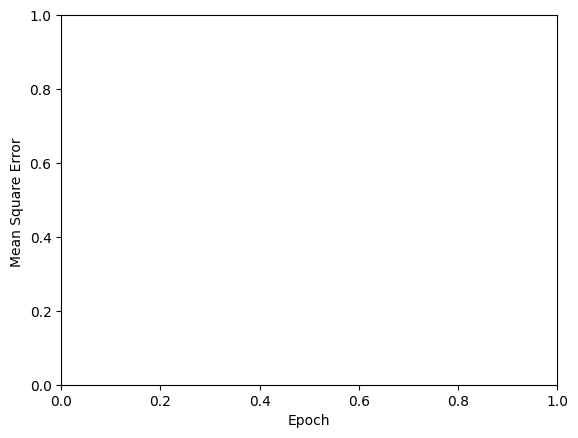

In [45]:
def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error ')
    plt.plot(hist['index'], hist['mse'], label='Train Error')
    plt.plot(hist['index'], hist['val_mse'], label = 'Val Error')
    plt.legend()
    plt.ylim([0,10000])

plot_history()

In [46]:
predictions = np.round(model.predict(X_test),1)


156/156 [==============================] - 0s 2ms/step


In [50]:
predictions_combined = predictions[0] + predictions[1]
predictions_combined
pd.write_csv(pd.concat([predictions,predictions_combined],axis=1),'First 2part')


AttributeError: ignored

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:

print("Casual MSE: ", mean_squared_error(y_test.casual, predictions[0], squared=False),
      "\nRegistered MSE", mean_squared_error(y_test.registered, predictions[1], squared=False))


Casual MSE:  77.69077004107312 
Registered MSE 119.96941085489365


In [51]:

r2 = r2_score(y_test.casual+y_test.registered,predictions_combined)
r2

0.7557929417497363

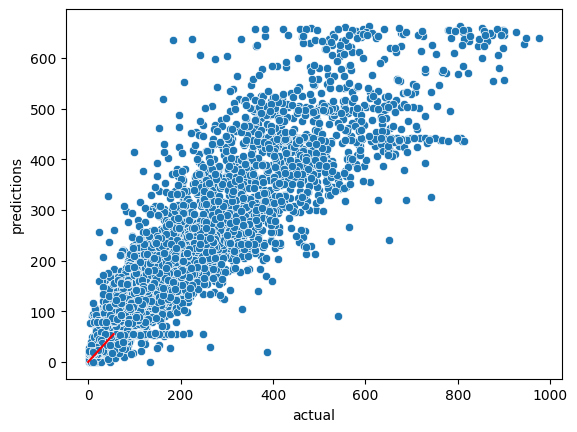

In [ ]:
pred = pd.DataFrame(predictions,columns=['predictions'])
pred
pred['actual'] = y_test.tolist()
pred

pred['difference'] = pred['actual']-pred['predictions']
pred

import seaborn as sns
xlims =(0,55)
ax = sns.scatterplot(data=pred,x='actual',y='predictions')
ax.plot(xlims,xlims, color='r')
plt.show()

In [ ]:


predictions = np.round(model.predict(holdout),1)

In [ ]:
print("Mean Squared Error: ", mean_squared_error(Y_test, predictions, squared=False), 
            "\nR^2: ", r2_score(Y_test,predictions),
            "\n95% of people are within", round((abs(Y_test-predictions)/Y_test).quantile(.95)*100,2), "% of their most recent value",
            "\n95% of home estimates are within $", round(abs(Y_test-predictions).quantile(.95),2), "of their most recent value")
